In [1]:
import tensorflow as tf
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [5]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [6]:
# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [9]:
# Forward pass
current_state = init_state
states_series = []

for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state


In [ ]:
sesh = tf.Session()
print(current_state)
print(sesh.run(current_state))

In [12]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [13]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.691033


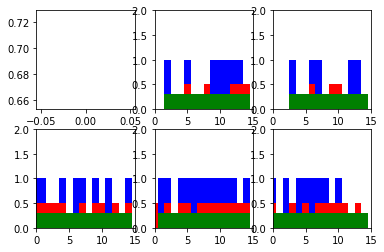

Step 100 Loss 0.694736


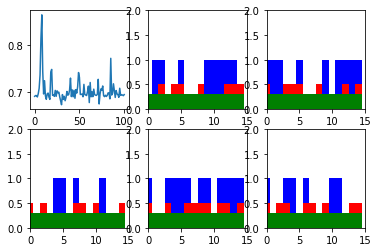

Step 200 Loss 0.695042


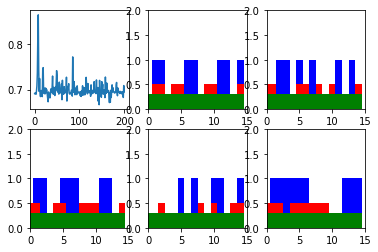

Step 300 Loss 0.682091


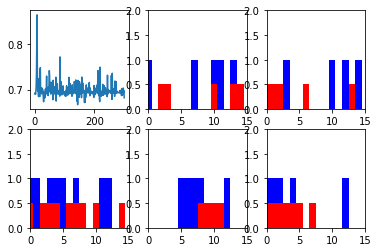

Step 400 Loss 0.694124


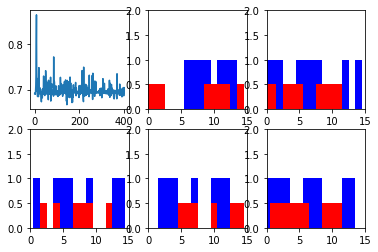

Step 500 Loss 0.694763


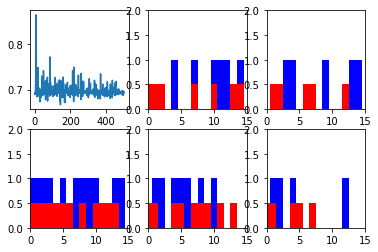

Step 600 Loss 0.691893


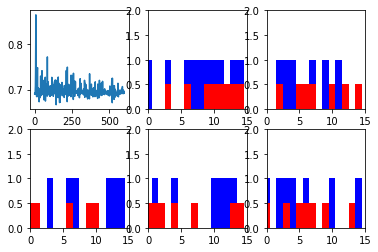

New data, epoch 1
Step 0 Loss 0.687186


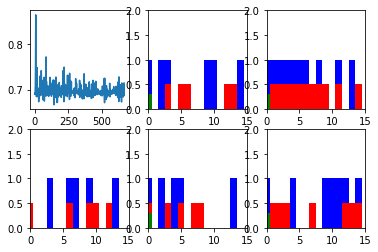

Step 100 Loss 0.690669


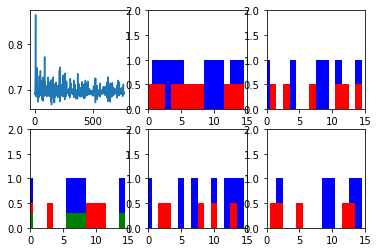

Step 200 Loss 0.696972


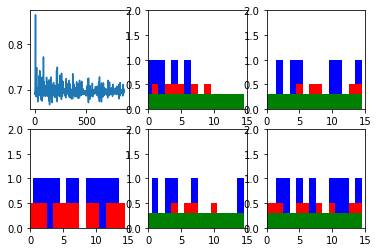

Step 300 Loss 0.710829


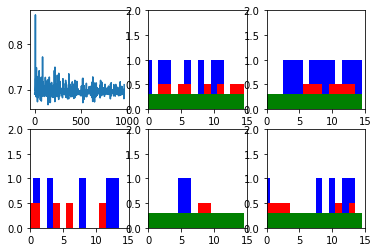

Step 400 Loss 0.685476


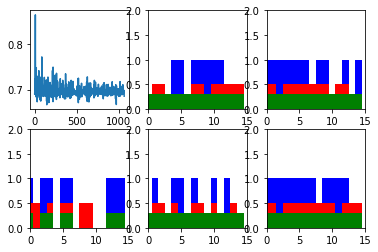

Step 500 Loss 0.703519


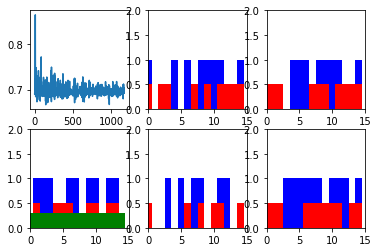

Step 600 Loss 0.692074


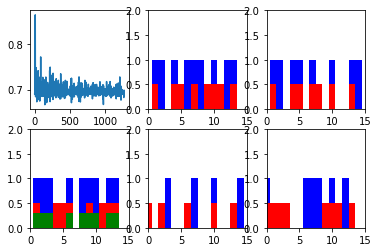

New data, epoch 2
Step 0 Loss 0.703711


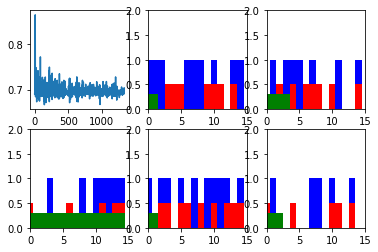

Step 100 Loss 0.691453


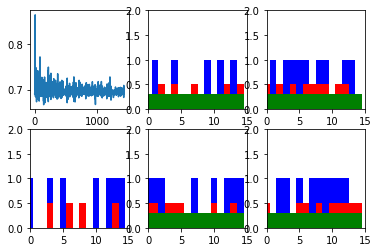

Step 200 Loss 0.692944


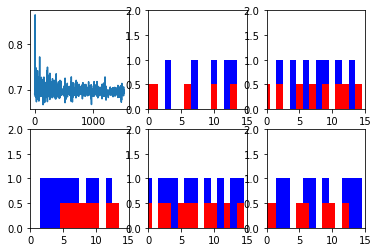

Step 300 Loss 0.692054


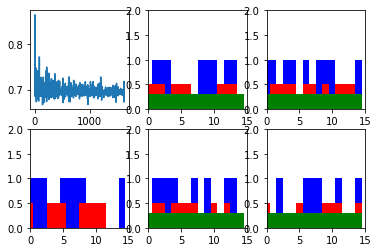

Step 400 Loss 0.695419


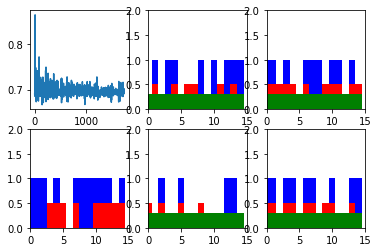

Step 500 Loss 0.690097


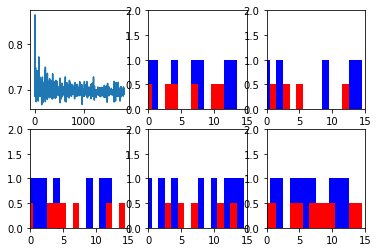

Step 600 Loss 0.698041


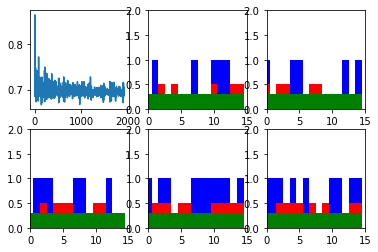

New data, epoch 3
Step 0 Loss 0.695061


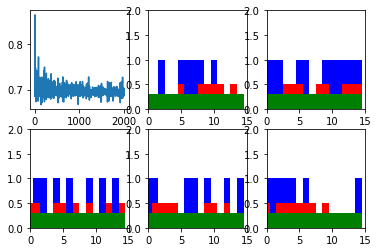

Step 100 Loss 0.683364


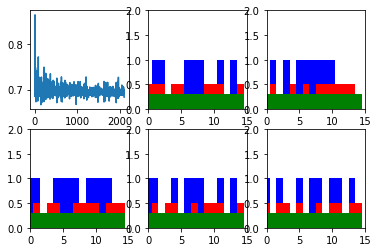

Step 200 Loss 0.69292


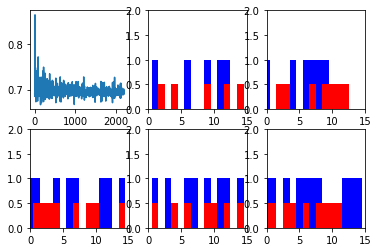

Step 300 Loss 0.695322


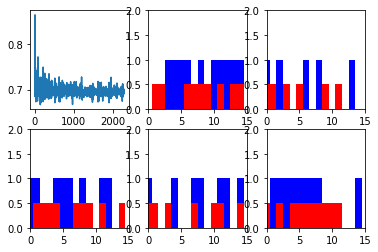

Step 400 Loss 0.696637


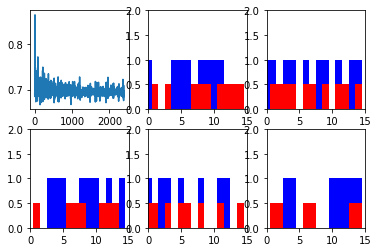

Step 500 Loss 0.692739


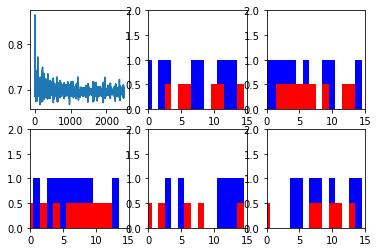

Step 600 Loss 0.693113


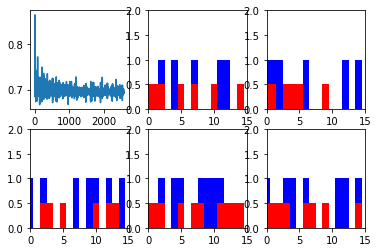

New data, epoch 4
Step 0 Loss 0.694867


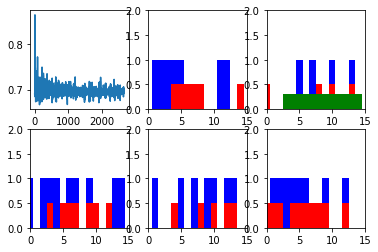

Step 100 Loss 0.693191


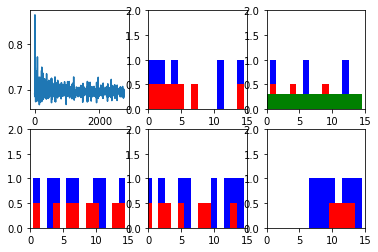

Step 200 Loss 0.690766


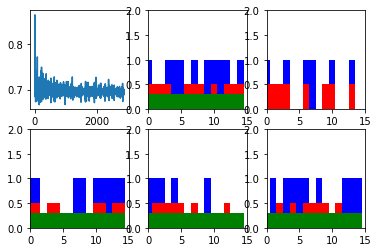

Step 300 Loss 0.691402


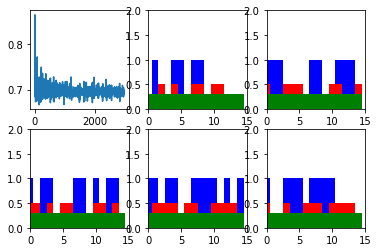

Step 400 Loss 0.687766


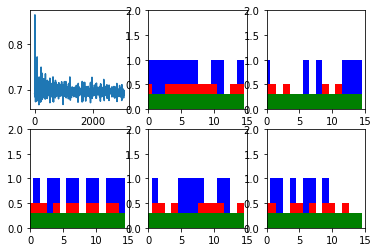

Step 500 Loss 0.697371


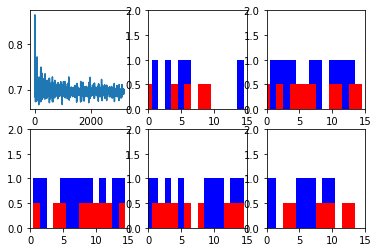

Step 600 Loss 0.694108


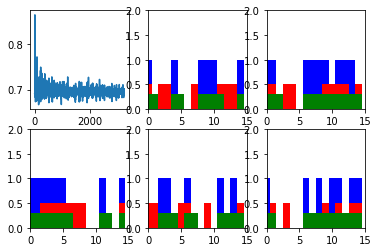

New data, epoch 5
Step 0 Loss 0.697526


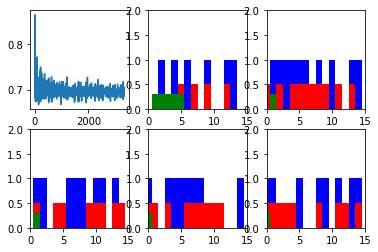

Step 100 Loss 0.700364


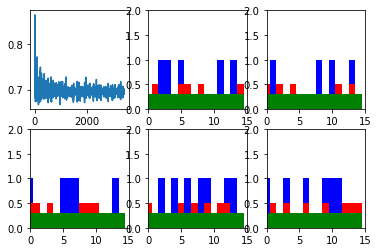

Step 200 Loss 0.691988


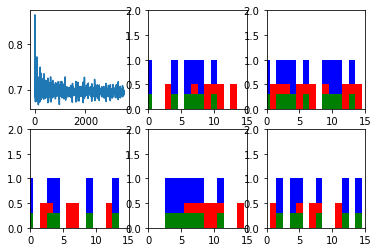

Step 300 Loss 0.651293


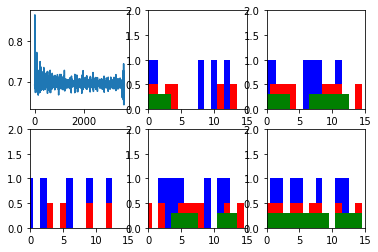

Step 400 Loss 0.301882


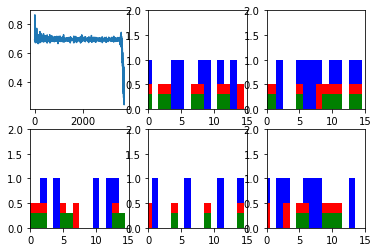

Step 500 Loss 0.0608849


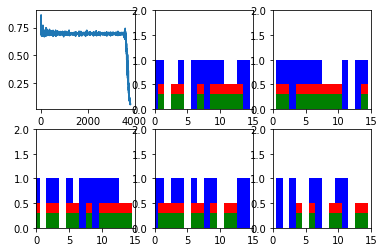

Step 600 Loss 0.0315514


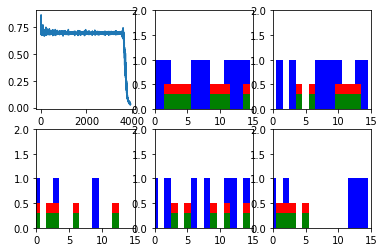

New data, epoch 6
Step 0 Loss 0.138513


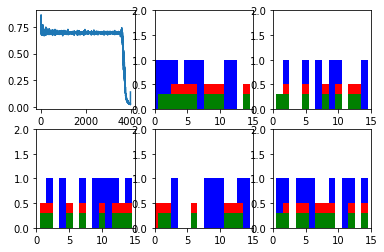

Step 100 Loss 0.0212845


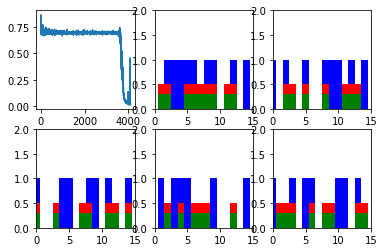

Step 200 Loss 0.0136051


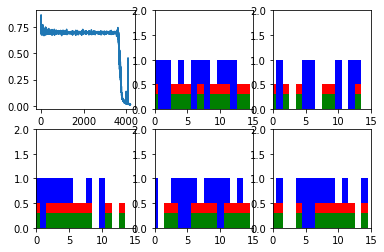

Step 300 Loss 0.0111494


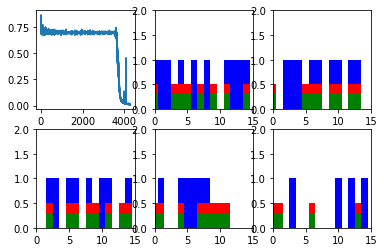

Step 400 Loss 0.0082946


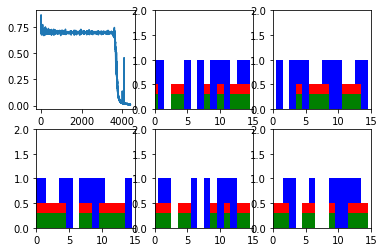

Step 500 Loss 0.0092334


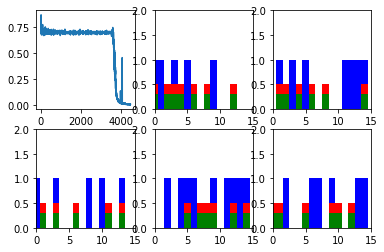

Step 600 Loss 0.00696916


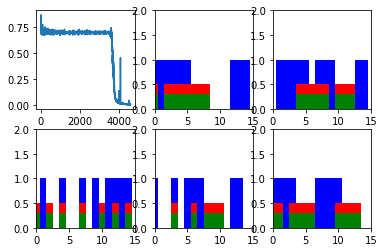

New data, epoch 7
Step 0 Loss 0.154536


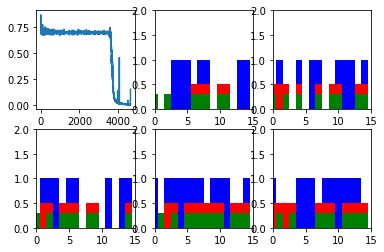

Step 100 Loss 0.00578551


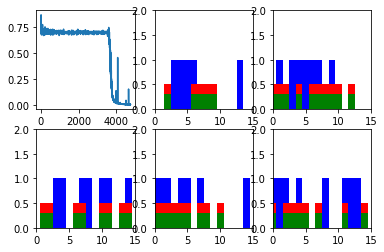

Step 200 Loss 0.0047057


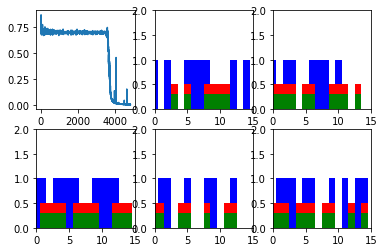

Step 300 Loss 0.00430789


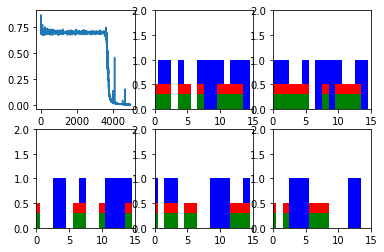

Step 400 Loss 0.00448467


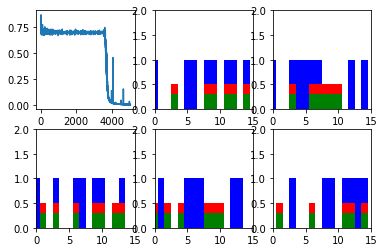

Step 500 Loss 0.00421644


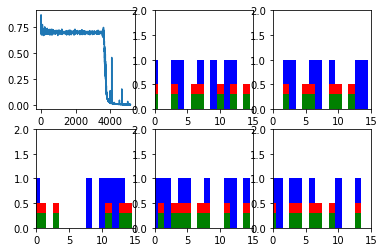

Step 600 Loss 0.00362649


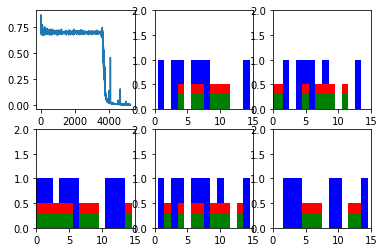

New data, epoch 8
Step 0 Loss 0.185095


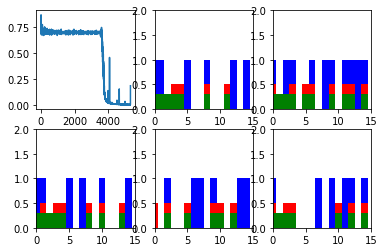

Step 100 Loss 0.00692648


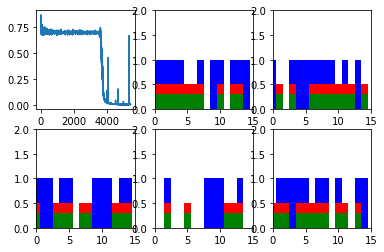

Step 200 Loss 0.00560315


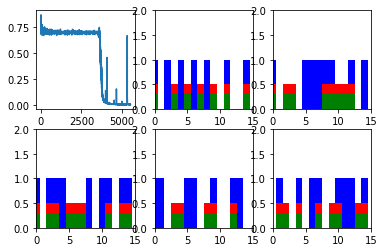

Step 300 Loss 0.0036992


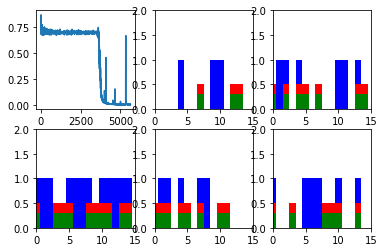

Step 400 Loss 0.00529421


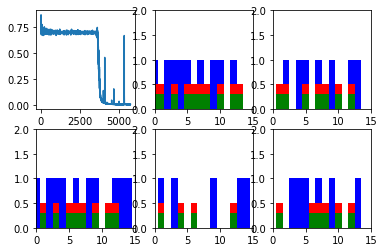

Step 500 Loss 0.00505803


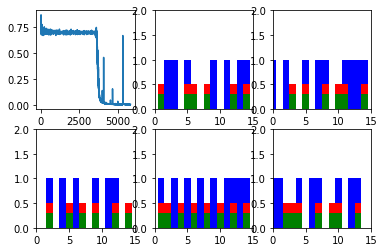

Step 600 Loss 0.00344192


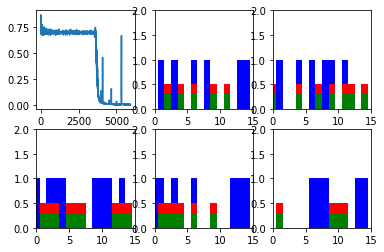

New data, epoch 9
Step 0 Loss 0.0801459


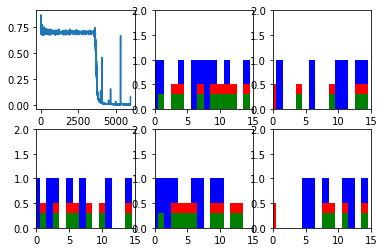

Step 100 Loss 0.0033072


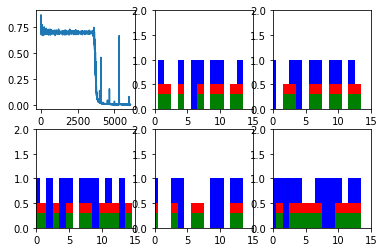

Step 200 Loss 0.00247961


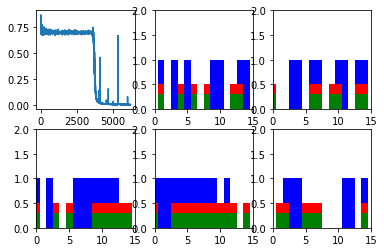

Step 300 Loss 0.00261376


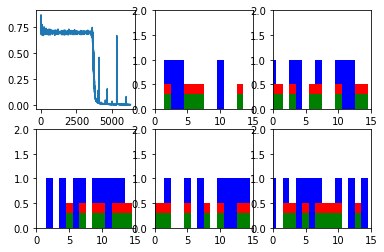

Step 400 Loss 0.0021097


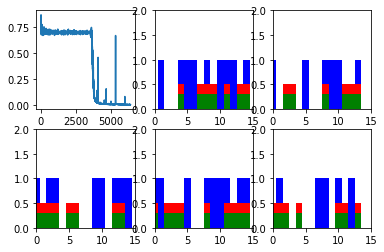

Step 500 Loss 0.00220978


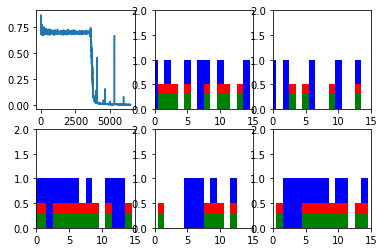

Step 600 Loss 0.00249703


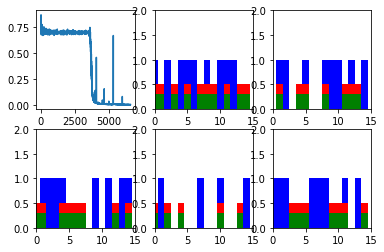

New data, epoch 10
Step 0 Loss 0.187076


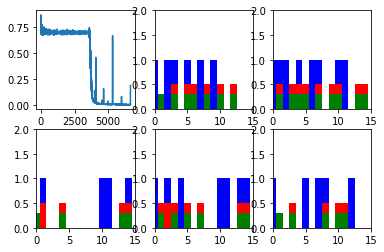

Step 100 Loss 0.00155005


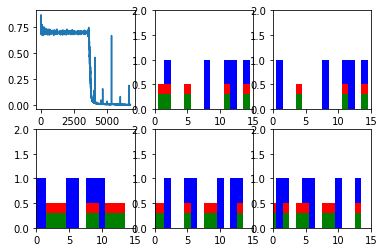

Step 200 Loss 0.00204516


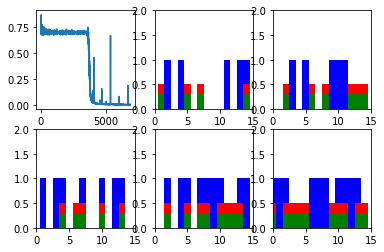

Step 300 Loss 0.00181715


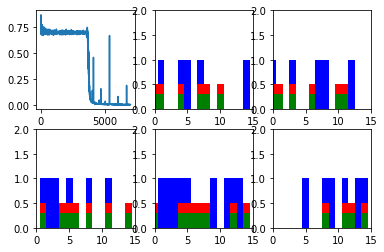

Step 400 Loss 0.00216225


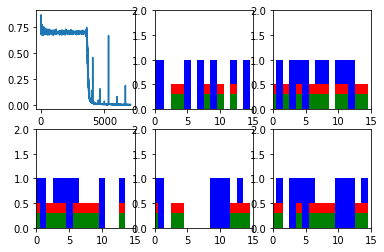

Step 500 Loss 0.00185617


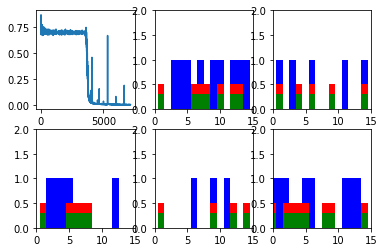

Step 600 Loss 0.00152884


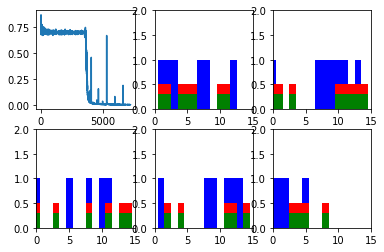

New data, epoch 11
Step 0 Loss 0.191134


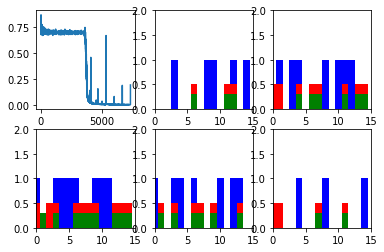

Step 100 Loss 0.0022391


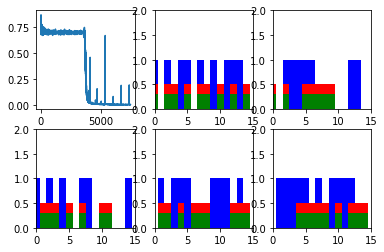

Step 200 Loss 0.00153105


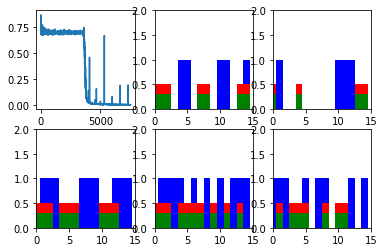

Step 300 Loss 0.00183743


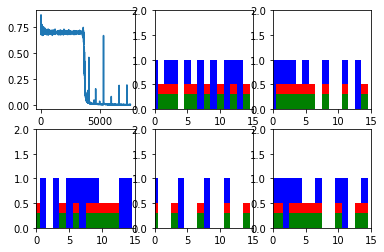

Step 400 Loss 0.00145484


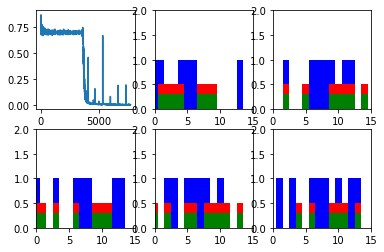

Step 500 Loss 0.00166866


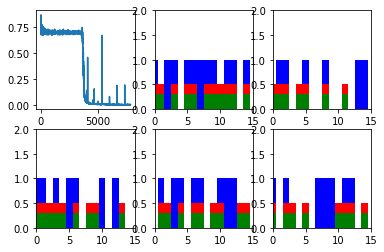

Step 600 Loss 0.00176673


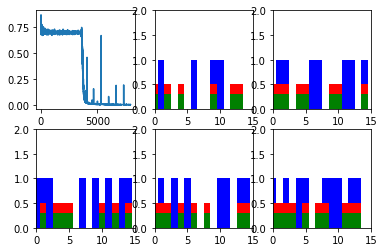

New data, epoch 12
Step 0 Loss 0.220752


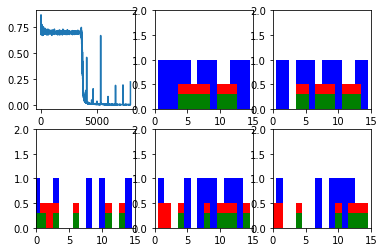

Step 100 Loss 0.00157805


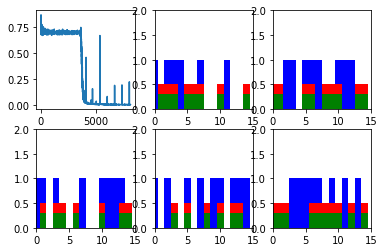

Step 200 Loss 0.00127052


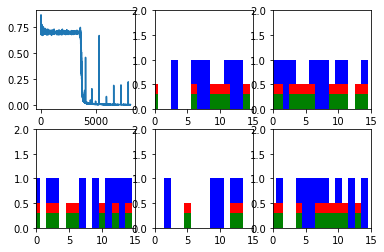

Step 300 Loss 0.00116368


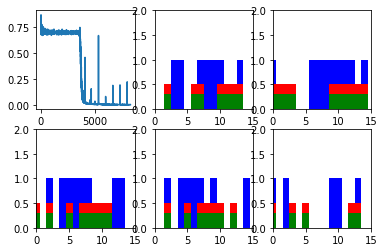

Step 400 Loss 0.00127106


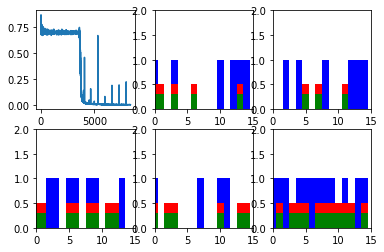

Step 500 Loss 0.00120271


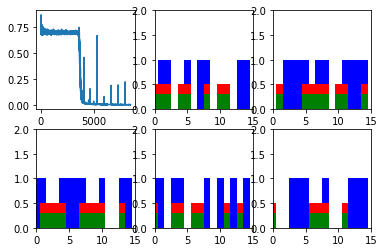

Step 600 Loss 0.00162562


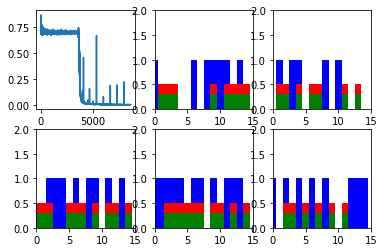

New data, epoch 13
Step 0 Loss 0.179647


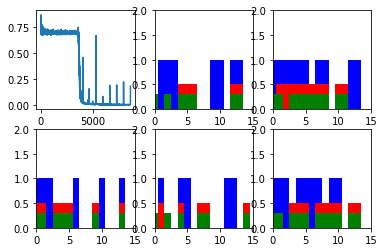

Step 100 Loss 0.00108311


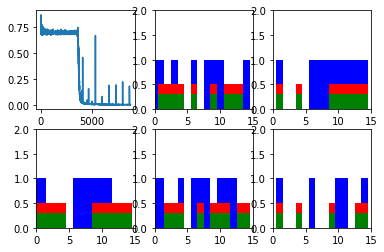

Step 200 Loss 0.0012093


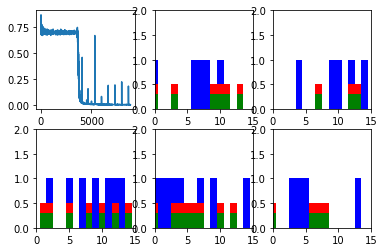

Step 300 Loss 0.00105716


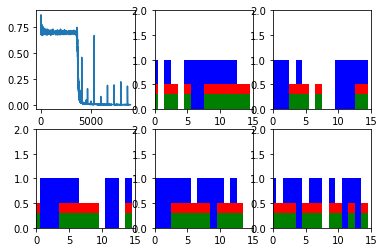

Step 400 Loss 0.00110305


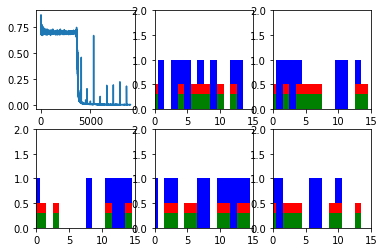

Step 500 Loss 0.000988995


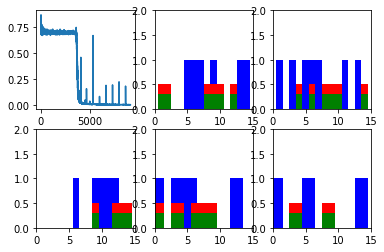

Step 600 Loss 0.00104348


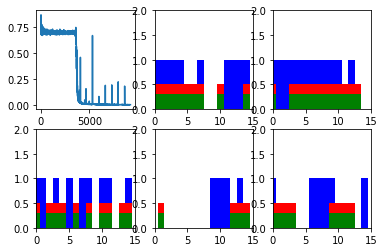

New data, epoch 14
Step 0 Loss 0.294943


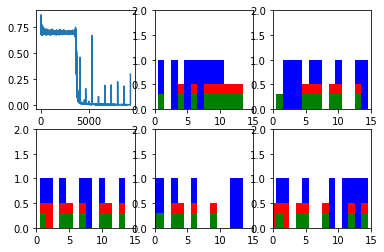

Step 100 Loss 0.00100417


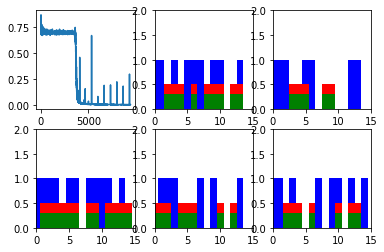

Step 200 Loss 0.00133613


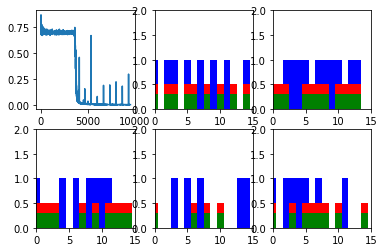

Step 300 Loss 0.000998878


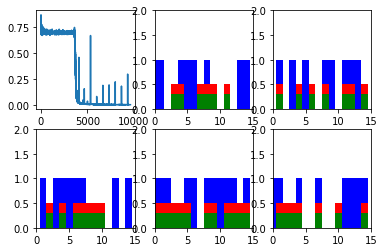

Step 400 Loss 0.00110434


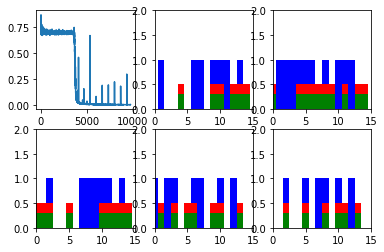

Step 500 Loss 0.0011246


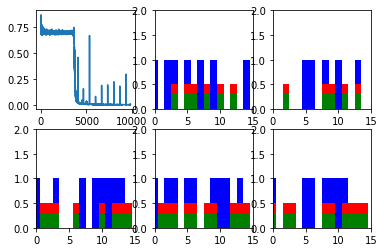

Step 600 Loss 0.0011862


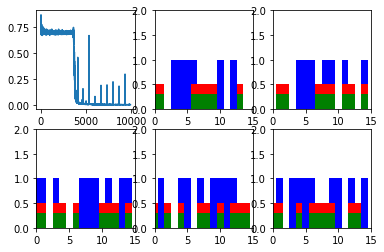

New data, epoch 15
Step 0 Loss 0.281512


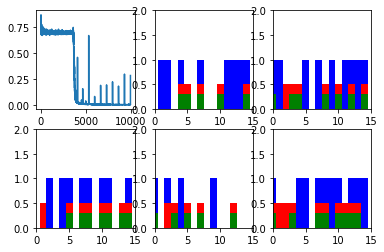

Step 100 Loss 0.00119735


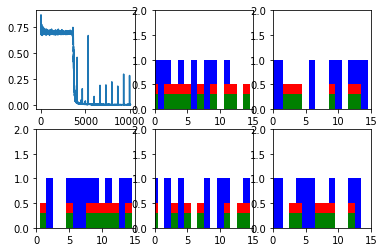

Step 200 Loss 0.00104843


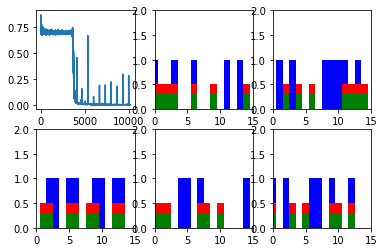

Step 300 Loss 0.000920346


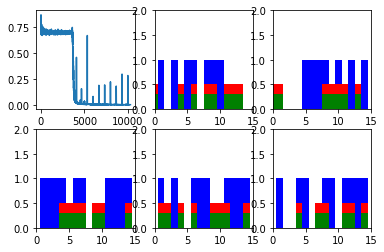

Step 400 Loss 0.00100884


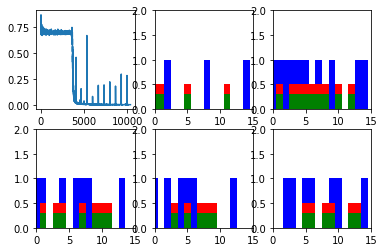

Step 500 Loss 0.0010665


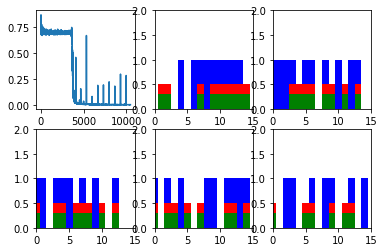

Step 600 Loss 0.00113409


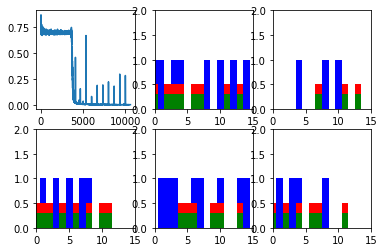

New data, epoch 16
Step 0 Loss 0.300122


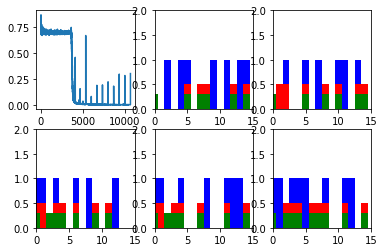

Step 100 Loss 0.00101539


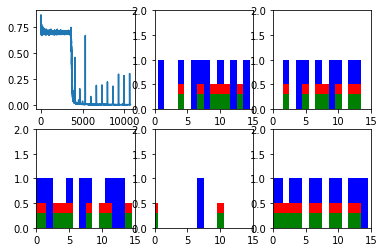

Step 200 Loss 0.000910337


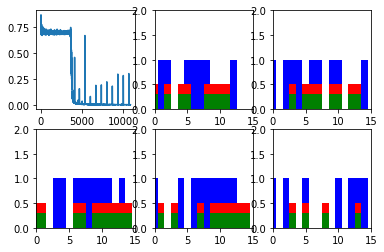

Step 300 Loss 0.000871418


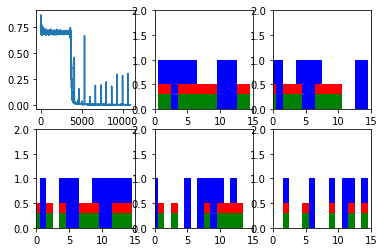

Step 400 Loss 0.000710597


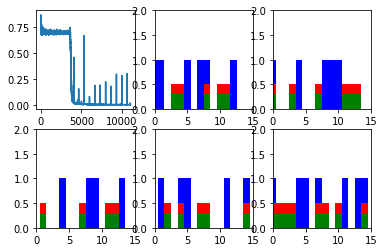

Step 500 Loss 0.000797841


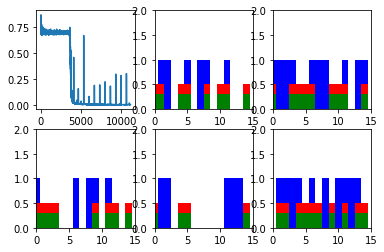

Step 600 Loss 0.000875472


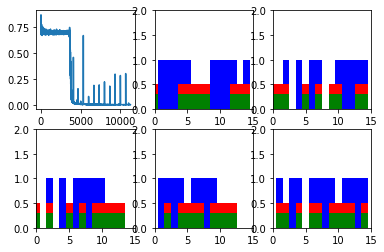

New data, epoch 17
Step 0 Loss 0.165771


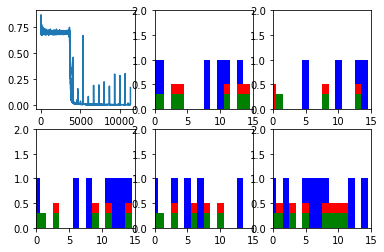

Step 100 Loss 0.000842975


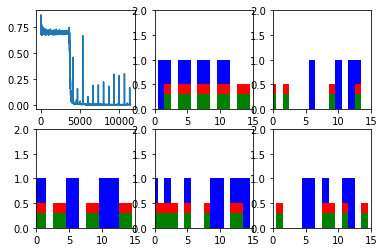

Step 200 Loss 0.00071363


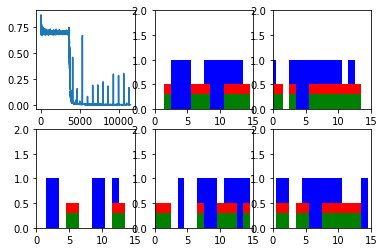

Step 300 Loss 0.000858826


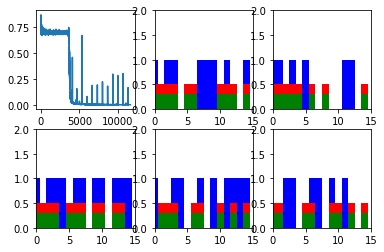

Step 400 Loss 0.000802702


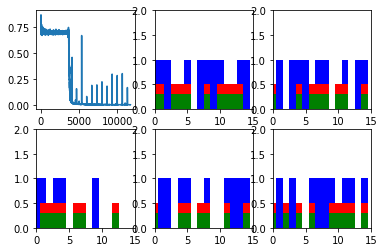

Step 500 Loss 0.00078829


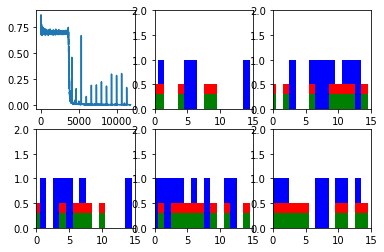

Step 600 Loss 0.000825741


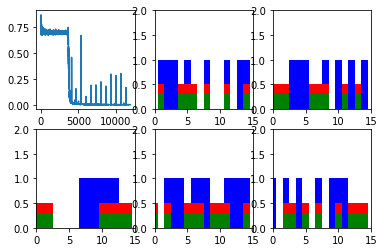

New data, epoch 18
Step 0 Loss 0.26119


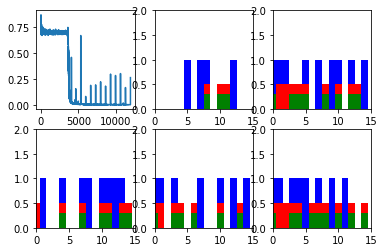

Step 100 Loss 0.00101638


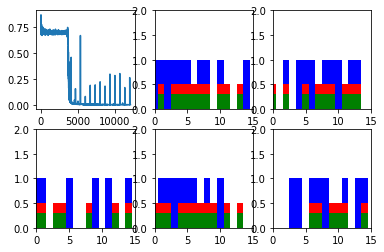

Step 200 Loss 0.0011393


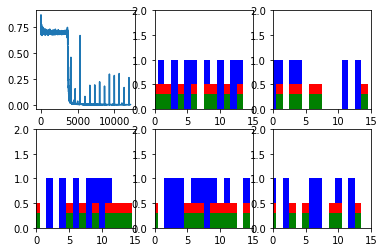

Step 300 Loss 0.000812691


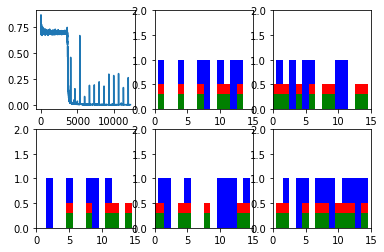

Step 400 Loss 0.000853619


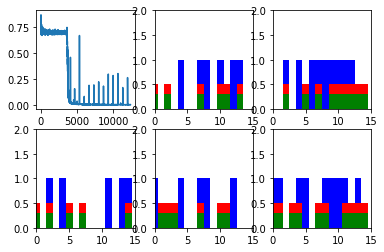

Step 500 Loss 0.000835835


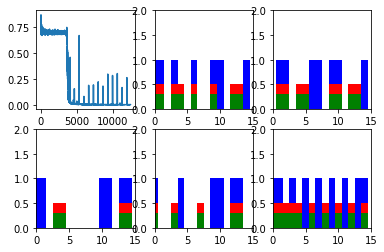

Step 600 Loss 0.000669425


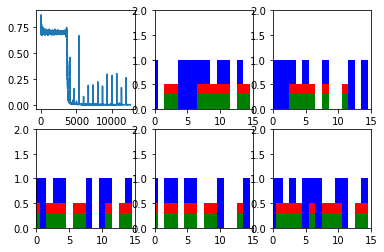

New data, epoch 19
Step 0 Loss 0.172511


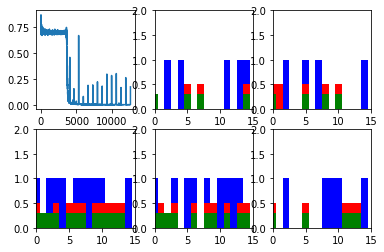

Step 100 Loss 0.000894007


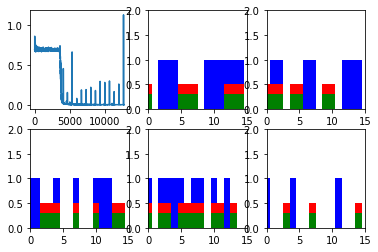

Step 200 Loss 0.00139065


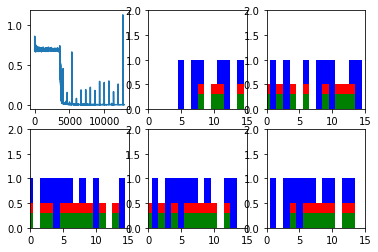

Step 300 Loss 0.000888659


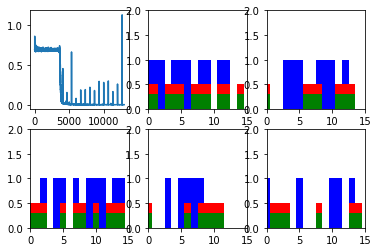

Step 400 Loss 0.00109587


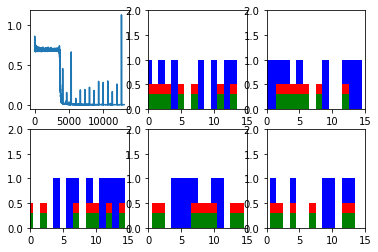

Step 500 Loss 0.000798225


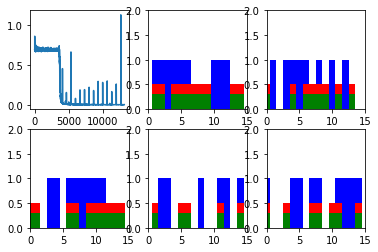

Step 600 Loss 0.00076249


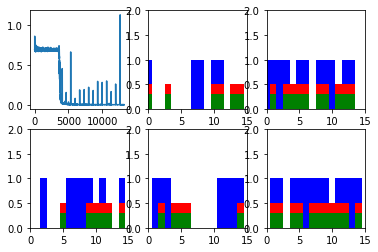

New data, epoch 20
Step 0 Loss 0.500628


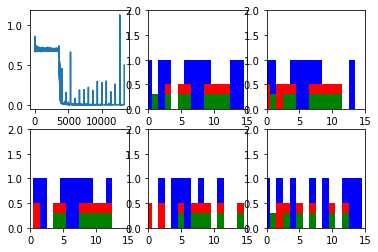

Step 100 Loss 0.000969334


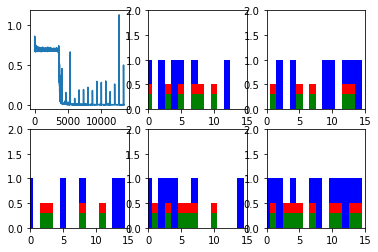

Step 200 Loss 0.0010257


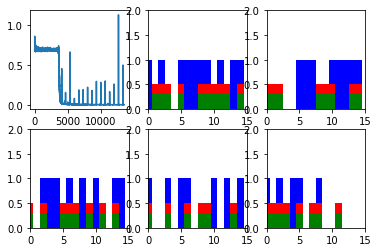

Step 300 Loss 0.000635023


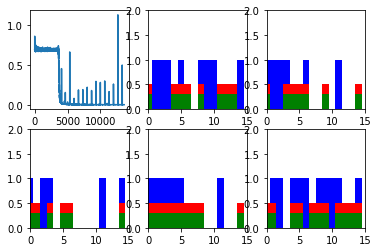

Step 400 Loss 0.000773262


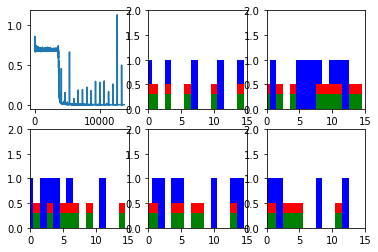

Step 500 Loss 0.00097428


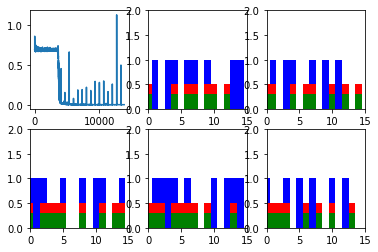

Step 600 Loss 0.000851673


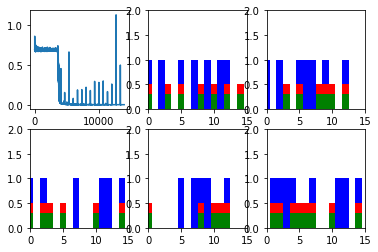

New data, epoch 21
Step 0 Loss 0.312439


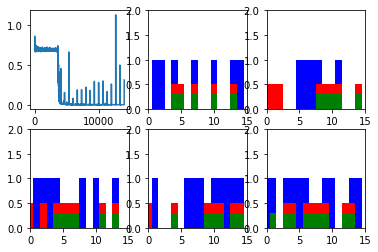

Step 100 Loss 0.000739387


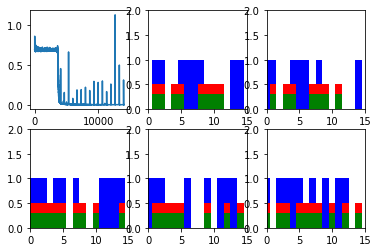

Step 200 Loss 0.000651599


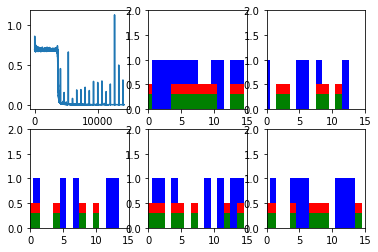

Step 300 Loss 0.00105344


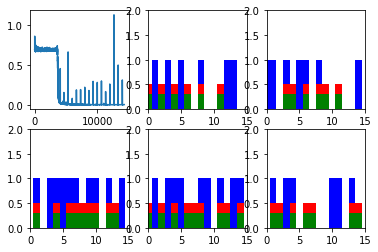

Step 400 Loss 0.00100769


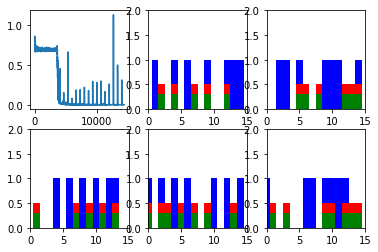

Step 500 Loss 0.0005011


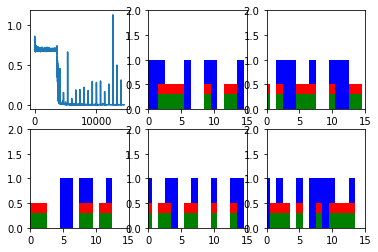

Step 600 Loss 0.000674965


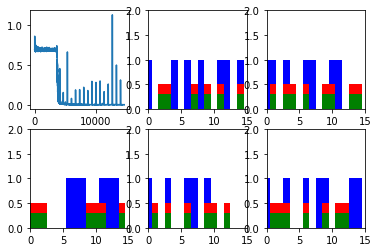

New data, epoch 22
Step 0 Loss 0.321924


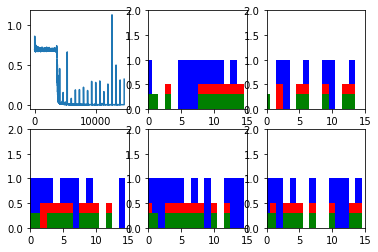

Step 100 Loss 0.000593277


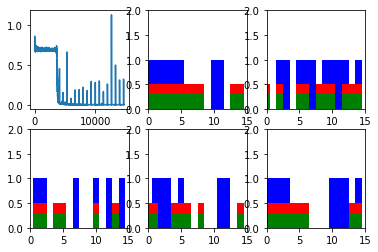

Step 200 Loss 0.000490662


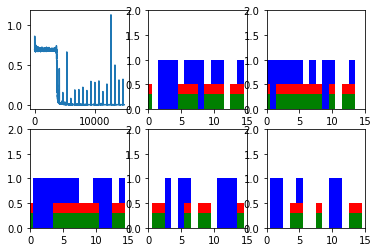

Step 300 Loss 0.000619544


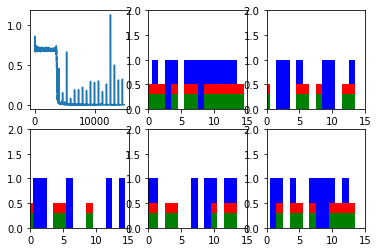

Step 400 Loss 0.000534489


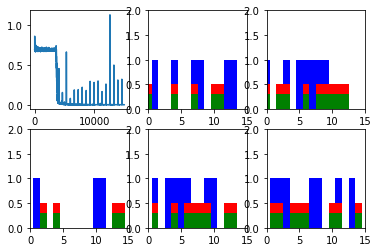

Step 500 Loss 0.000861197


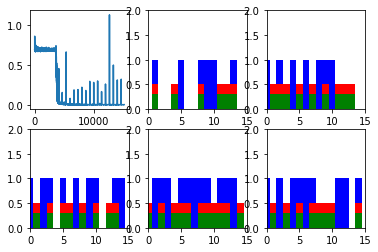

Step 600 Loss 0.000575742


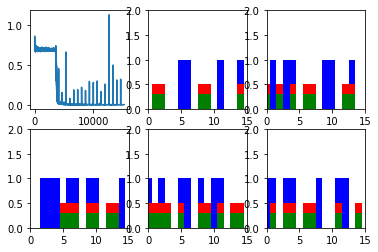

New data, epoch 23
Step 0 Loss 0.158411


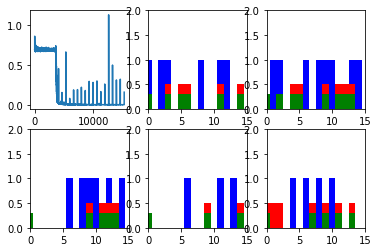

Step 100 Loss 0.000524776


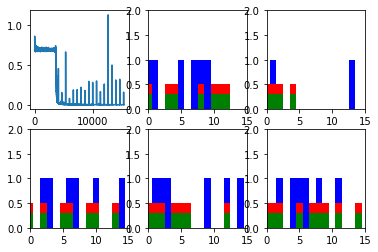

Step 200 Loss 0.000589698


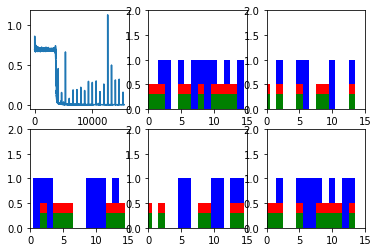

Step 300 Loss 0.000624726


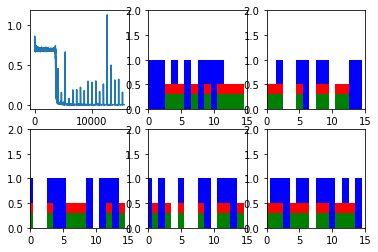

Step 400 Loss 0.00051415


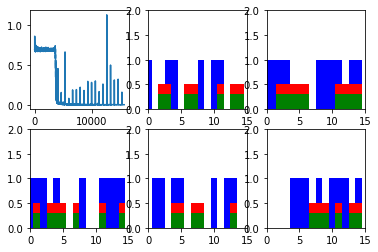

Step 500 Loss 0.000609332


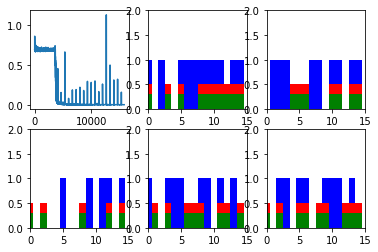

Step 600 Loss 0.000548699


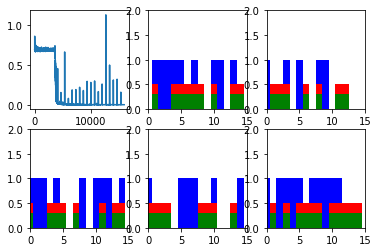

New data, epoch 24
Step 0 Loss 0.226656


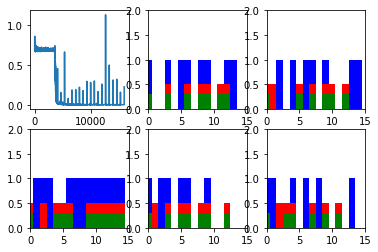

Step 100 Loss 0.000422426


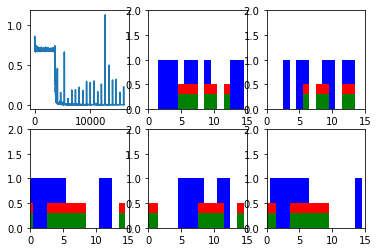

Step 200 Loss 0.000560533


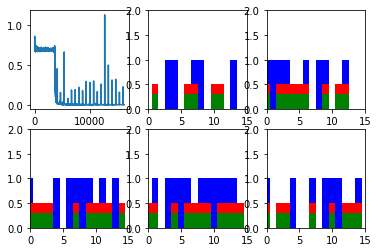

Step 300 Loss 0.00061169


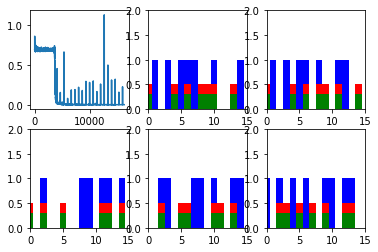

Step 400 Loss 0.000502521


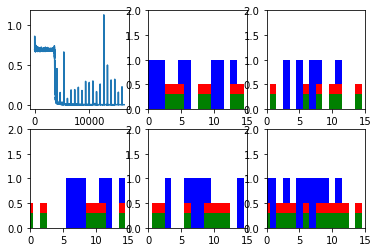

Step 500 Loss 0.000594917


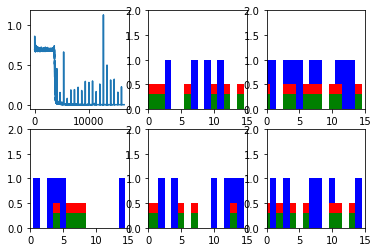

Step 600 Loss 0.000596646


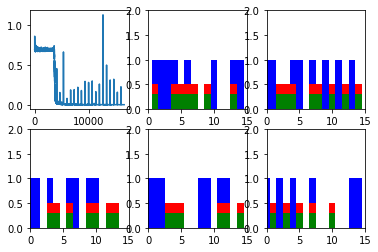

New data, epoch 25
Step 0 Loss 0.248477


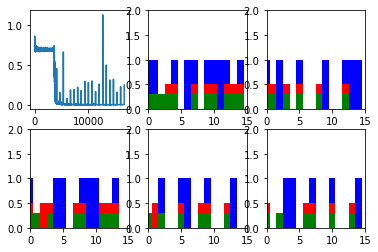

Step 100 Loss 0.000505217


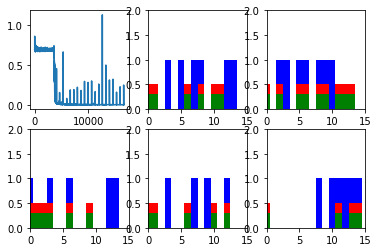

Step 200 Loss 0.000498574


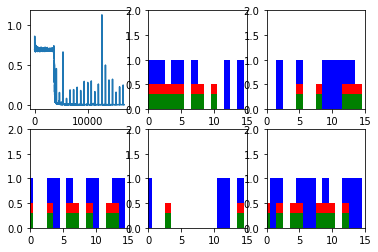

Step 300 Loss 0.000449559


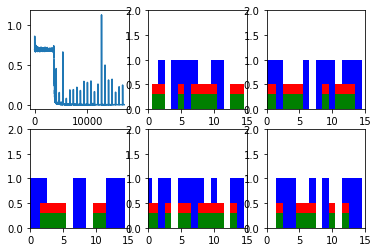

Step 400 Loss 0.000503472


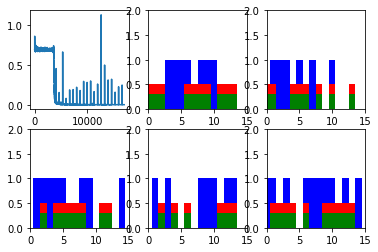

Step 500 Loss 0.00045855


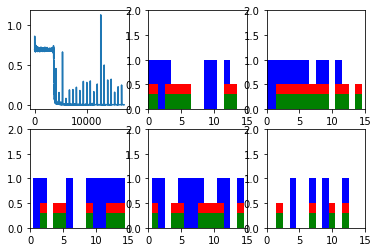

Step 600 Loss 0.000489384


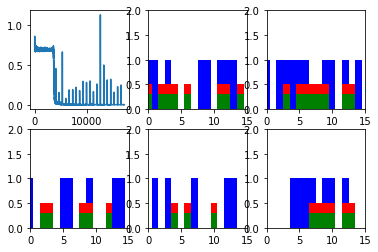

New data, epoch 26
Step 0 Loss 0.258909


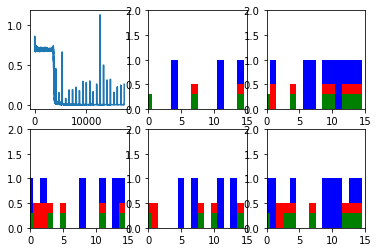

Step 100 Loss 0.000531502


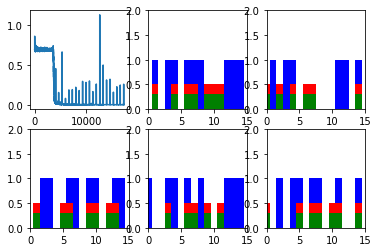

Step 200 Loss 0.000486087


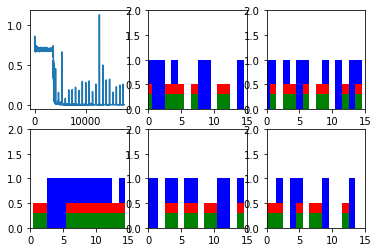

Step 300 Loss 0.000454599


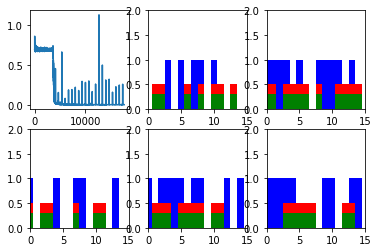

Step 400 Loss 0.000469852


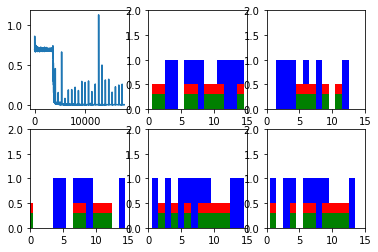

Step 500 Loss 0.000434878


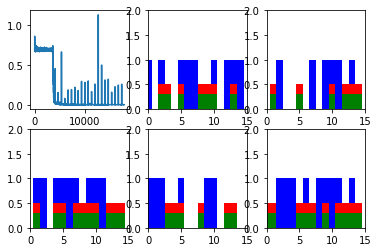

Step 600 Loss 0.000426399


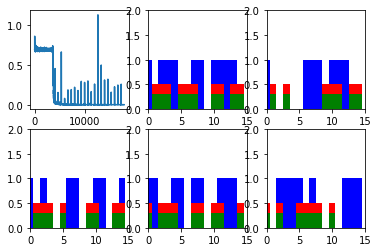

New data, epoch 27
Step 0 Loss 0.101676


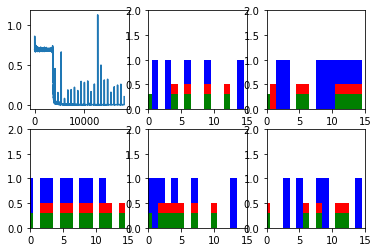

Step 100 Loss 0.000424485


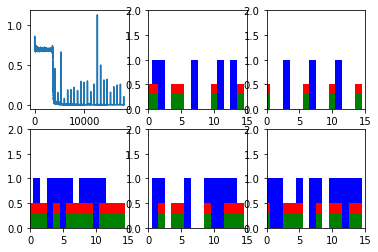

Step 200 Loss 0.00042479


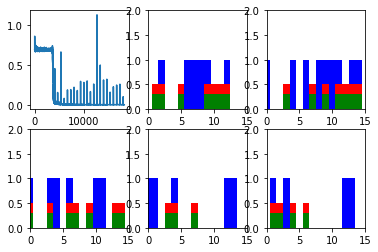

Step 300 Loss 0.000529303


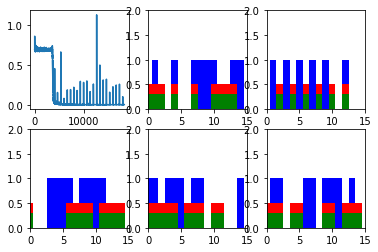

Step 400 Loss 0.000717035


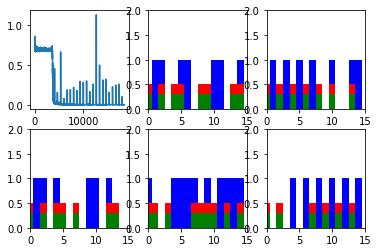

Step 500 Loss 0.000350774


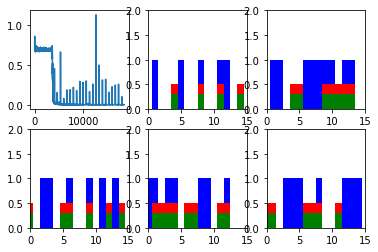

Step 600 Loss 0.000333373


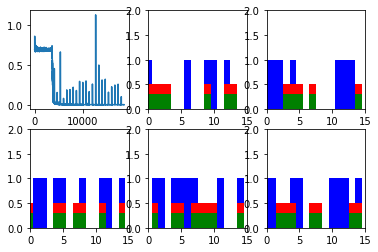

New data, epoch 28
Step 0 Loss 0.11041


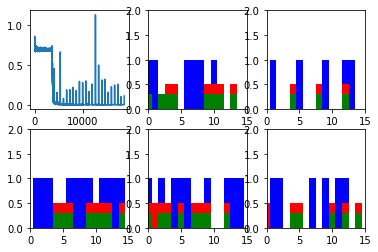

Step 100 Loss 0.000378766


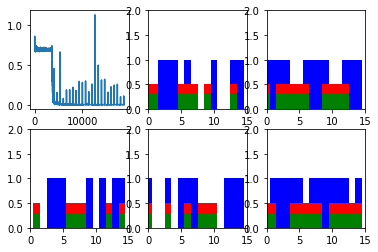

Step 200 Loss 0.000417124


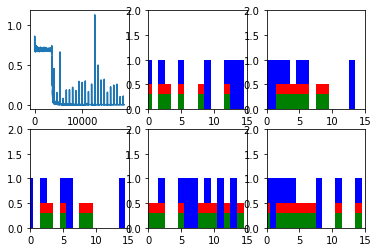

Step 300 Loss 0.000435363


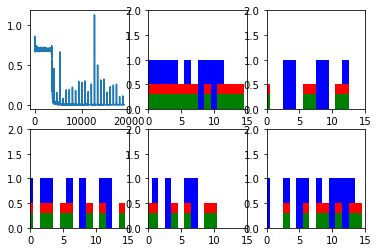

Step 400 Loss 0.000406011


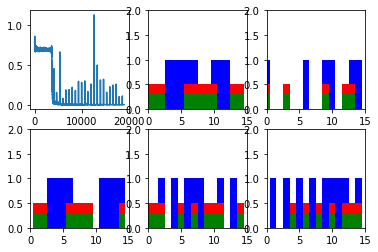

Step 500 Loss 0.000426005


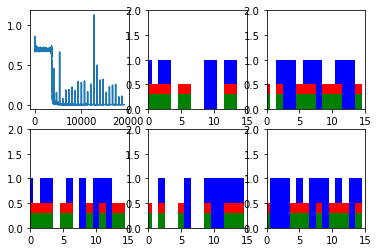

Step 600 Loss 0.000420316


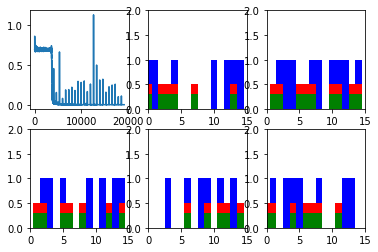

New data, epoch 29
Step 0 Loss 0.305482


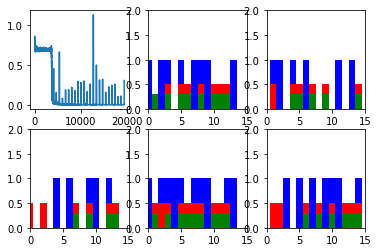

Step 100 Loss 0.000540587


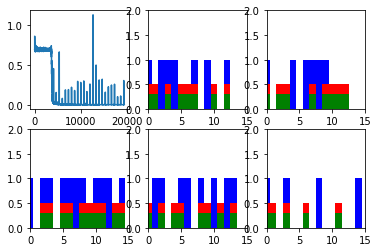

Step 200 Loss 0.000425598


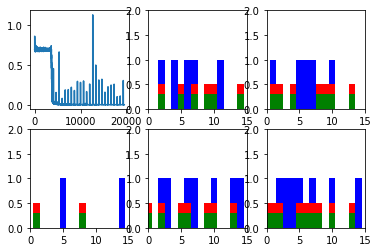

Step 300 Loss 0.000515242


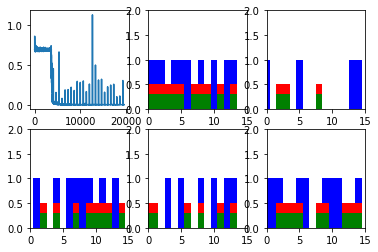

Step 400 Loss 0.000444127


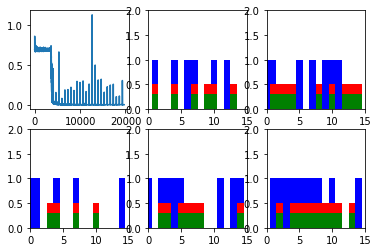

Step 500 Loss 0.000441231


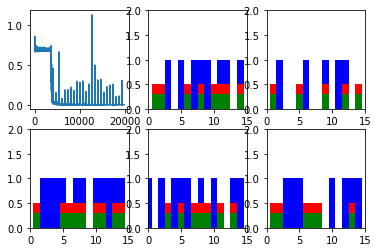

Step 600 Loss 0.000473945


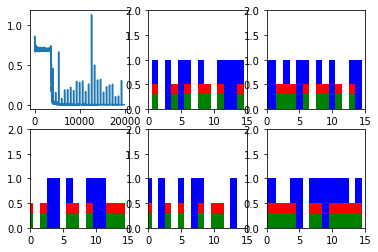

New data, epoch 30
Step 0 Loss 0.289372


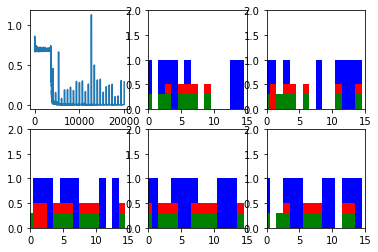

Step 100 Loss 0.000405281


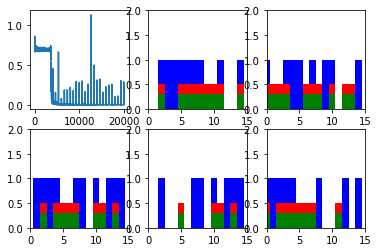

Step 200 Loss 0.000419738


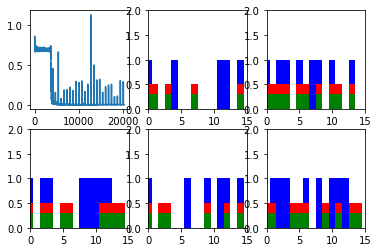

Step 300 Loss 0.000379721


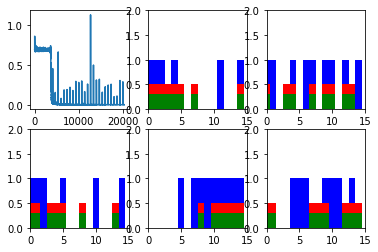

Step 400 Loss 0.000405603


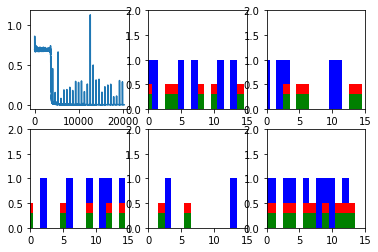

Step 500 Loss 0.000435154


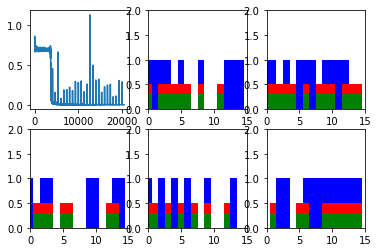

Step 600 Loss 0.000349392


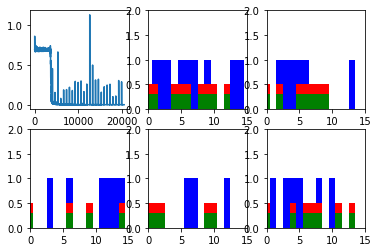

New data, epoch 31
Step 0 Loss 0.57786


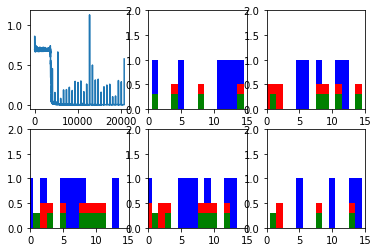

Step 100 Loss 0.000333833


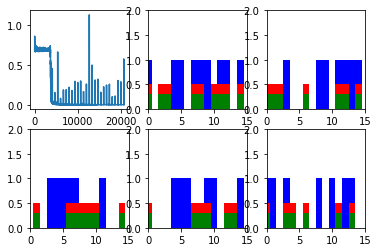

Step 200 Loss 0.000359804


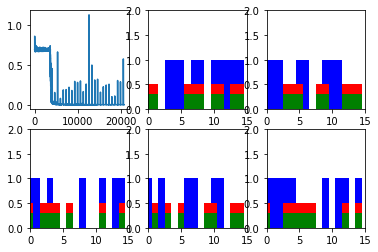

Step 300 Loss 0.000355924


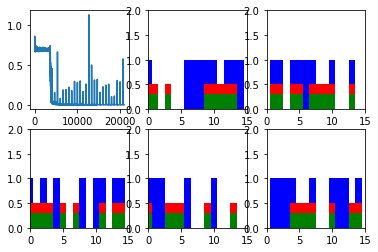

Step 400 Loss 0.000467956


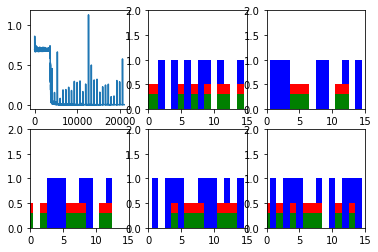

Step 500 Loss 0.00040466


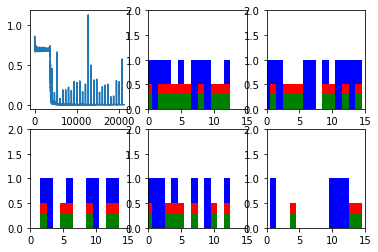

Step 600 Loss 0.000379324


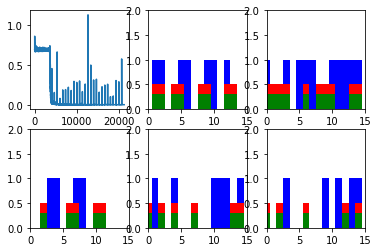

New data, epoch 32
Step 0 Loss 0.194911


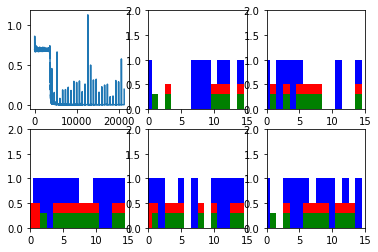

Step 100 Loss 0.000403253


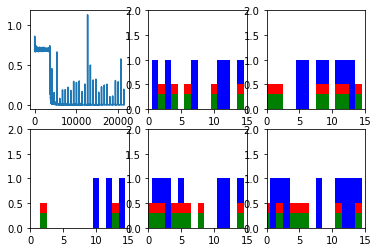

Step 200 Loss 0.000390169


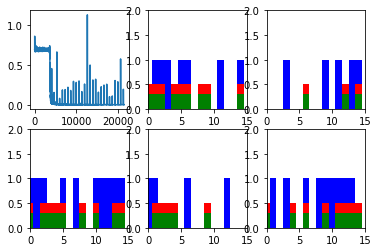

Step 300 Loss 0.000375056


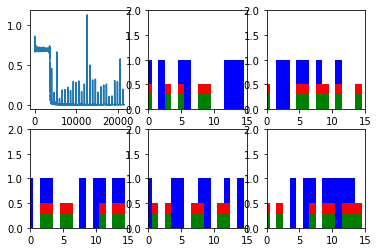

Step 400 Loss 0.000432579


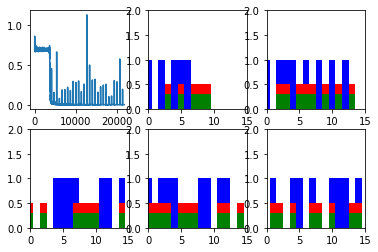

Step 500 Loss 0.000415821


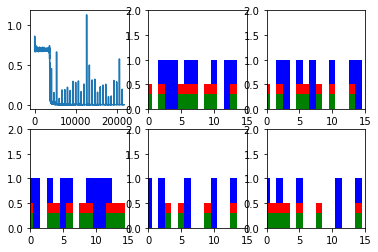

Step 600 Loss 0.000385363


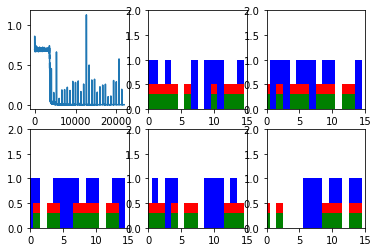

New data, epoch 33
Step 0 Loss 0.173302


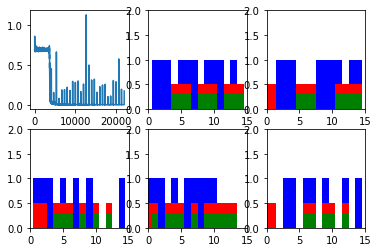

Step 100 Loss 0.000396845


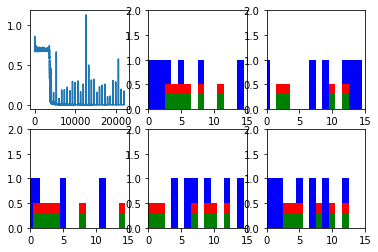

Step 200 Loss 0.000343417


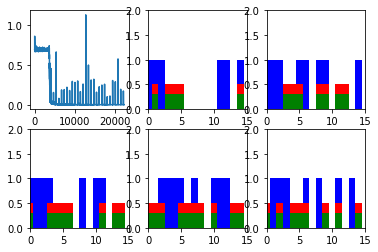

Step 300 Loss 0.000367564


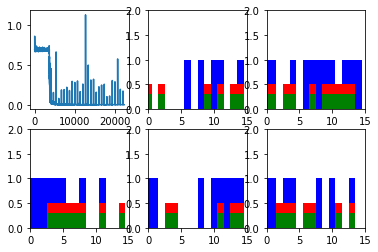

Step 400 Loss 0.000322953


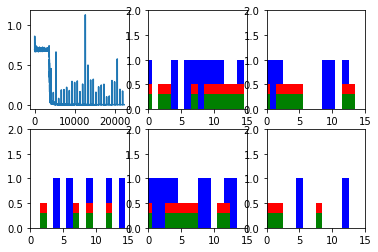

Step 500 Loss 0.000356036


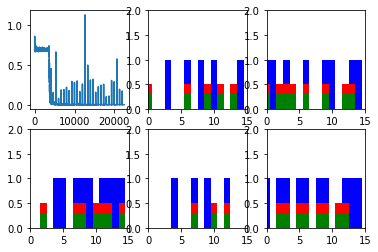

Step 600 Loss 0.000374242


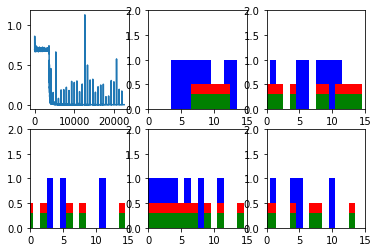

New data, epoch 34
Step 0 Loss 0.342561


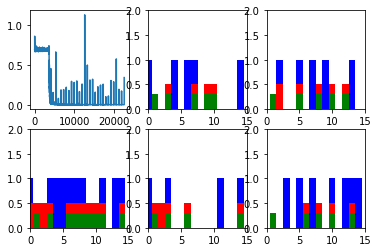

Step 100 Loss 0.000397537


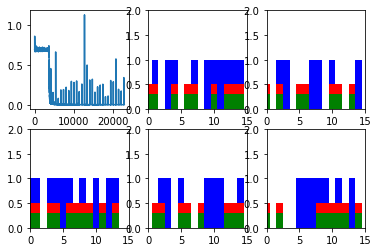

Step 200 Loss 0.00032394


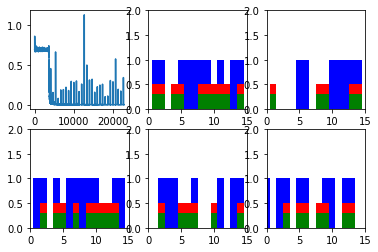

Step 300 Loss 0.000381013


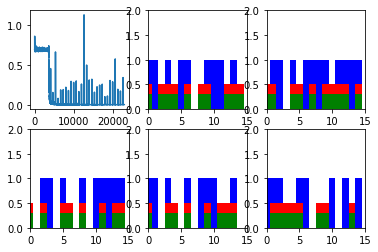

Step 400 Loss 0.000300468


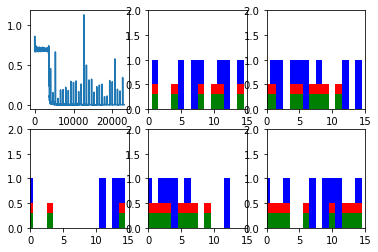

Step 500 Loss 0.000377878


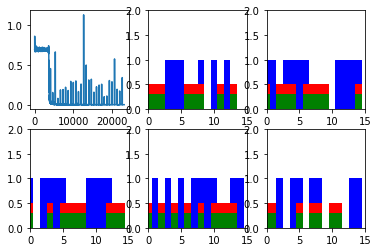

Step 600 Loss 0.000385404


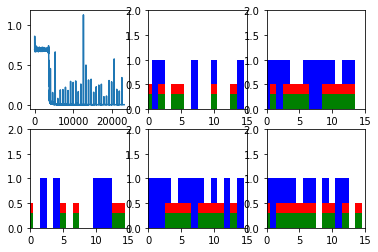

New data, epoch 35
Step 0 Loss 0.236351


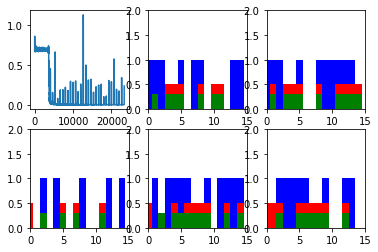

Step 100 Loss 0.000394574


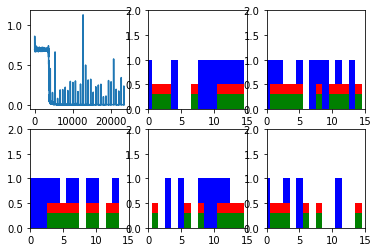

Step 200 Loss 0.000372784


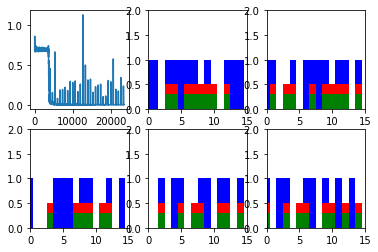

Step 300 Loss 0.000362135


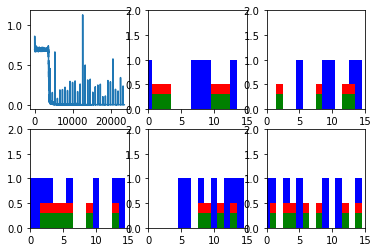

Step 400 Loss 0.000393266


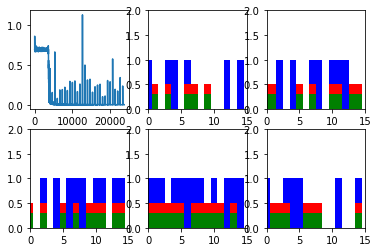

Step 500 Loss 0.000378052


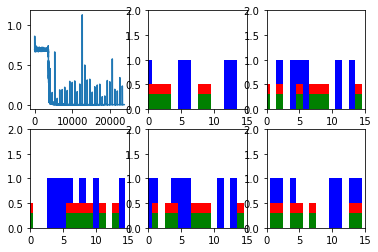

Step 600 Loss 0.000313333


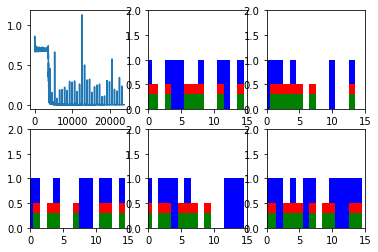

New data, epoch 36
Step 0 Loss 0.19837


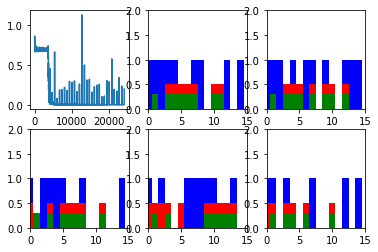

Step 100 Loss 0.000522331


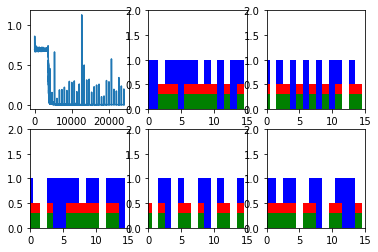

Step 200 Loss 0.000387477


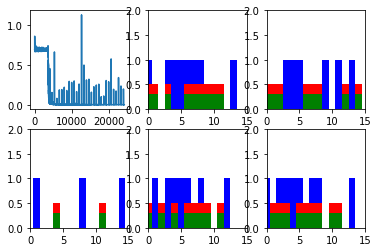

Step 300 Loss 0.000385028


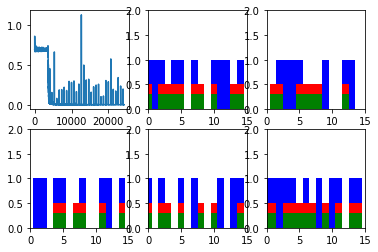

Step 400 Loss 0.000383523


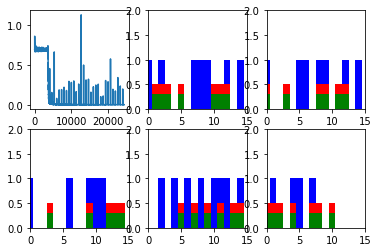

Step 500 Loss 0.000490433


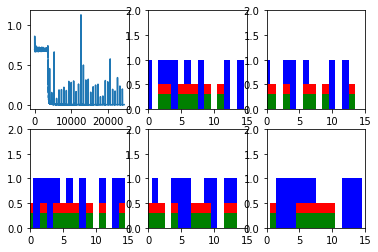

Step 600 Loss 0.00029823


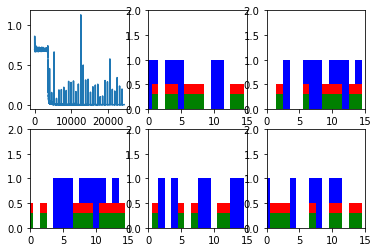

New data, epoch 37
Step 0 Loss 0.114236


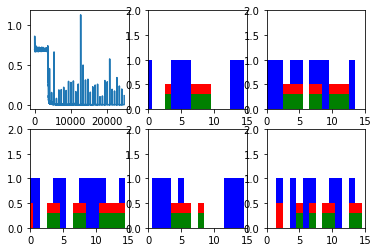

Step 100 Loss 0.000371017


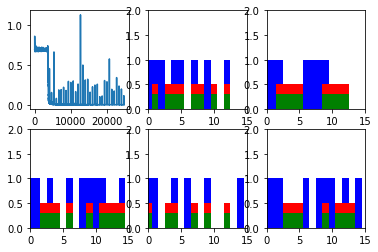

Step 200 Loss 0.000346555


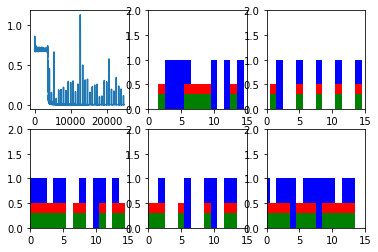

Step 300 Loss 0.000338962


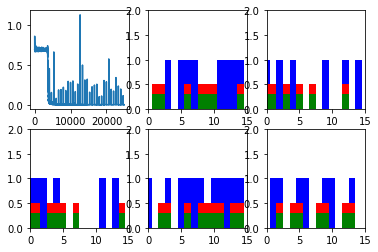

Step 400 Loss 0.000360106


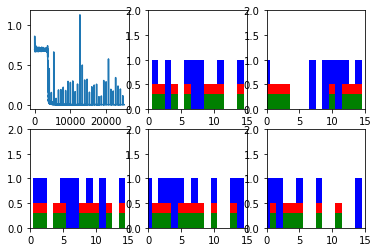

Step 500 Loss 0.000297502


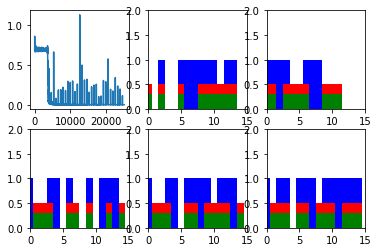

Step 600 Loss 0.000281288


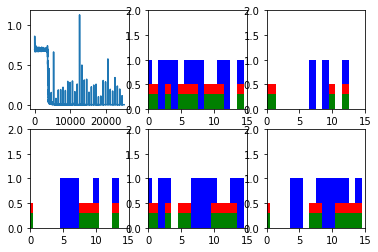

New data, epoch 38
Step 0 Loss 0.0935213


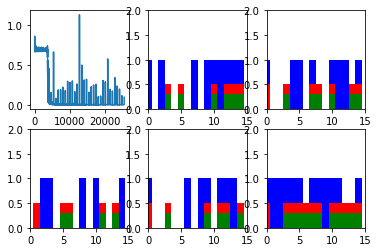

Step 100 Loss 0.000306366


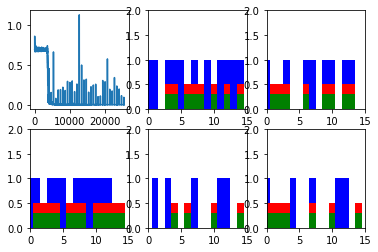

Step 200 Loss 0.000350826


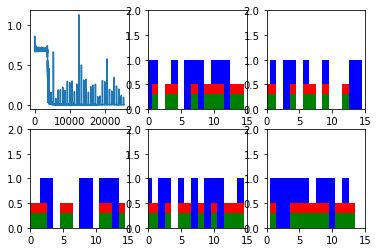

Step 300 Loss 0.000308025


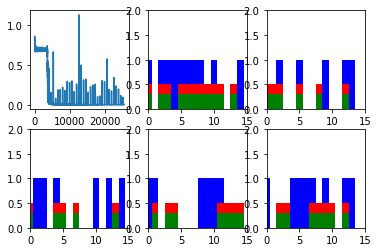

Step 400 Loss 0.000257654


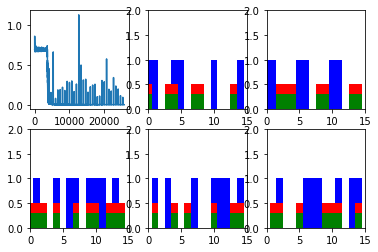

Step 500 Loss 0.000270792


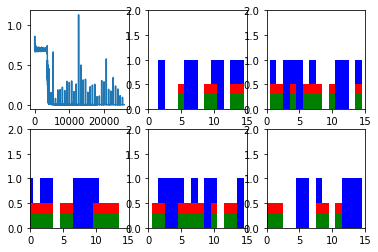

Step 600 Loss 0.000320658


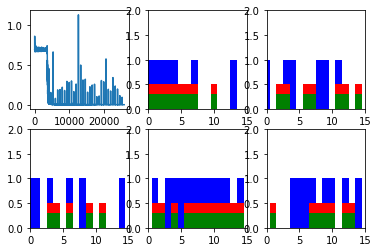

New data, epoch 39
Step 0 Loss 0.29489


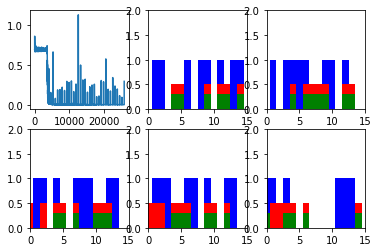

Step 100 Loss 0.000339275


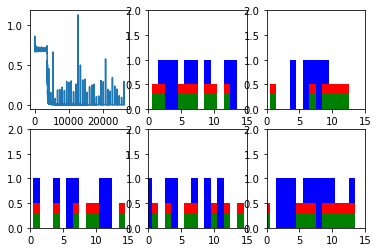

Step 200 Loss 0.000260524


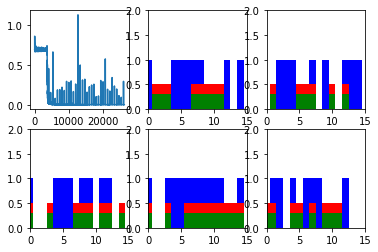

Step 300 Loss 0.000301312


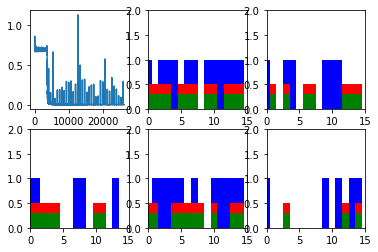

Step 400 Loss 0.000292113


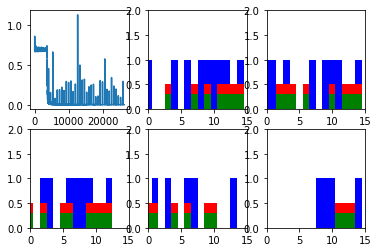

Step 500 Loss 0.000367295


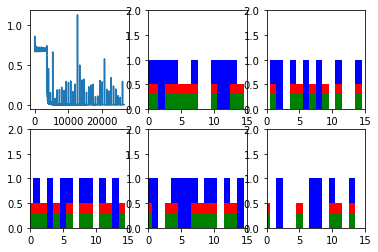

Step 600 Loss 0.000299419


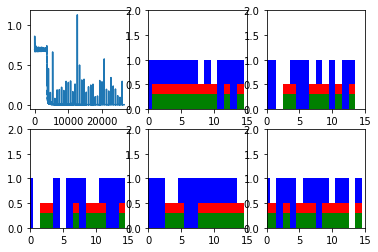

New data, epoch 40
Step 0 Loss 0.253518


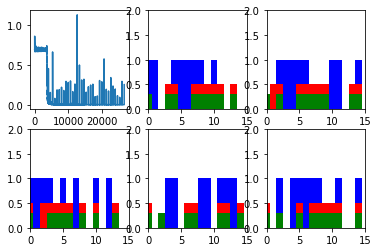

Step 100 Loss 0.000228596


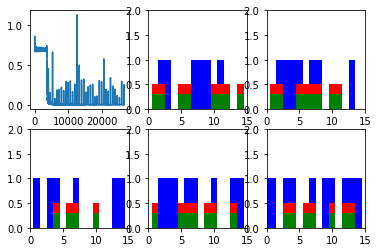

Step 200 Loss 0.000371098


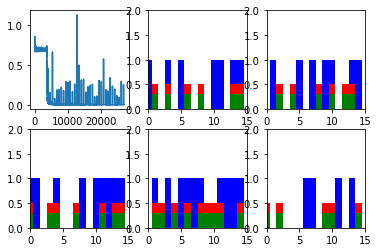

Step 300 Loss 0.000251782


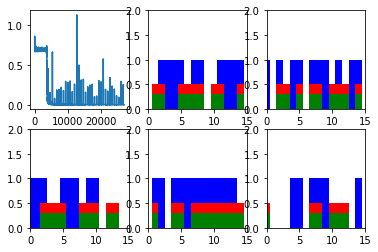

Step 400 Loss 0.000303394


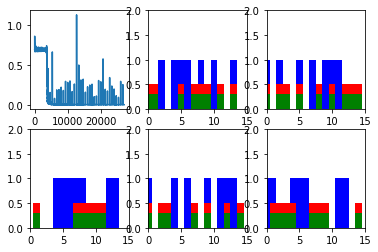

Step 500 Loss 0.000344802


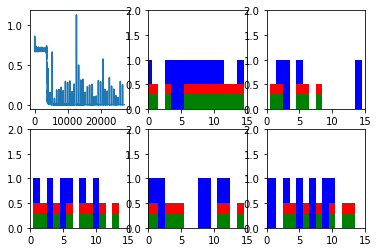

Step 600 Loss 0.000303091


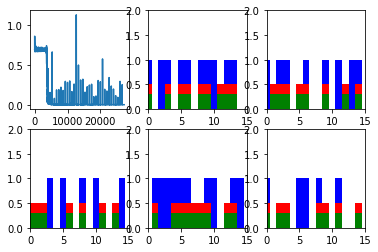

New data, epoch 41
Step 0 Loss 0.245451


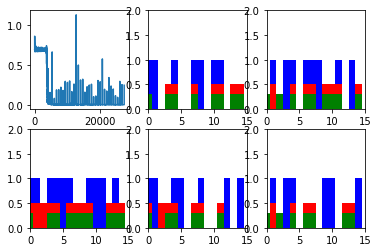

Step 100 Loss 0.000305433


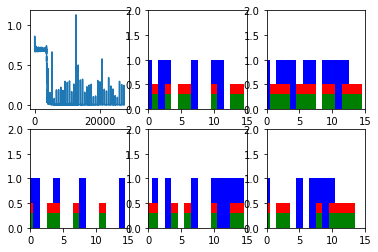

Step 200 Loss 0.000316751


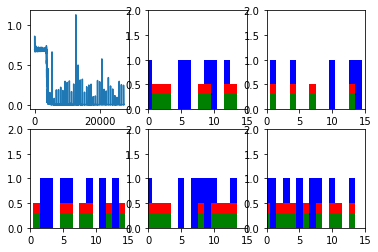

Step 300 Loss 0.000307764


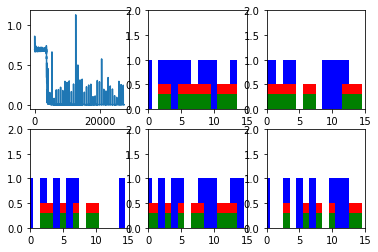

Step 400 Loss 0.000269962


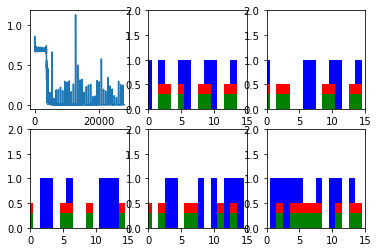

Step 500 Loss 0.0003699


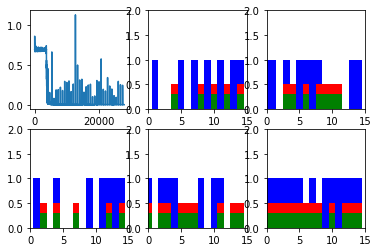

Step 600 Loss 0.000334153


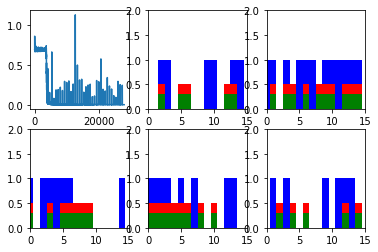

New data, epoch 42
Step 0 Loss 0.442553


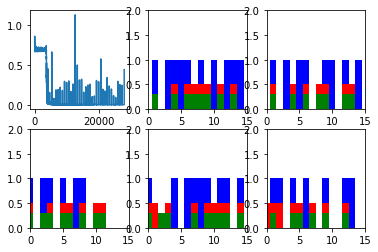

Step 100 Loss 0.000330315


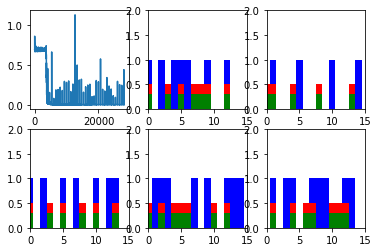

Step 200 Loss 0.000313164


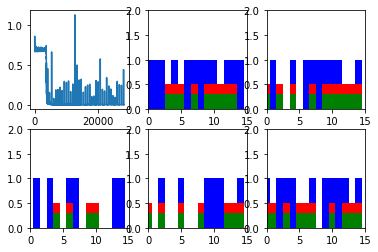

Step 300 Loss 0.000360234


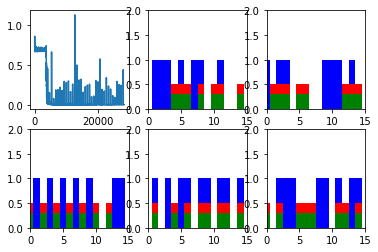

Step 400 Loss 0.000354004


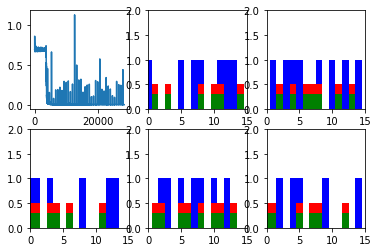

Step 500 Loss 0.000251872


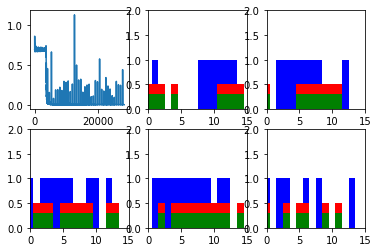

Step 600 Loss 0.000296276


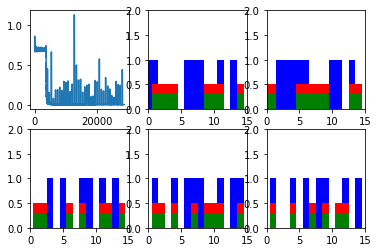

New data, epoch 43
Step 0 Loss 0.121107


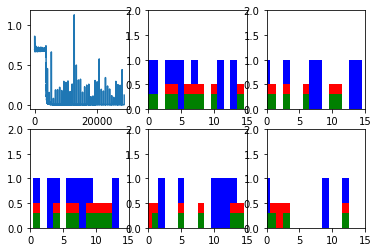

Step 100 Loss 0.000271579


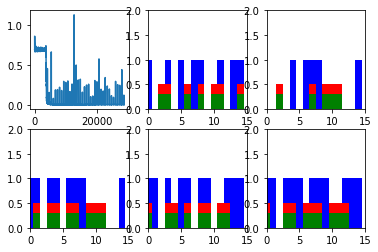

Step 200 Loss 0.000263062


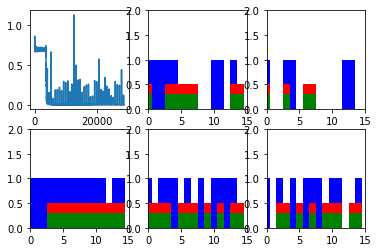

Step 300 Loss 0.00028569


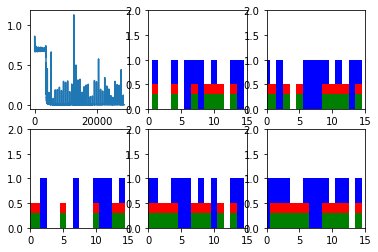

Step 400 Loss 0.000305879


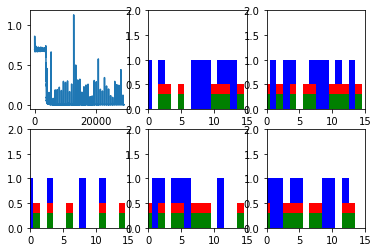

Step 500 Loss 0.000315673


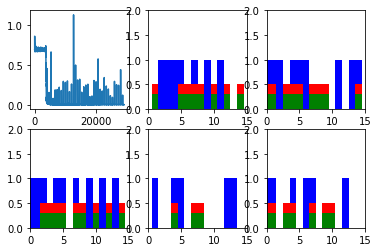

Step 600 Loss 0.000326823


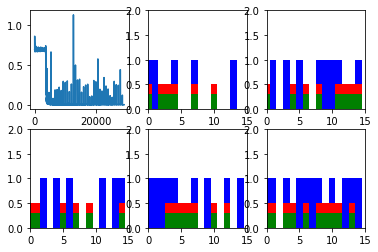

New data, epoch 44
Step 0 Loss 0.388935


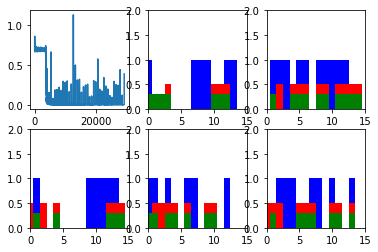

Step 100 Loss 0.000228275


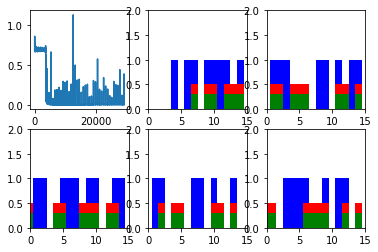

Step 200 Loss 0.000249036


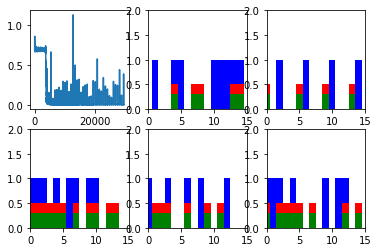

Step 300 Loss 0.000331385


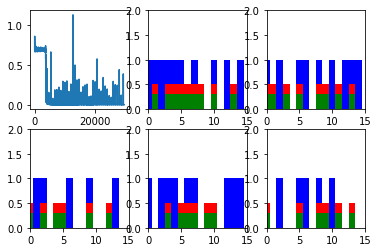

Step 400 Loss 0.000217658


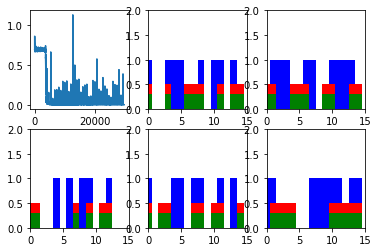

Step 500 Loss 0.000200601


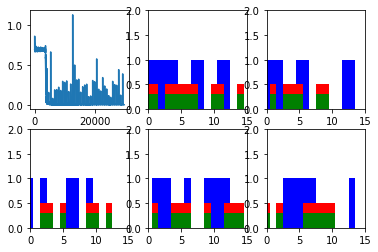

Step 600 Loss 0.000287447


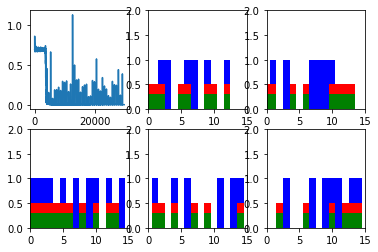

New data, epoch 45
Step 0 Loss 0.293335


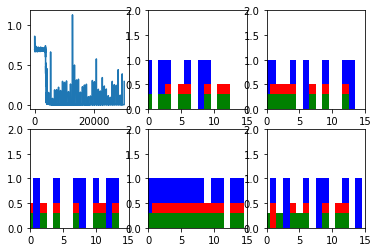

Step 100 Loss 0.000298419


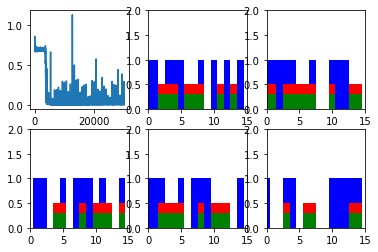

Step 200 Loss 0.000303794


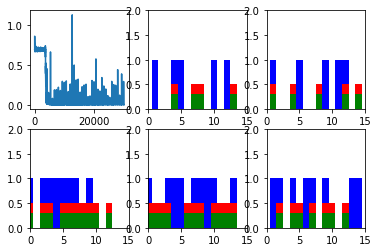

Step 300 Loss 0.000221895


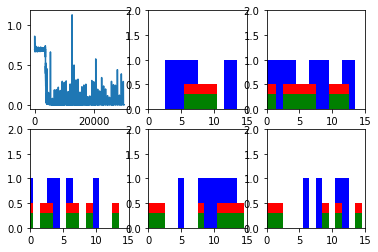

Step 400 Loss 0.000307295


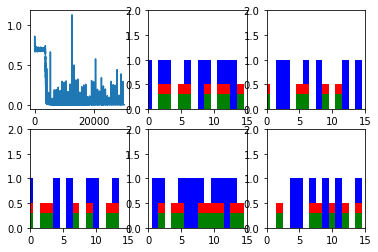

Step 500 Loss 0.000288007


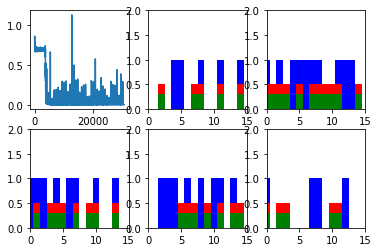

Step 600 Loss 0.000289565


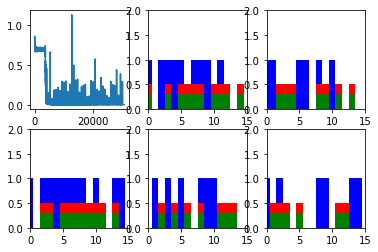

New data, epoch 46
Step 0 Loss 0.135134


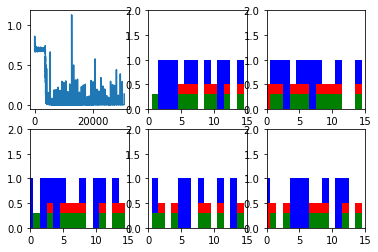

Step 100 Loss 0.000211204


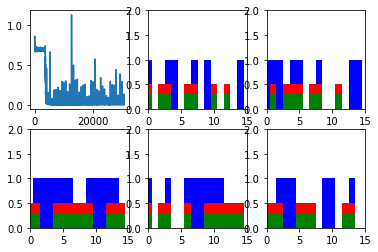

Step 200 Loss 0.000308649


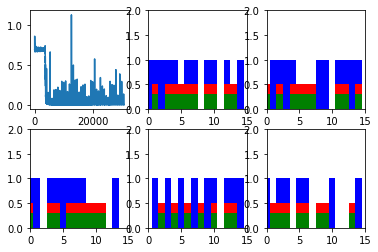

Step 300 Loss 0.000259812


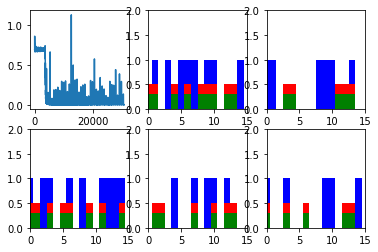

Step 400 Loss 0.000238917


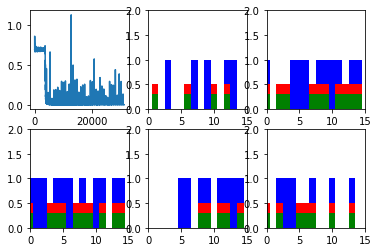

Step 500 Loss 0.000266927


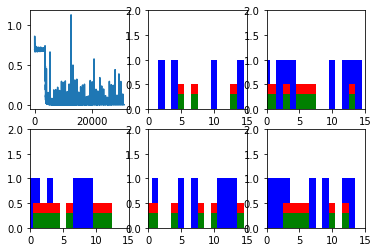

Step 600 Loss 0.000245519


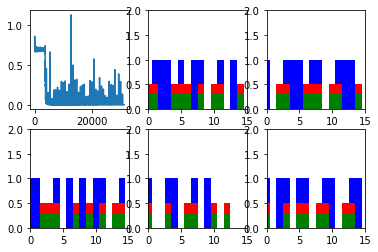

New data, epoch 47
Step 0 Loss 0.15206


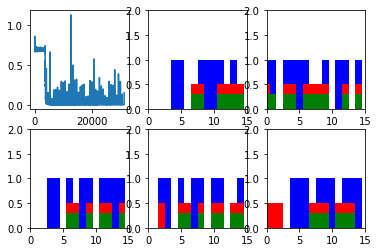

Step 100 Loss 0.000275418


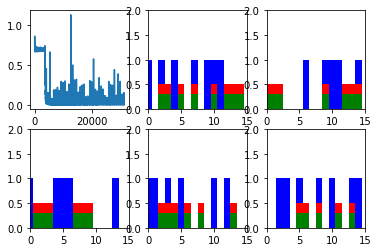

Step 200 Loss 0.0002105


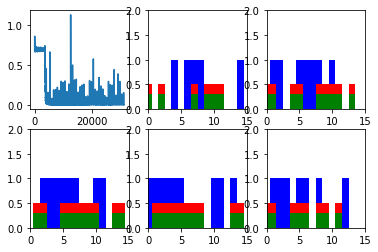

Step 300 Loss 0.000235774


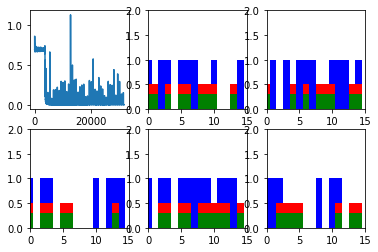

Step 400 Loss 0.000284006


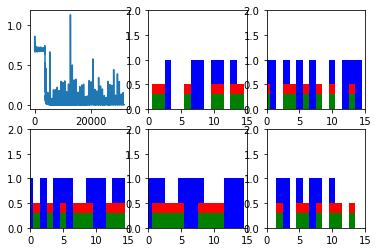

Step 500 Loss 0.000242474


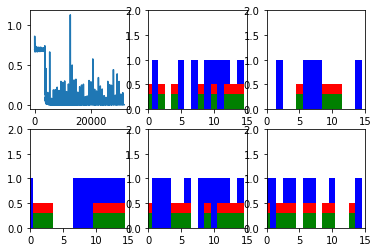

Step 600 Loss 0.000234829


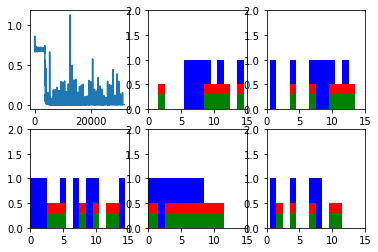

New data, epoch 48
Step 0 Loss 0.196513


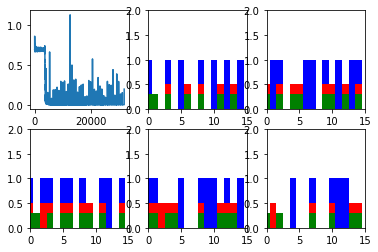

Step 100 Loss 0.000239299


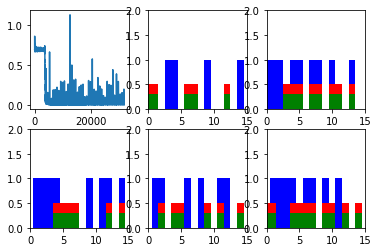

Step 200 Loss 0.000314907


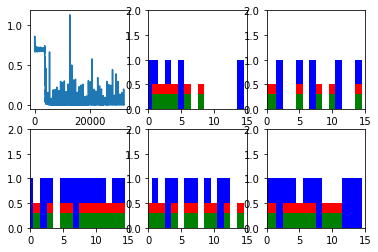

Step 300 Loss 0.000252331


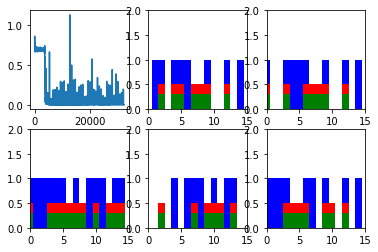

Step 400 Loss 0.000254749


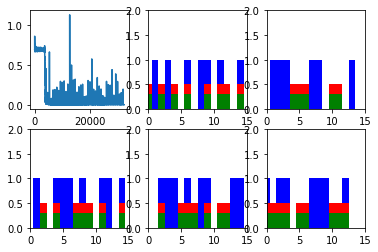

Step 500 Loss 0.000256164


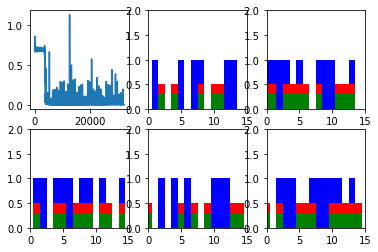

Step 600 Loss 0.000204117


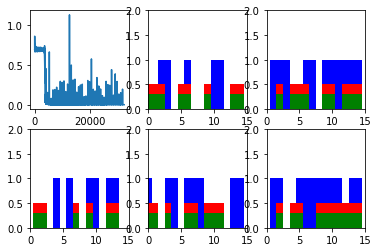

New data, epoch 49
Step 0 Loss 0.351596


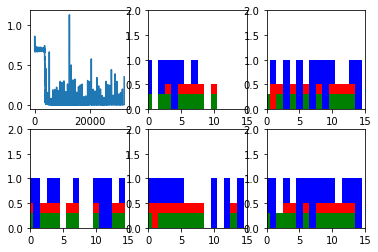

Step 100 Loss 0.00027129


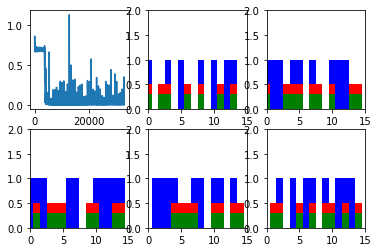

Step 200 Loss 0.000219233


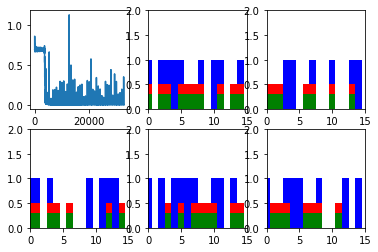

Step 300 Loss 0.000201057


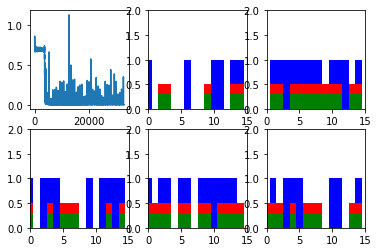

Step 400 Loss 0.00026939


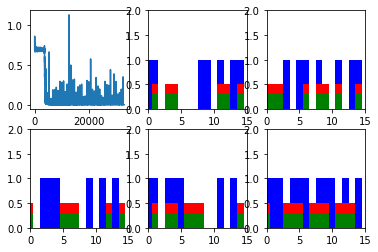

Step 500 Loss 0.000193934


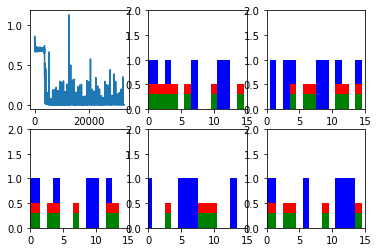

Step 600 Loss 0.000216582


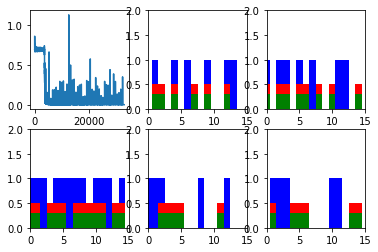

New data, epoch 50
Step 0 Loss 0.121687


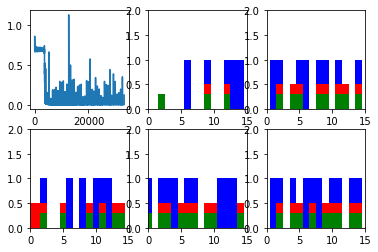

Step 100 Loss 0.000237309


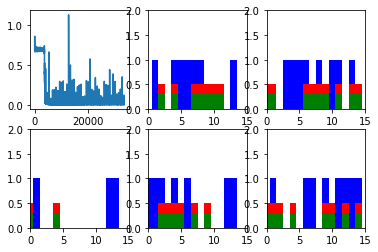

Step 200 Loss 0.000231981


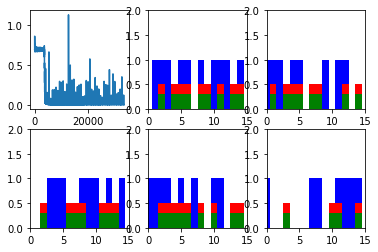

Step 300 Loss 0.000300993


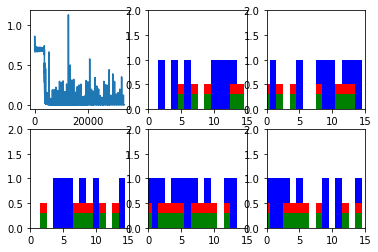

Step 400 Loss 0.000184341


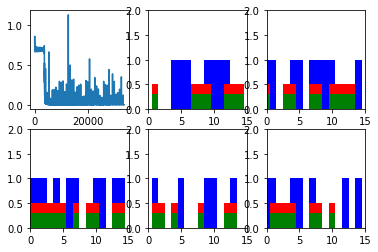

Step 500 Loss 0.000205841


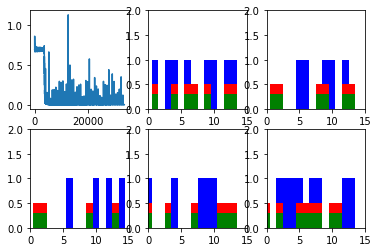

Step 600 Loss 0.000257295


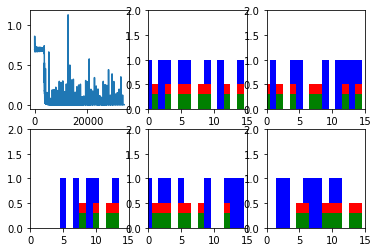

New data, epoch 51
Step 0 Loss 0.207538


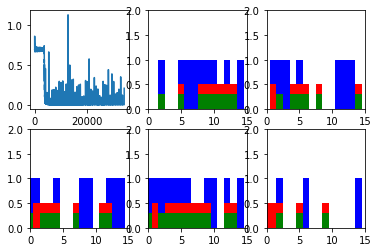

Step 100 Loss 0.000232801


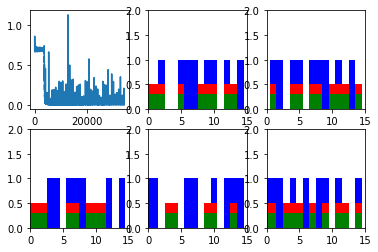

Step 200 Loss 0.000250989


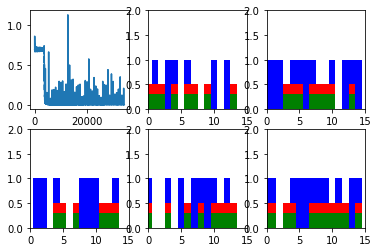

Step 300 Loss 0.000208839


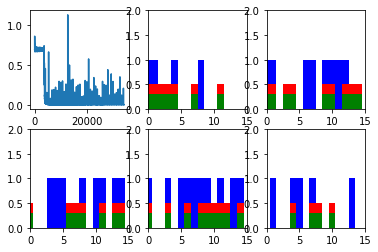

Step 400 Loss 0.000253202


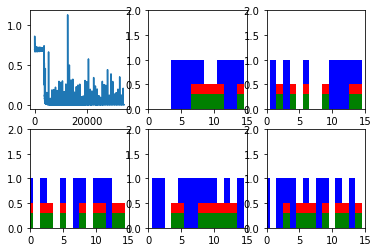

Step 500 Loss 0.000266877


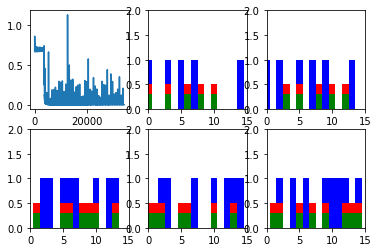

Step 600 Loss 0.000223579


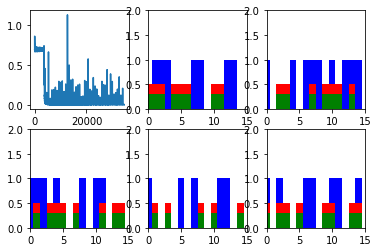

New data, epoch 52
Step 0 Loss 0.322897


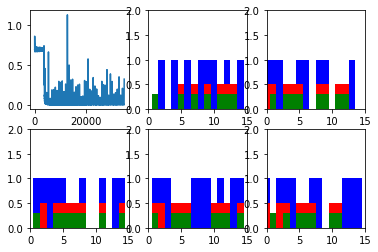

Step 100 Loss 0.000245306


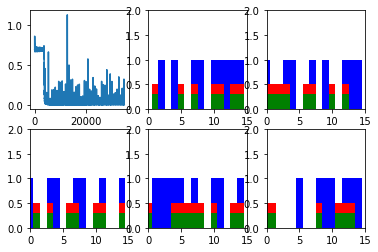

Step 200 Loss 0.000254755


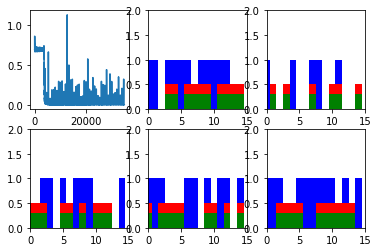

Step 300 Loss 0.000220675


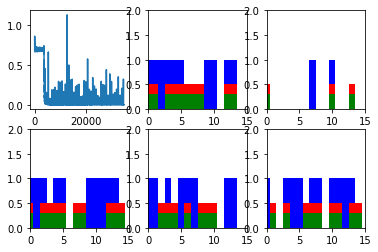

Step 400 Loss 0.000285615


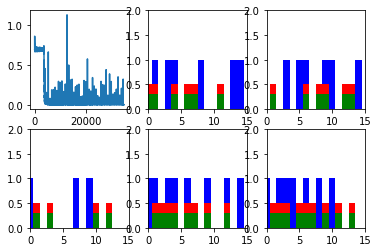

Step 500 Loss 0.000312637


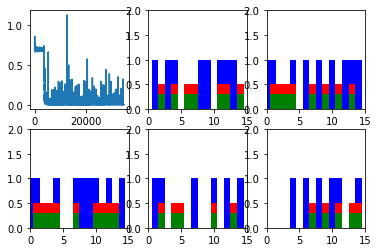

Step 600 Loss 0.000184563


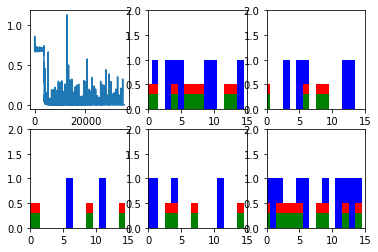

New data, epoch 53
Step 0 Loss 0.342219


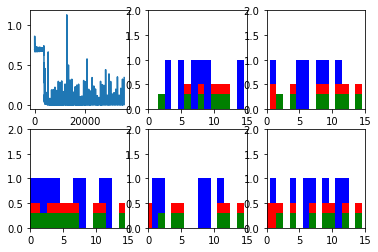

Step 100 Loss 0.000227875


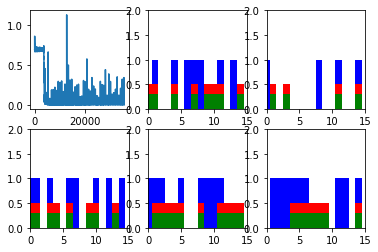

Step 200 Loss 0.000266943


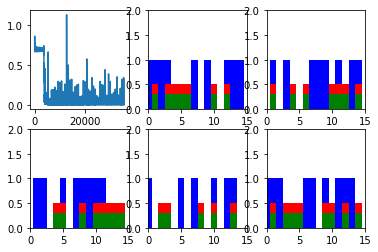

Step 300 Loss 0.000262896


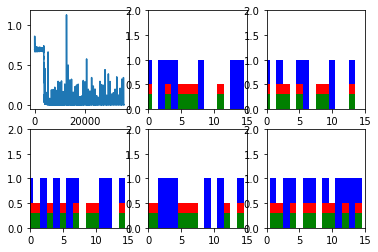

Step 400 Loss 0.000190088


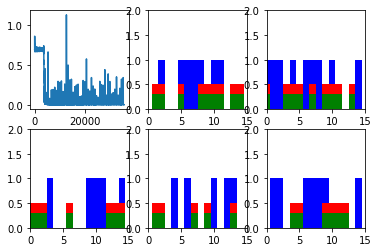

Step 500 Loss 0.000168776


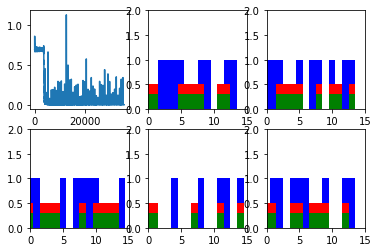

Step 600 Loss 0.000220133


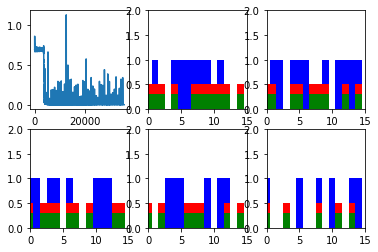

New data, epoch 54
Step 0 Loss 0.357922


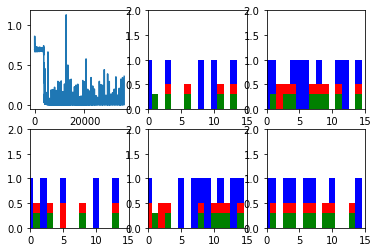

Step 100 Loss 0.000317372


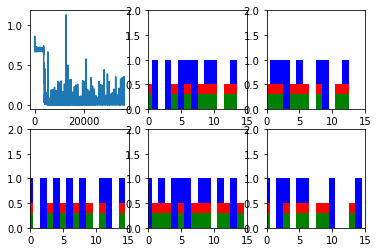

Step 200 Loss 0.000263626


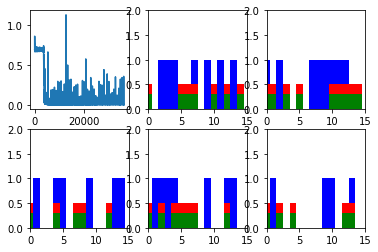

Step 300 Loss 0.000199324


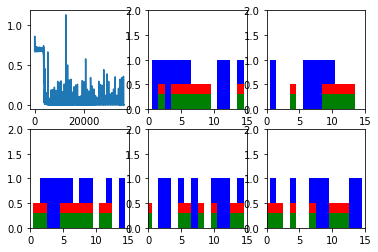

Step 400 Loss 0.000232289


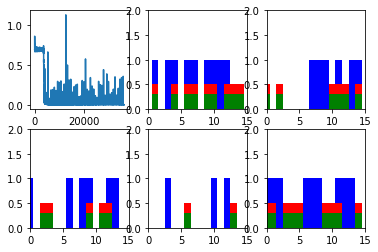

Step 500 Loss 0.000225221


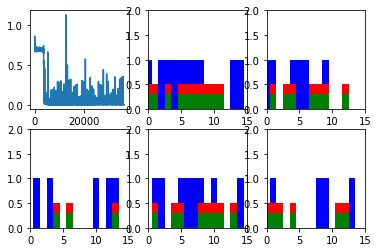

Step 600 Loss 0.000283822


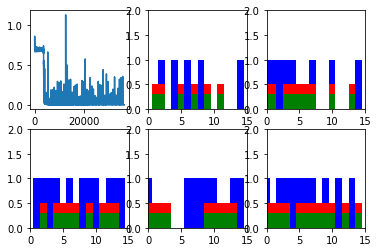

New data, epoch 55
Step 0 Loss 0.0980069


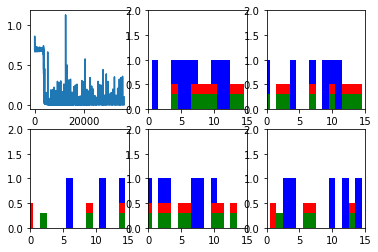

Step 100 Loss 0.000238809


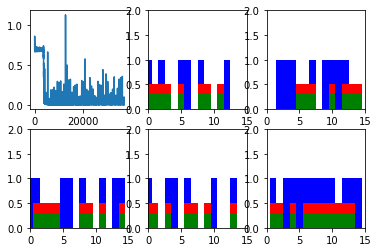

Step 200 Loss 0.000178874


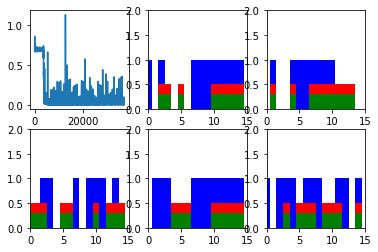

Step 300 Loss 0.000177626


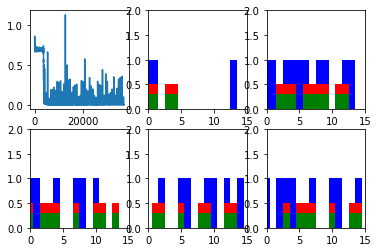

Step 400 Loss 0.000275765


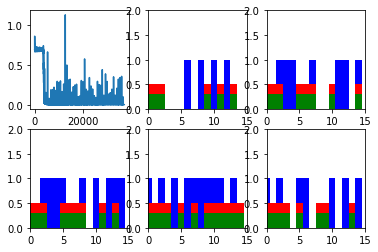

Step 500 Loss 0.000221344


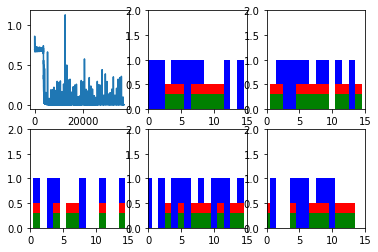

Step 600 Loss 0.000206394


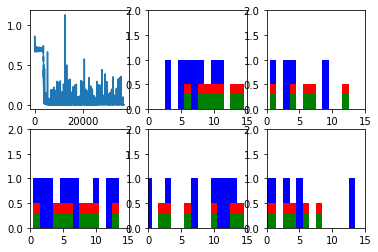

New data, epoch 56
Step 0 Loss 0.454749


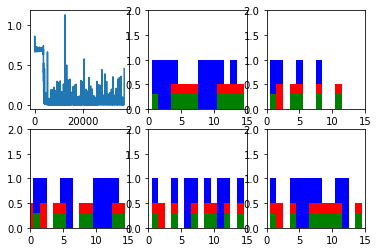

Step 100 Loss 0.000214649


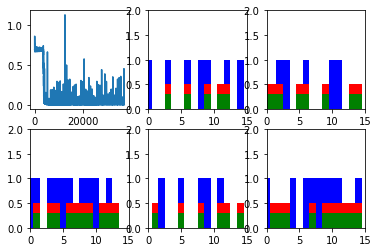

Step 200 Loss 0.000282534


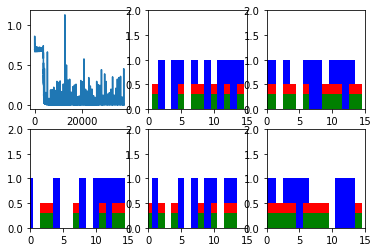

Step 300 Loss 0.000179565


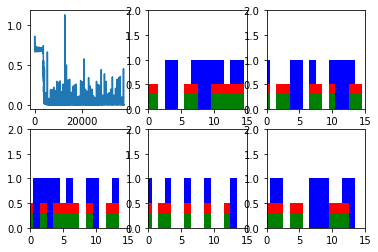

Step 400 Loss 0.000218347


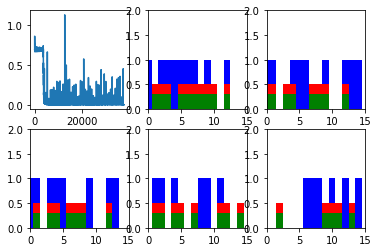

Step 500 Loss 0.000237012


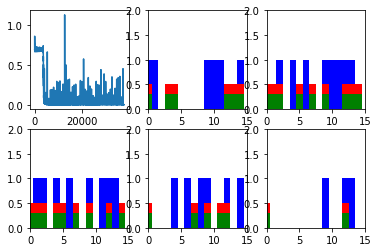

Step 600 Loss 0.000205885


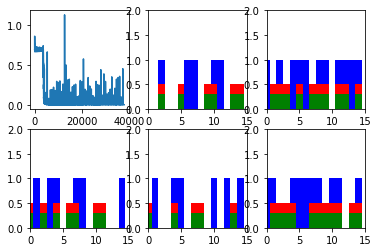

New data, epoch 57
Step 0 Loss 0.18043


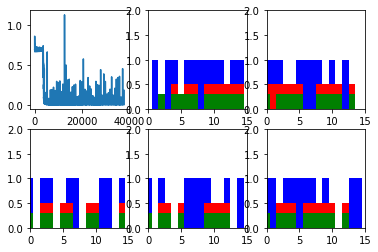

Step 100 Loss 0.000322568


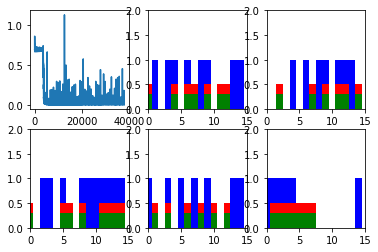

Step 200 Loss 0.000224565


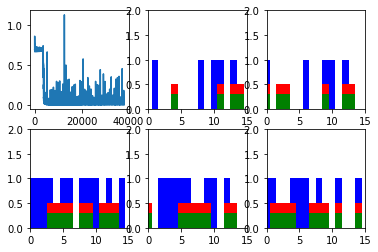

Step 300 Loss 0.00023405


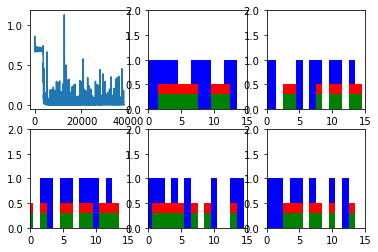

Step 400 Loss 0.00025259


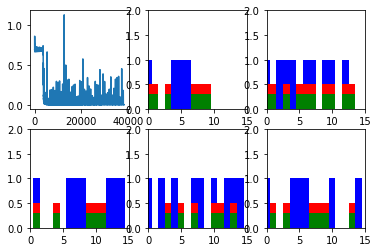

Step 500 Loss 0.000270649


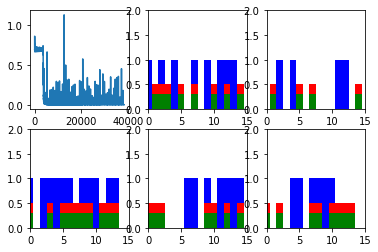

Step 600 Loss 0.000294622


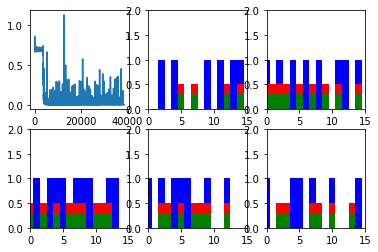

New data, epoch 58
Step 0 Loss 0.251274


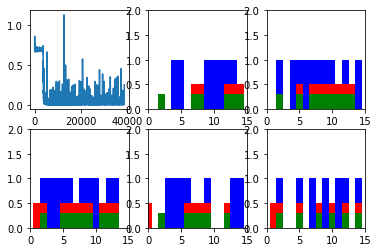

Step 100 Loss 0.000244706


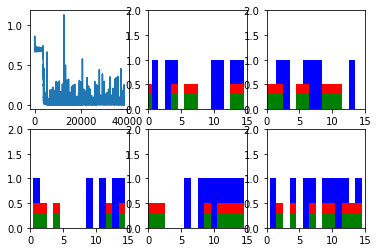

Step 200 Loss 0.000324047


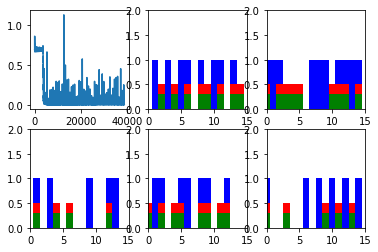

Step 300 Loss 0.000314234


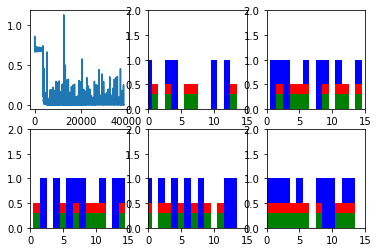

Step 400 Loss 0.000256099


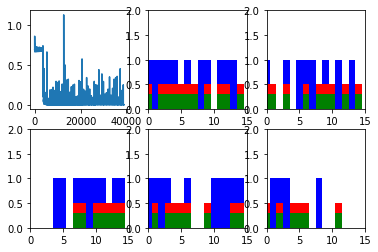

Step 500 Loss 0.00022969


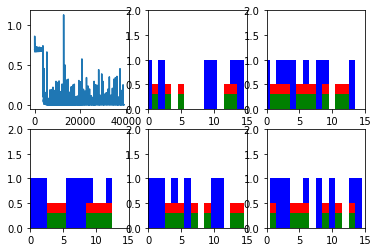

Step 600 Loss 0.000233763


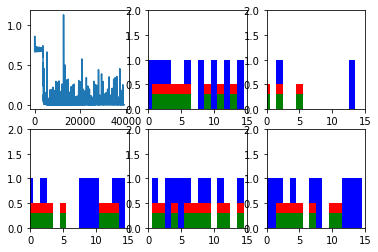

New data, epoch 59
Step 0 Loss 0.13443


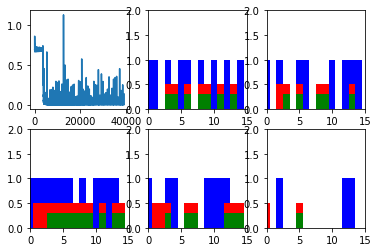

Step 100 Loss 0.000208745


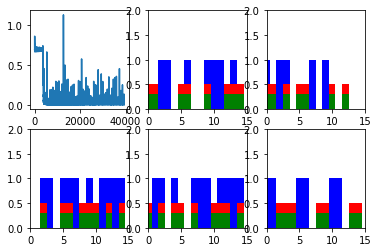

Step 200 Loss 0.000229164


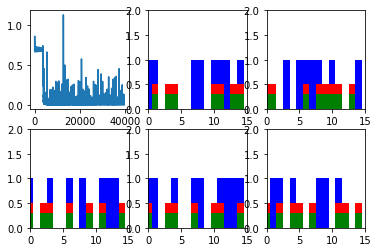

Step 300 Loss 0.000246333


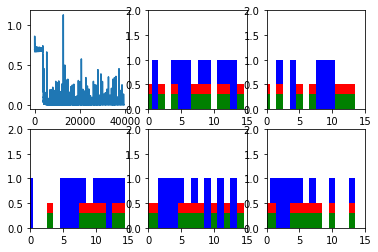

Step 400 Loss 0.000192887


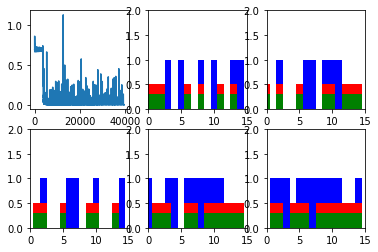

Step 500 Loss 0.000195518


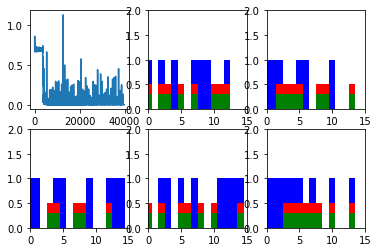

Step 600 Loss 0.000218133


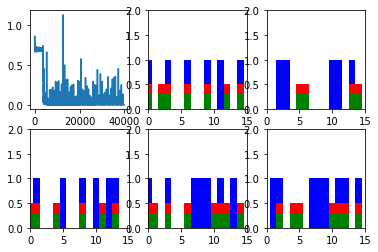

New data, epoch 60
Step 0 Loss 0.324445


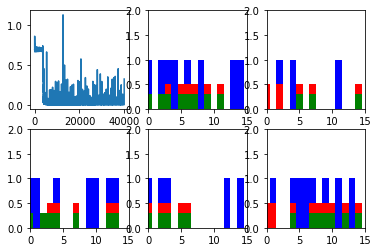

Step 100 Loss 0.000232141


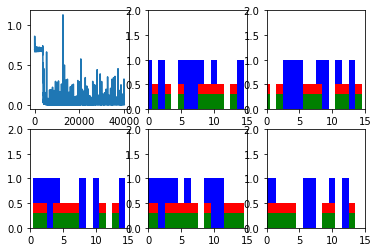

Step 200 Loss 0.000234866


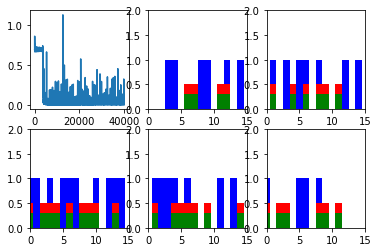

Step 300 Loss 0.00019563


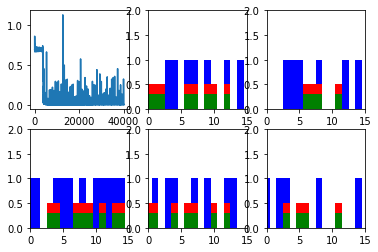

Step 400 Loss 0.000202521


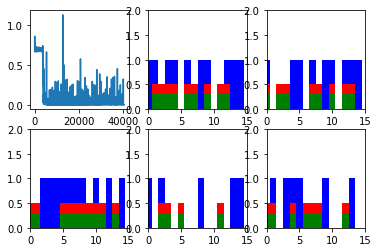

Step 500 Loss 0.000202304


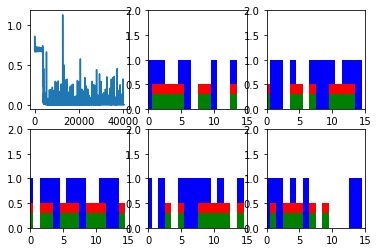

Step 600 Loss 0.000184428


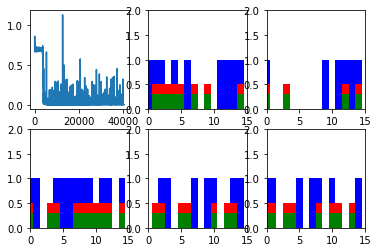

New data, epoch 61
Step 0 Loss 0.243621


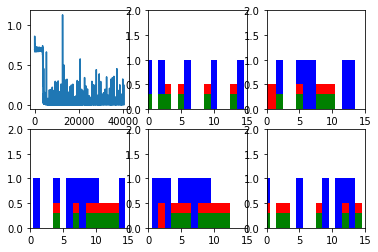

Step 100 Loss 0.000161007


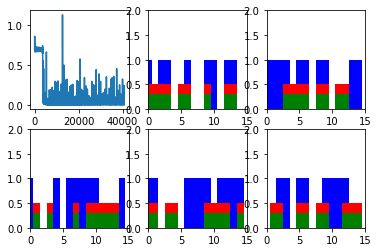

Step 200 Loss 0.000181658


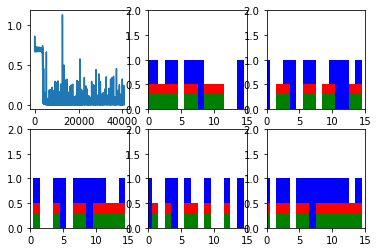

Step 300 Loss 0.000160101


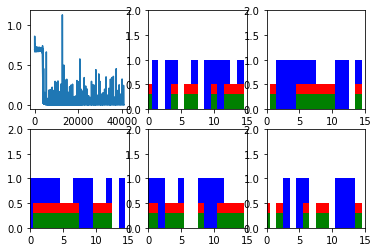

Step 400 Loss 0.000210394


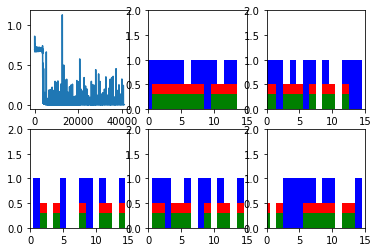

Step 500 Loss 0.000185617


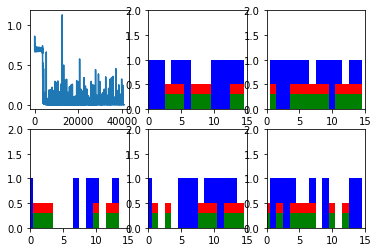

Step 600 Loss 0.000149937


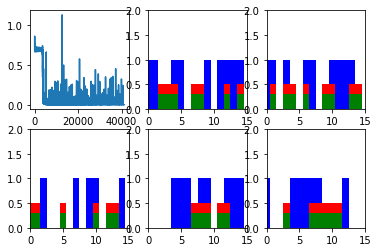

New data, epoch 62
Step 0 Loss 0.218799


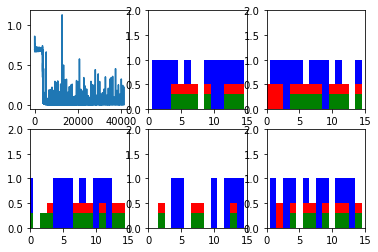

Step 100 Loss 0.000216428


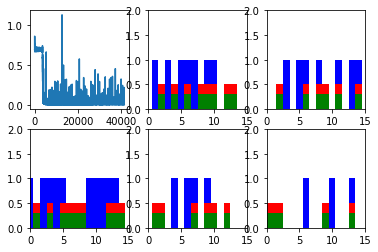

Step 200 Loss 0.000203195


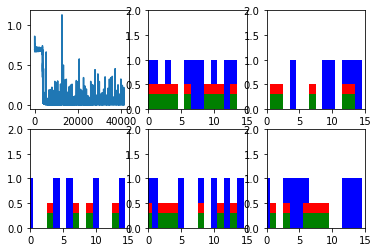

Step 300 Loss 0.000159078


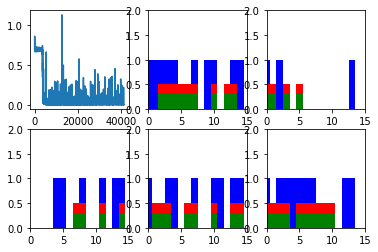

Step 400 Loss 0.000162132


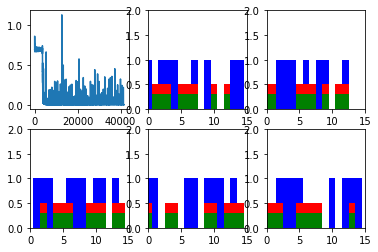

Step 500 Loss 0.000205572


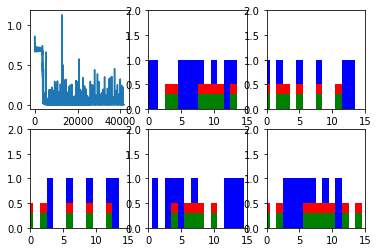

Step 600 Loss 0.000220908


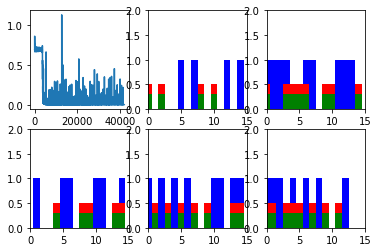

New data, epoch 63
Step 0 Loss 0.225186


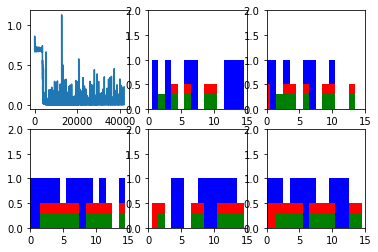

Step 100 Loss 0.000222388


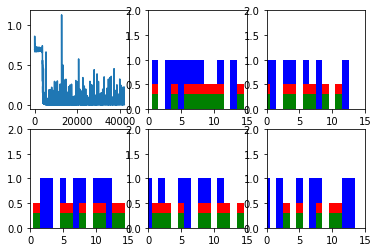

Step 200 Loss 0.000175055


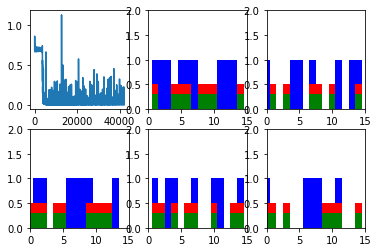

Step 300 Loss 0.000150898


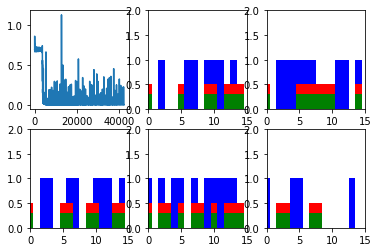

Step 400 Loss 0.00017086


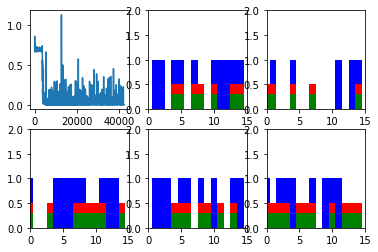

Step 500 Loss 0.000206477


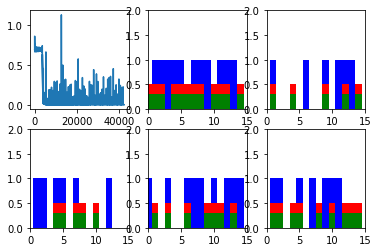

Step 600 Loss 0.00017084


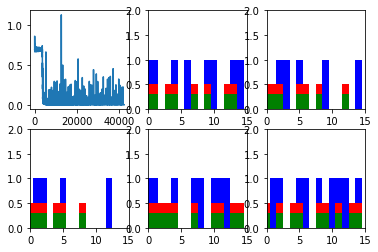

New data, epoch 64
Step 0 Loss 0.12616


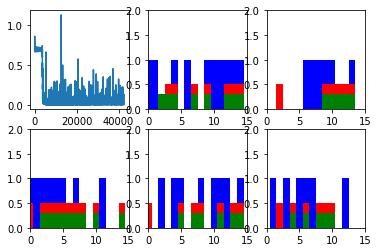

Step 100 Loss 0.000178665


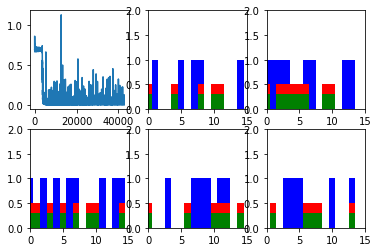

Step 200 Loss 0.0001767


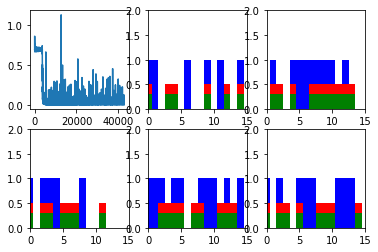

Step 300 Loss 0.000197542


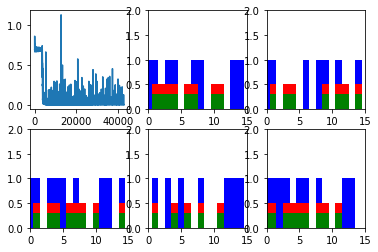

Step 400 Loss 0.000153567


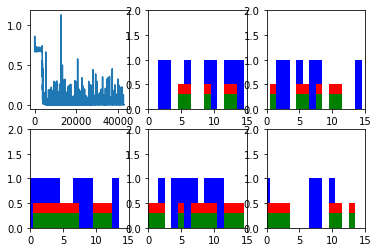

Step 500 Loss 0.000211967


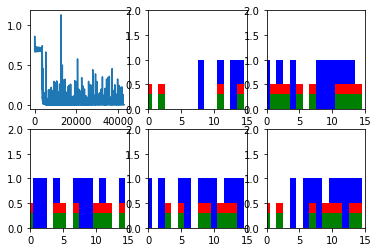

Step 600 Loss 0.000183209


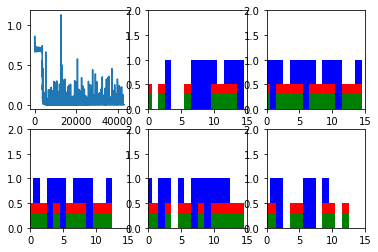

New data, epoch 65
Step 0 Loss 0.207795


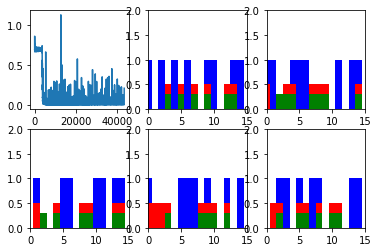

Step 100 Loss 0.00016361


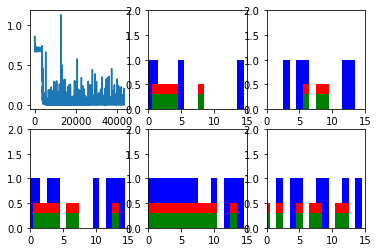

Step 200 Loss 0.000176115


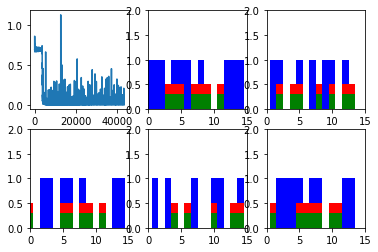

Step 300 Loss 0.000147108


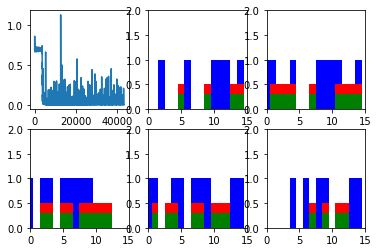

Step 400 Loss 0.000141063


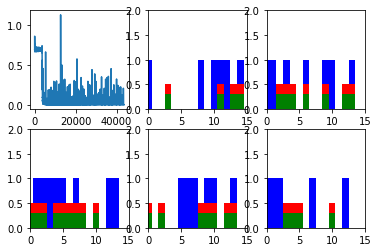

Step 500 Loss 0.000171588


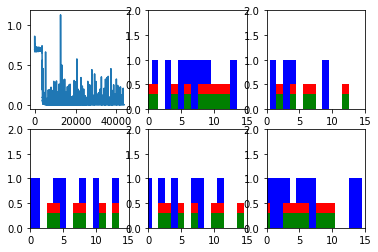

Step 600 Loss 0.000184031


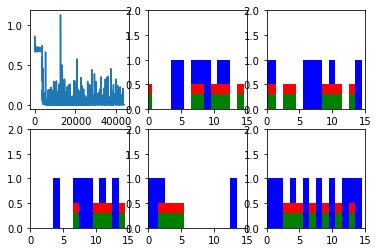

New data, epoch 66
Step 0 Loss 0.155454


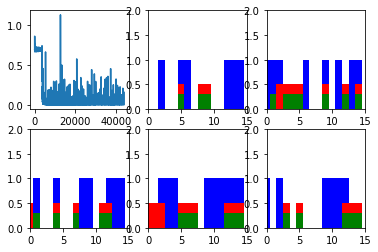

Step 100 Loss 0.000222355


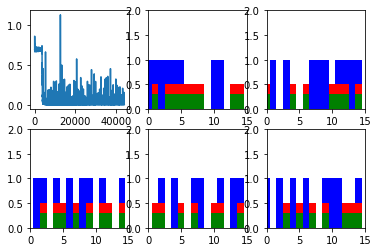

Step 200 Loss 0.000186596


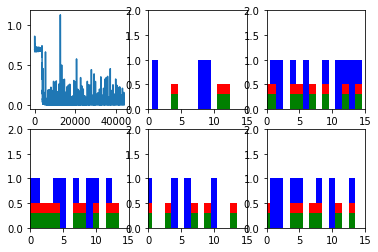

Step 300 Loss 0.00014736


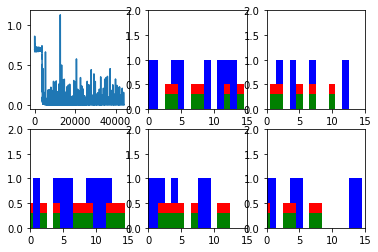

Step 400 Loss 0.000154855


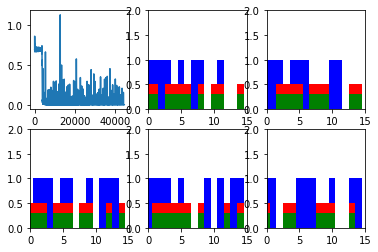

Step 500 Loss 0.000168149


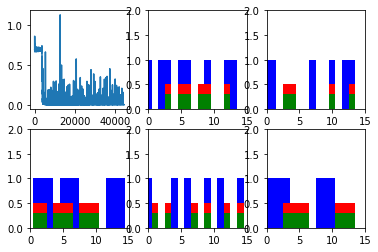

Step 600 Loss 0.000186971


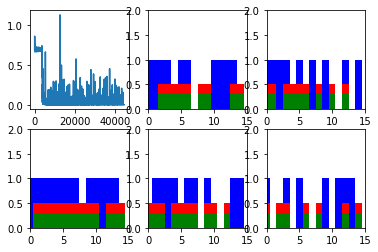

New data, epoch 67
Step 0 Loss 0.273145


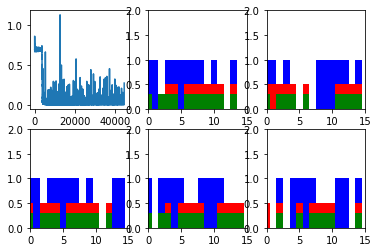

Step 100 Loss 0.00020419


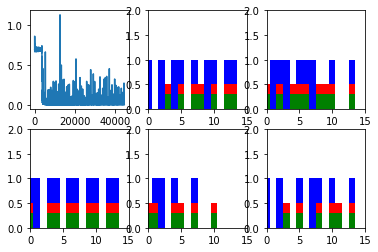

Step 200 Loss 0.000149175


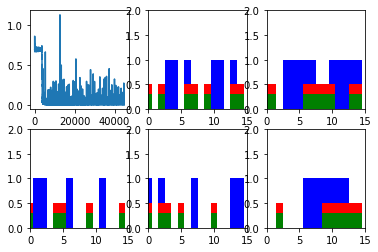

Step 300 Loss 0.000178172


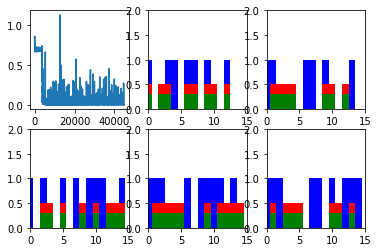

Step 400 Loss 0.000179737


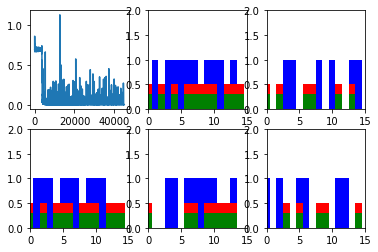

Step 500 Loss 0.000174121


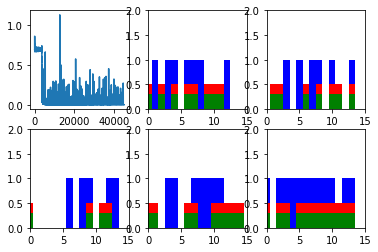

Step 600 Loss 0.000169958


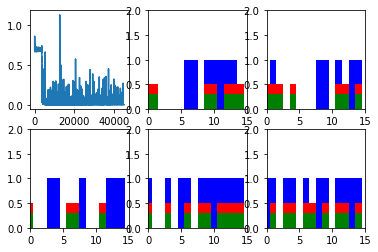

New data, epoch 68
Step 0 Loss 0.101526


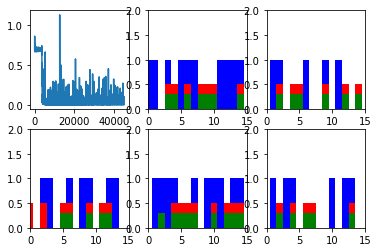

Step 100 Loss 0.000159023


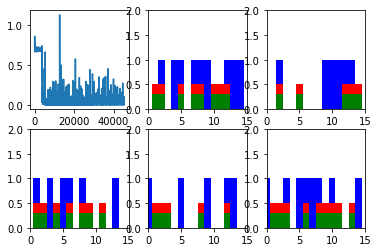

Step 200 Loss 0.000151972


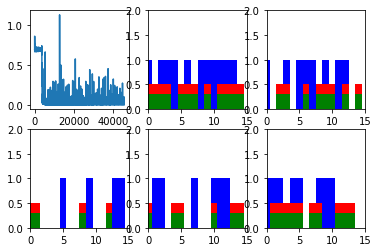

Step 300 Loss 0.000108355


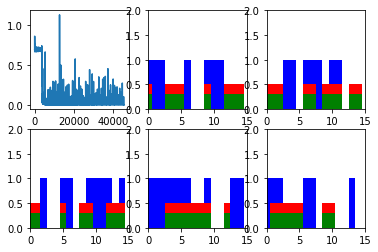

Step 400 Loss 0.00017915


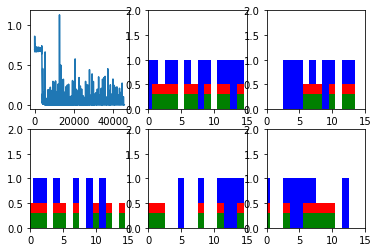

Step 500 Loss 0.000177982


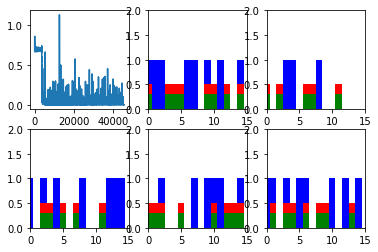

Step 600 Loss 0.000190956


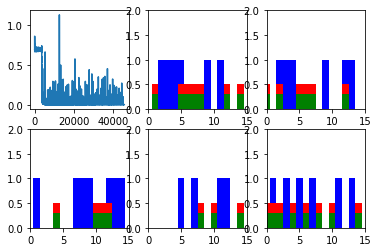

New data, epoch 69
Step 0 Loss 0.251345


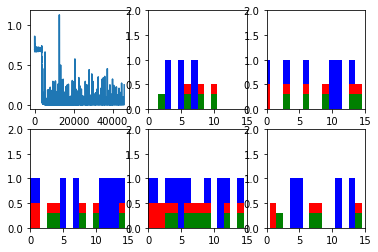

Step 100 Loss 0.000137269


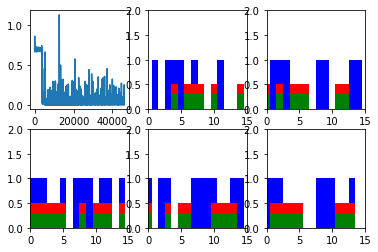

Step 200 Loss 0.00013558


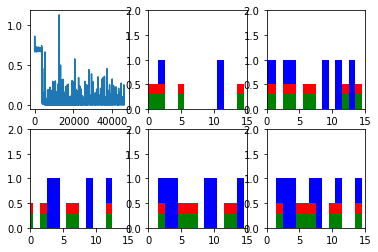

Step 300 Loss 0.000156361


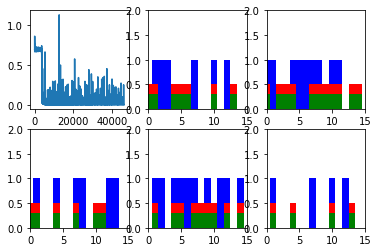

Step 400 Loss 0.000160105


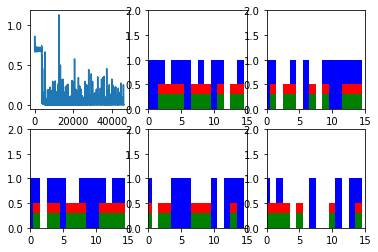

Step 500 Loss 0.000160651


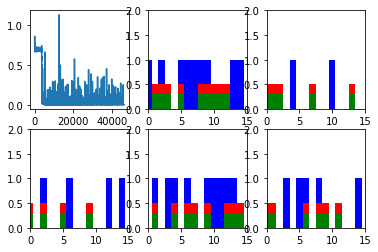

Step 600 Loss 0.000167183


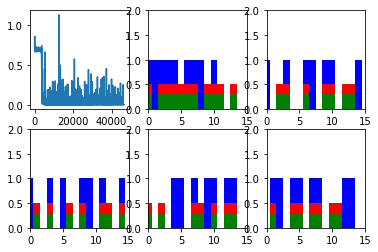

New data, epoch 70
Step 0 Loss 0.19303


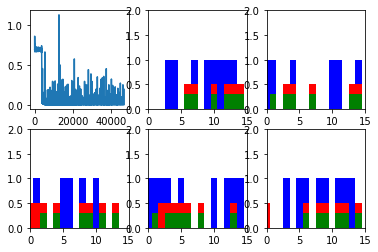

Step 100 Loss 0.000163544


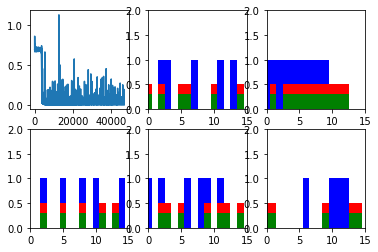

Step 200 Loss 0.000160566


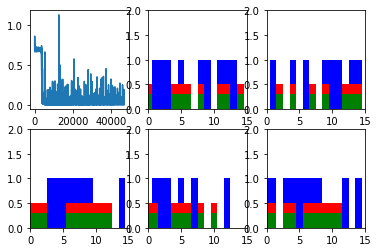

Step 300 Loss 0.000172382


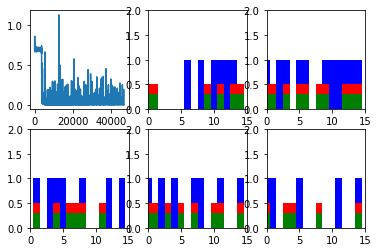

Step 400 Loss 0.000193753


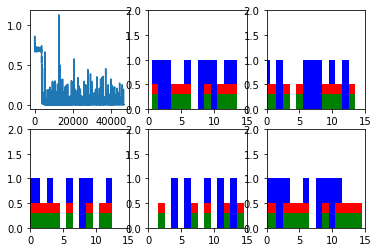

Step 500 Loss 0.000163025


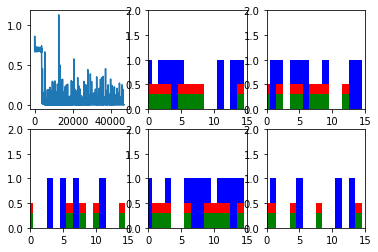

Step 600 Loss 0.000175499


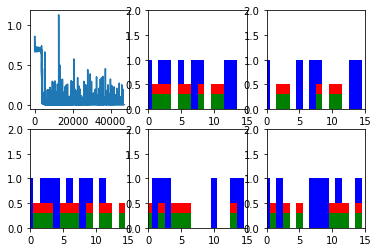

New data, epoch 71
Step 0 Loss 0.345113


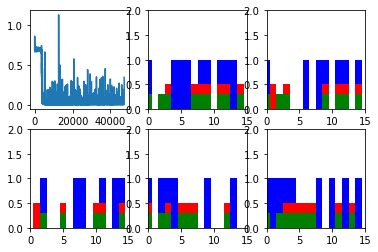

Step 100 Loss 0.000266948


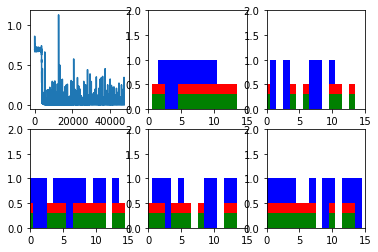

Step 200 Loss 0.000253463


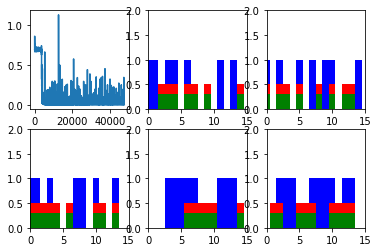

Step 300 Loss 0.000281001


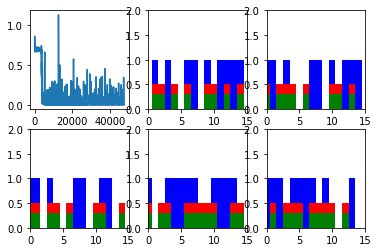

Step 400 Loss 0.000175047


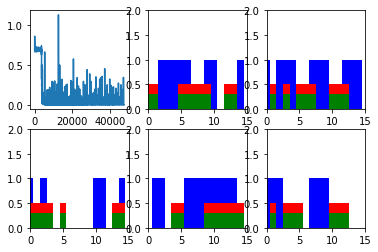

Step 500 Loss 0.000292841


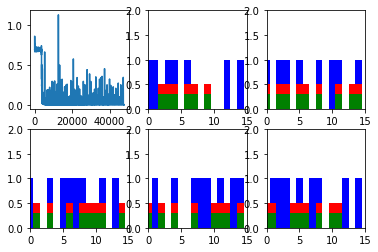

Step 600 Loss 0.000274267


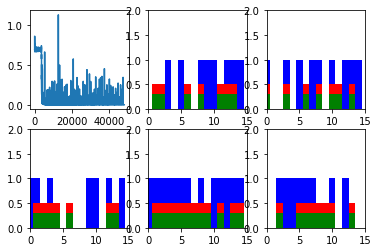

New data, epoch 72
Step 0 Loss 0.441625


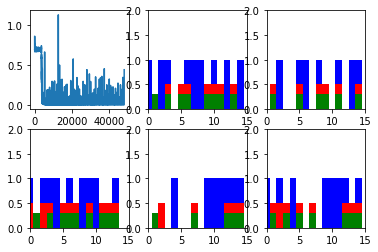

Step 100 Loss 0.000227218


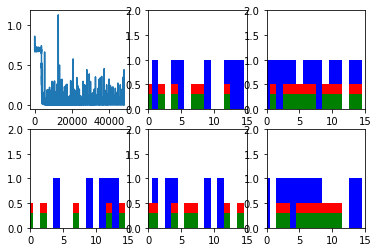

Step 200 Loss 0.000185637


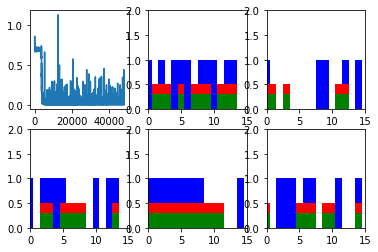

Step 300 Loss 0.000210951


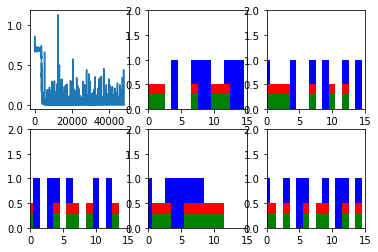

Step 400 Loss 0.000227032


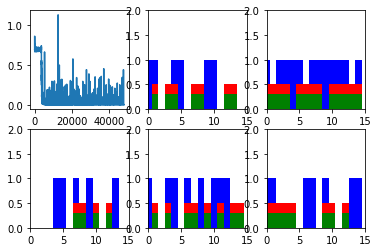

Step 500 Loss 0.000193623


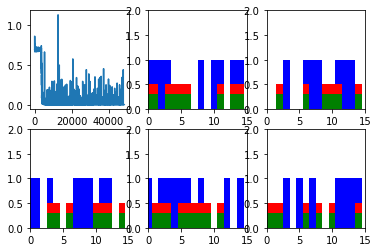

Step 600 Loss 0.000187746


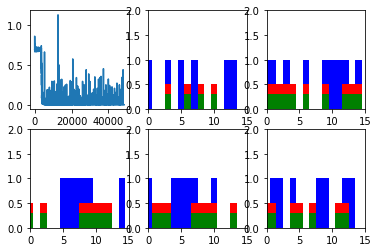

New data, epoch 73
Step 0 Loss 0.265152


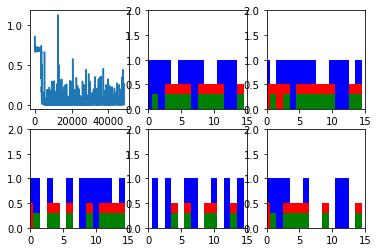

Step 100 Loss 0.000209099


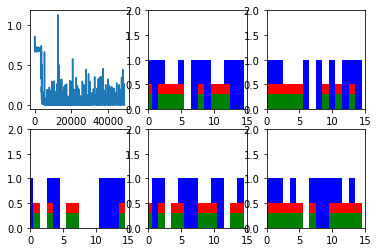

Step 200 Loss 0.000188958


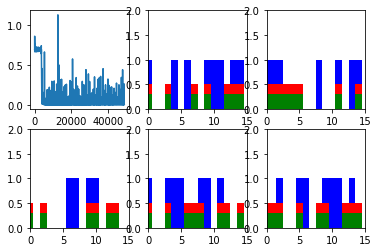

Step 300 Loss 0.000170664


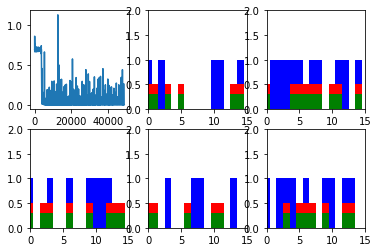

Step 400 Loss 0.0002377


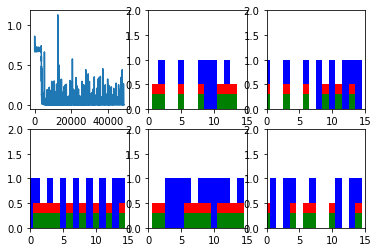

Step 500 Loss 0.000224888


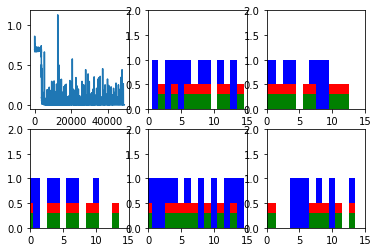

Step 600 Loss 0.000177786


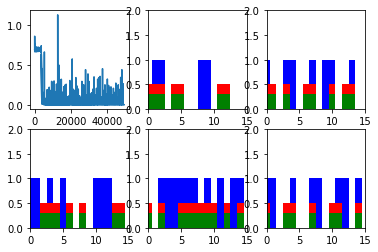

New data, epoch 74
Step 0 Loss 0.233434


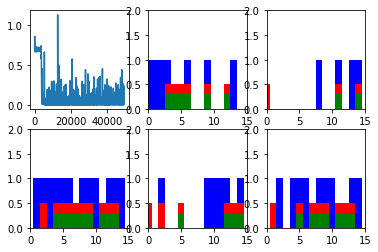

Step 100 Loss 0.000155901


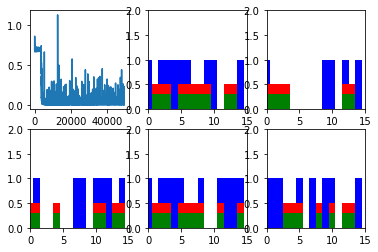

Step 200 Loss 0.000192544


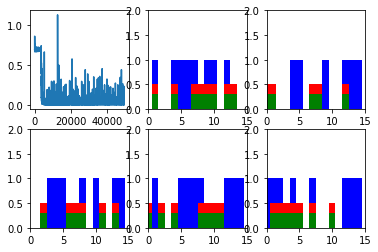

Step 300 Loss 0.000189726


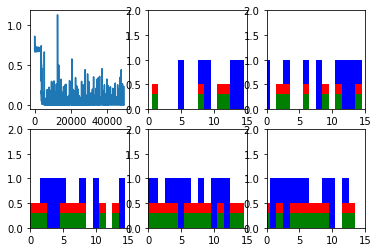

Step 400 Loss 0.000210479


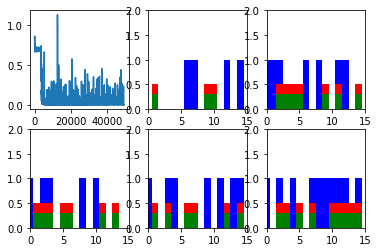

Step 500 Loss 0.000168628


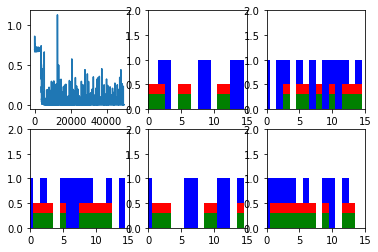

Step 600 Loss 0.000164453


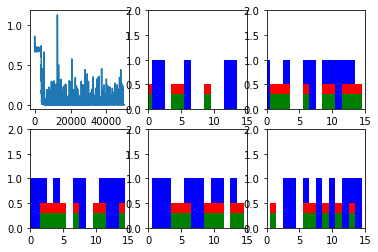

New data, epoch 75
Step 0 Loss 0.178779


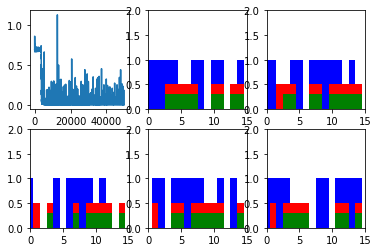

Step 100 Loss 0.000229394


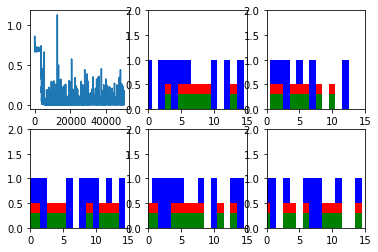

Step 200 Loss 0.000176955


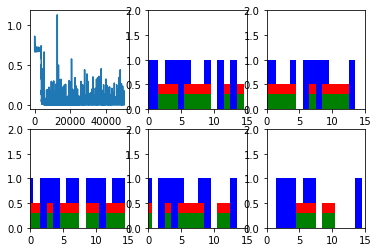

Step 300 Loss 0.000137462


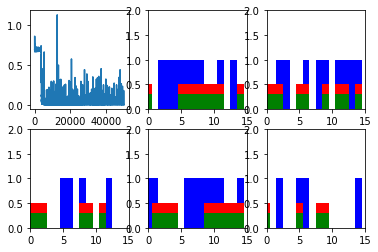

Step 400 Loss 0.000285327


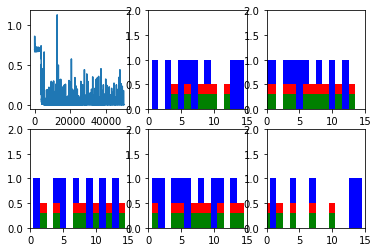

Step 500 Loss 0.000143391


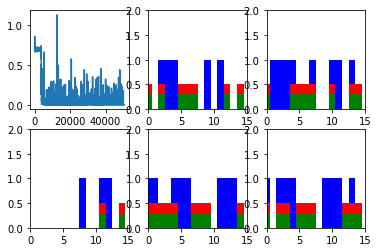

Step 600 Loss 0.000232602


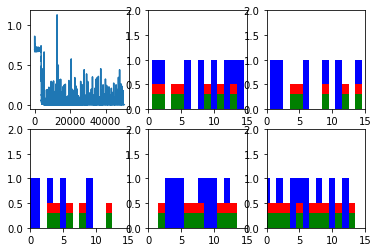

New data, epoch 76
Step 0 Loss 0.124652


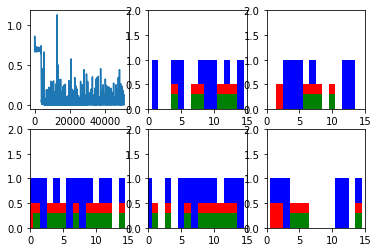

Step 100 Loss 0.000203019


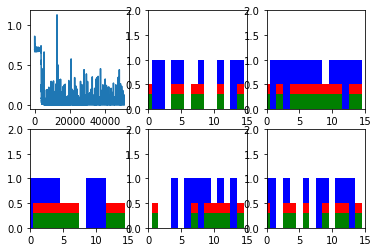

Step 200 Loss 0.000164878


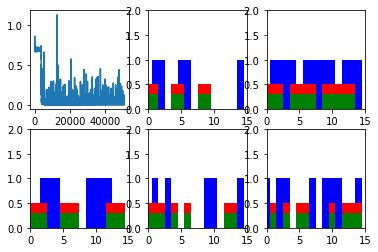

Step 300 Loss 0.000149727


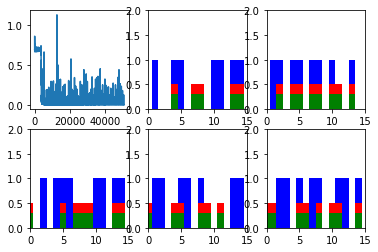

Step 400 Loss 0.000156034


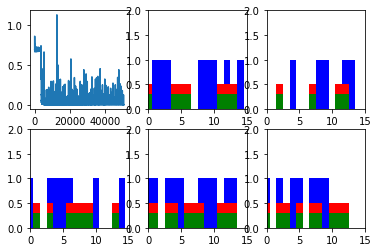

Step 500 Loss 0.000208421


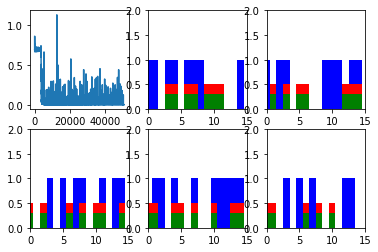

Step 600 Loss 0.000148687


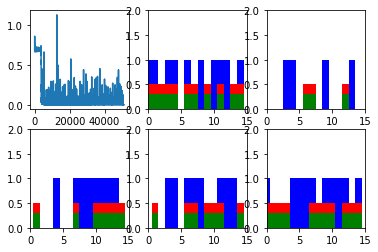

New data, epoch 77
Step 0 Loss 0.230435


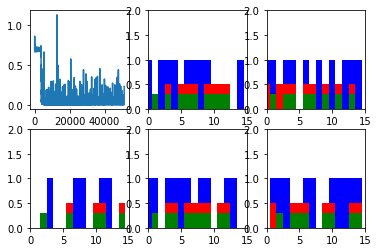

Step 100 Loss 0.000192031


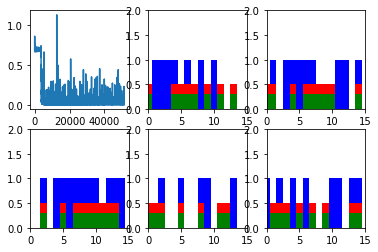

Step 200 Loss 0.000193119


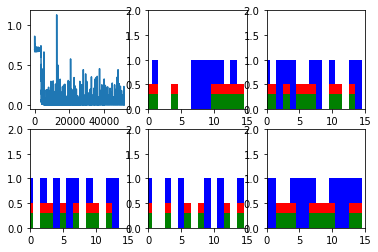

Step 300 Loss 0.000133406


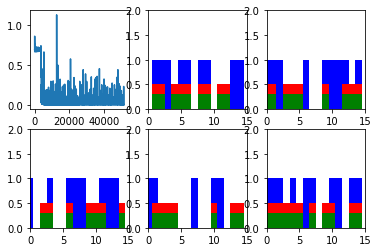

Step 400 Loss 0.000199053


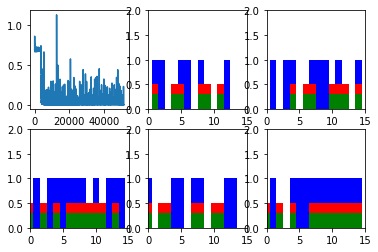

Step 500 Loss 0.000176032


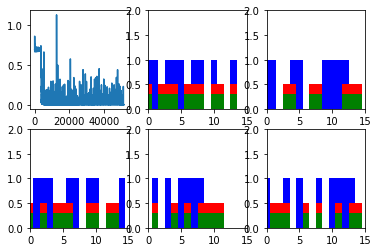

Step 600 Loss 0.000161933


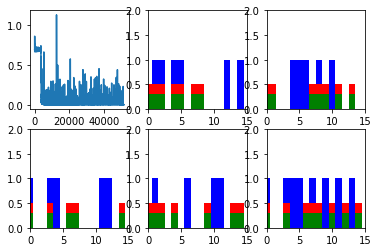

New data, epoch 78
Step 0 Loss 0.115207


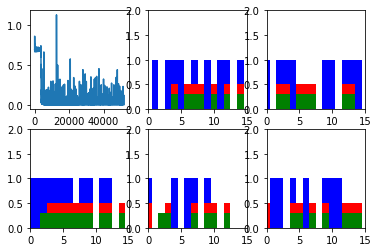

Step 100 Loss 0.000153647


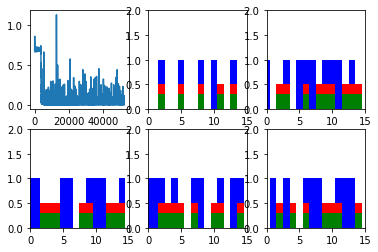

Step 200 Loss 0.00015629


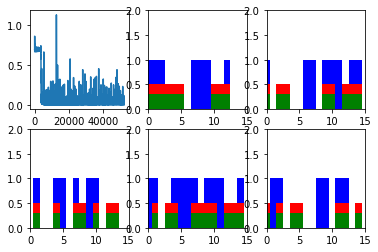

Step 300 Loss 0.000186957


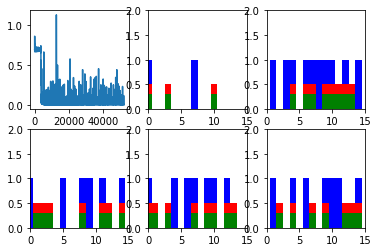

Step 400 Loss 0.000145508


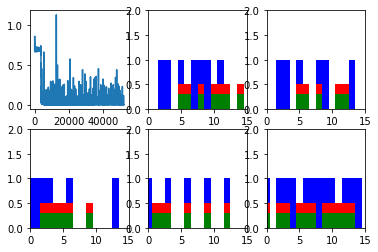

Step 500 Loss 0.000127153


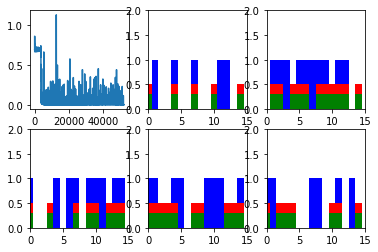

Step 600 Loss 0.000139981


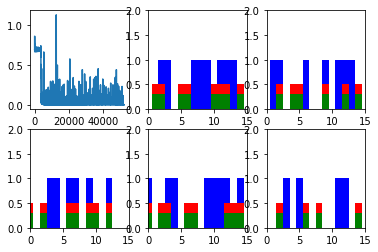

New data, epoch 79
Step 0 Loss 0.290851


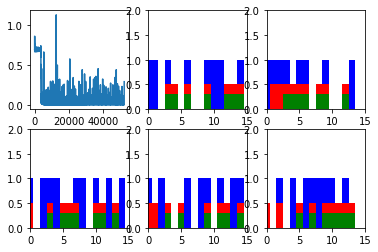

Step 100 Loss 0.000154655


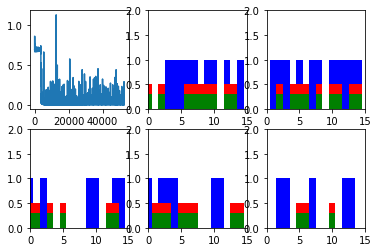

Step 200 Loss 0.000166653


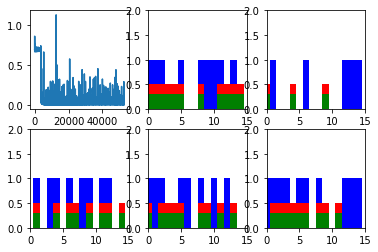

Step 300 Loss 0.000178186


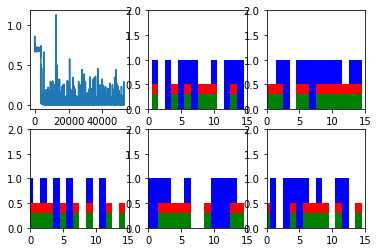

Step 400 Loss 0.000149898


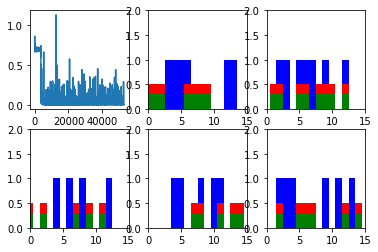

Step 500 Loss 0.000108712


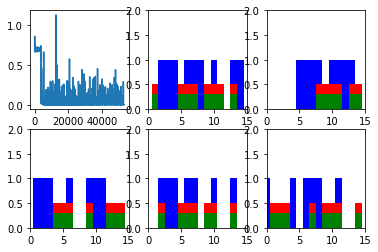

Step 600 Loss 0.000135879


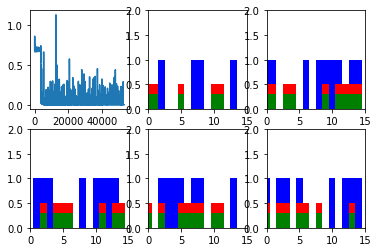

New data, epoch 80
Step 0 Loss 0.226137


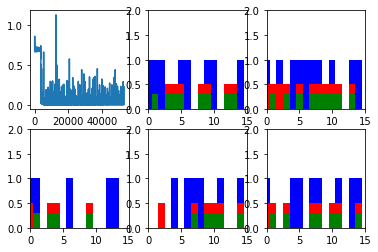

Step 100 Loss 0.000151229


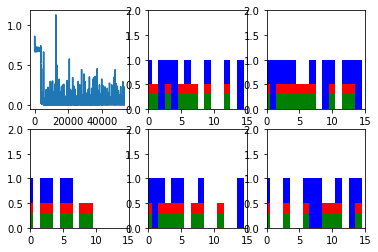

Step 200 Loss 0.000129439


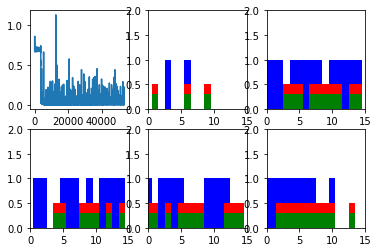

Step 300 Loss 0.000165764


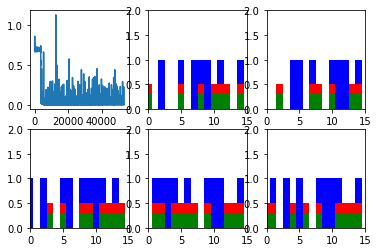

Step 400 Loss 0.000235082


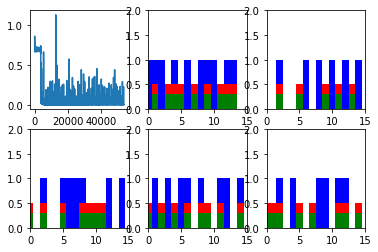

Step 500 Loss 0.000154664


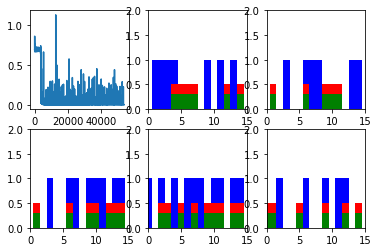

Step 600 Loss 0.000119962


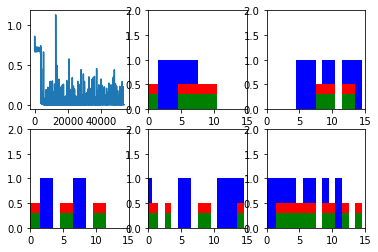

New data, epoch 81
Step 0 Loss 0.169085


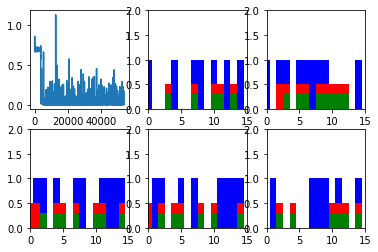

Step 100 Loss 0.000154518


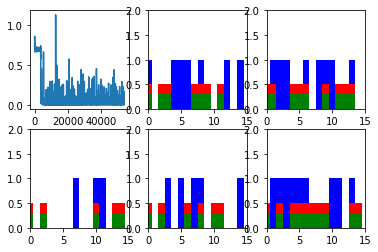

Step 200 Loss 0.000129072


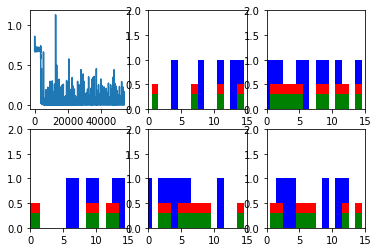

Step 300 Loss 0.000131899


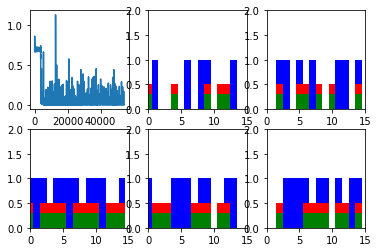

Step 400 Loss 0.000132563


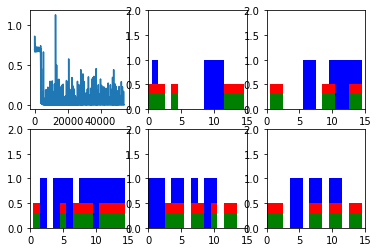

Step 500 Loss 0.000162746


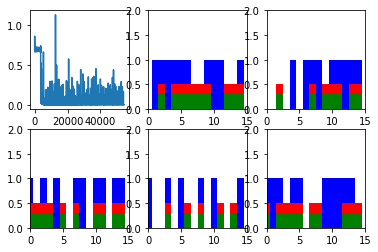

Step 600 Loss 0.000142709


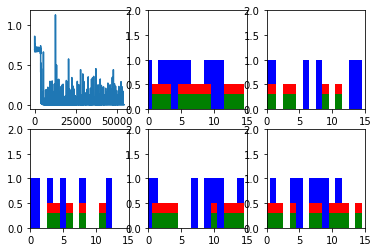

New data, epoch 82
Step 0 Loss 0.166447


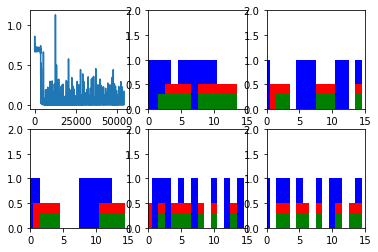

Step 100 Loss 0.000173572


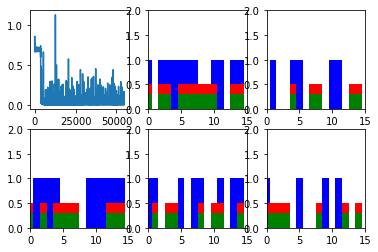

Step 200 Loss 0.000135785


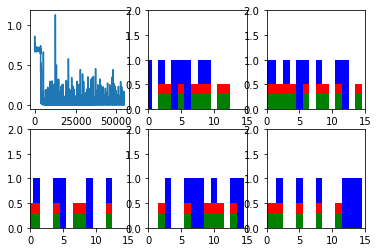

Step 300 Loss 0.000133031


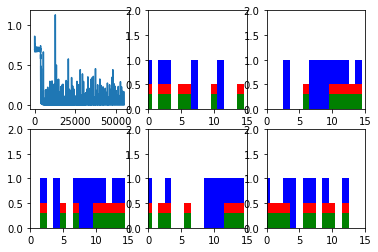

Step 400 Loss 0.00012443


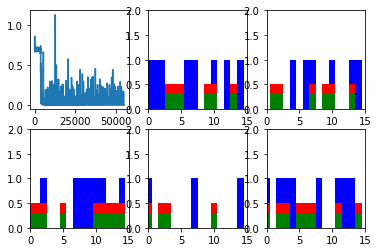

Step 500 Loss 0.000150157


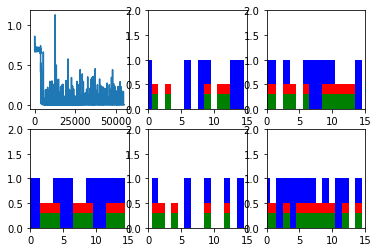

Step 600 Loss 0.000167435


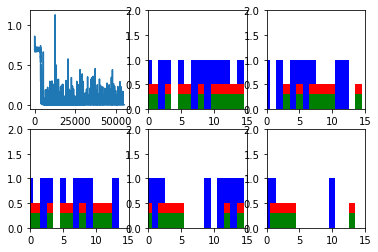

New data, epoch 83
Step 0 Loss 0.228273


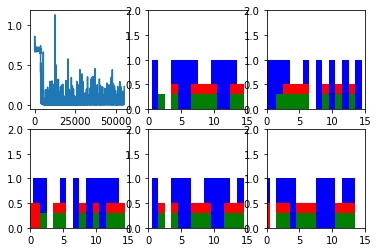

Step 100 Loss 0.00018546


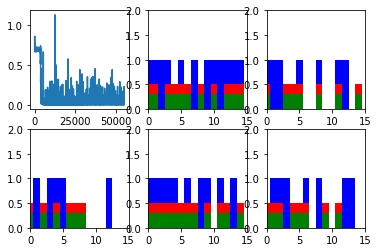

Step 200 Loss 0.000151148


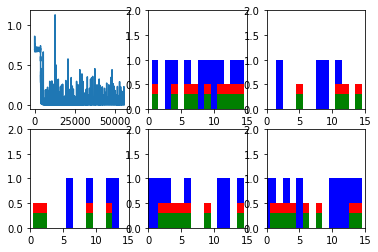

Step 300 Loss 0.00015528


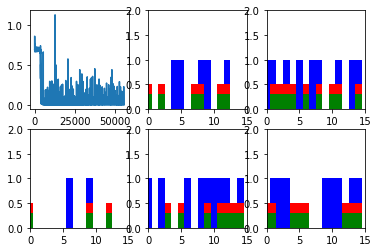

Step 400 Loss 0.000157303


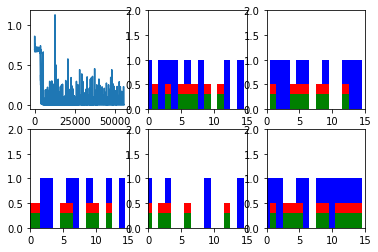

Step 500 Loss 0.000161365


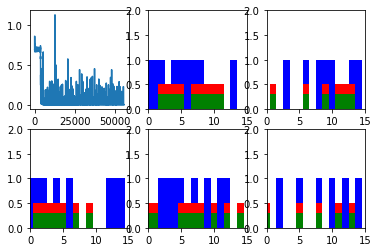

Step 600 Loss 0.000127016


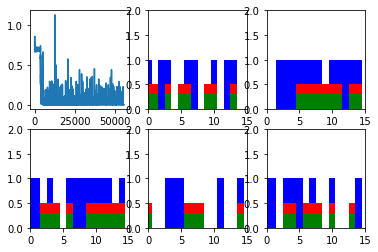

New data, epoch 84
Step 0 Loss 0.265055


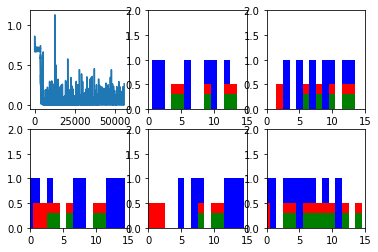

Step 100 Loss 0.000138415


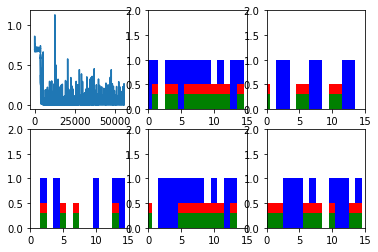

Step 200 Loss 0.000186295


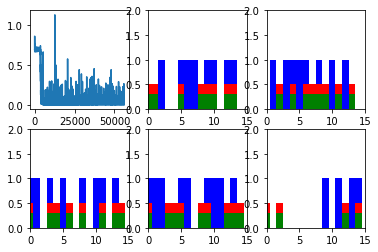

Step 300 Loss 0.000104391


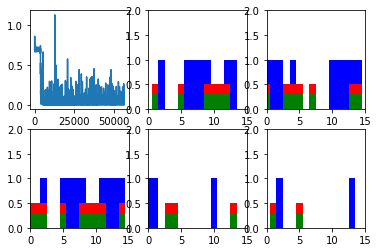

Step 400 Loss 0.000139199


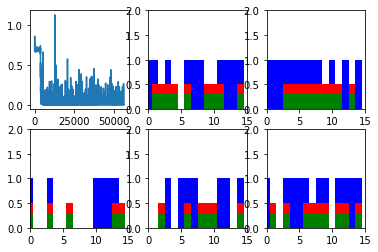

Step 500 Loss 0.000148893


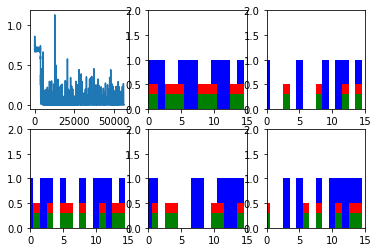

Step 600 Loss 0.000107697


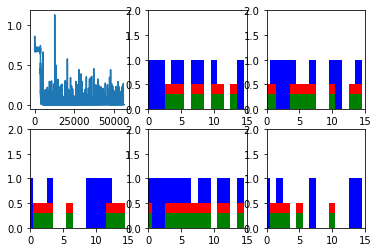

New data, epoch 85
Step 0 Loss 0.172012


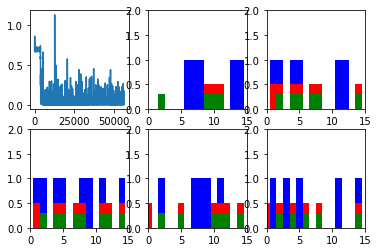

Step 100 Loss 0.000149954


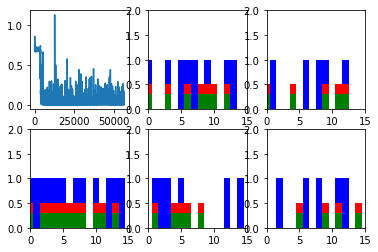

Step 200 Loss 0.000170657


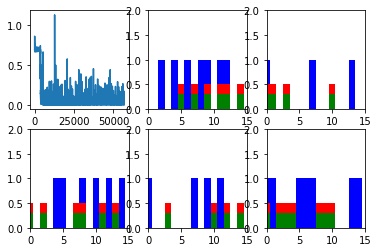

Step 300 Loss 0.000124299


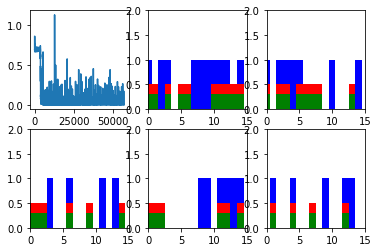

Step 400 Loss 0.000118985


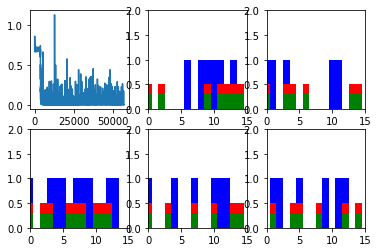

Step 500 Loss 0.000130217


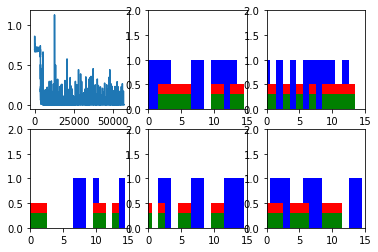

Step 600 Loss 0.000131703


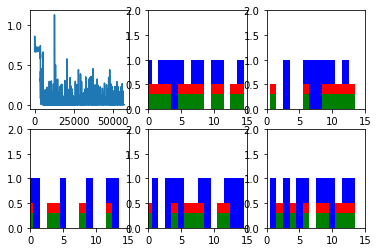

New data, epoch 86
Step 0 Loss 0.152977


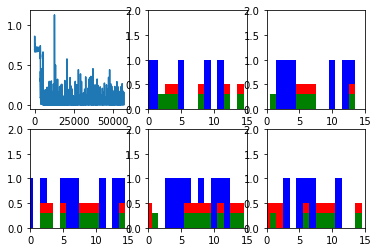

Step 100 Loss 0.000160155


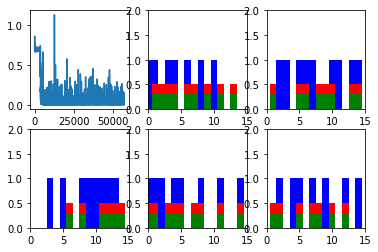

Step 200 Loss 0.000157474


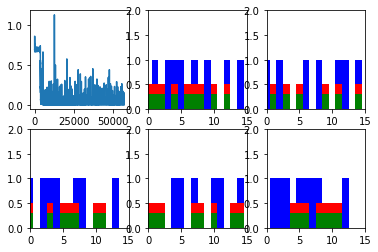

Step 300 Loss 0.000142269


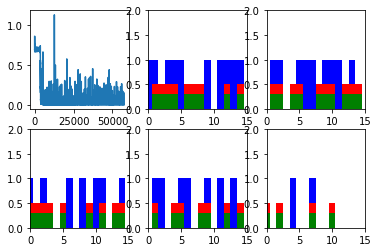

Step 400 Loss 0.000147269


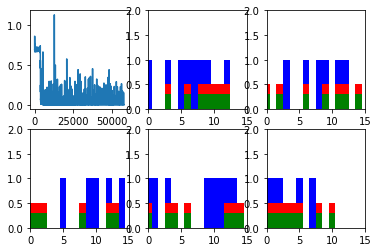

Step 500 Loss 0.00011987


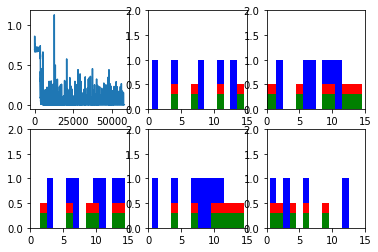

Step 600 Loss 0.000128803


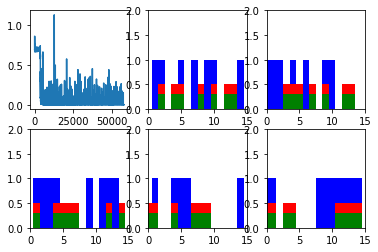

New data, epoch 87
Step 0 Loss 0.127292


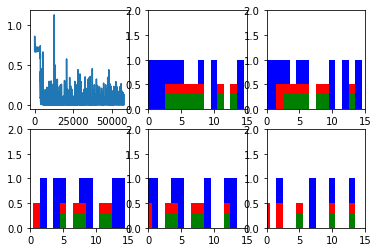

Step 100 Loss 0.000149132


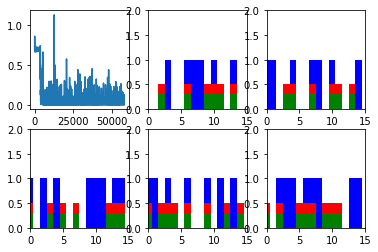

Step 200 Loss 0.000147187


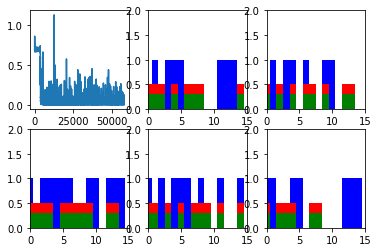

Step 300 Loss 0.00013928


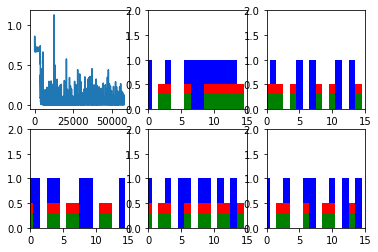

Step 400 Loss 0.000149779


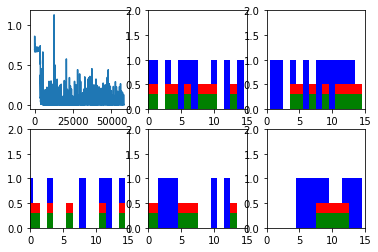

Step 500 Loss 0.000158162


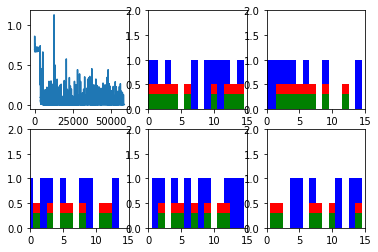

Step 600 Loss 0.000137671


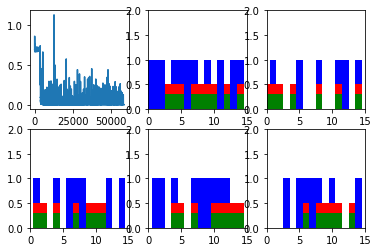

New data, epoch 88
Step 0 Loss 0.200308


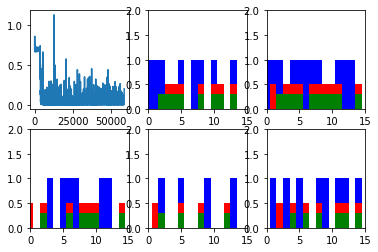

Step 100 Loss 0.000117373


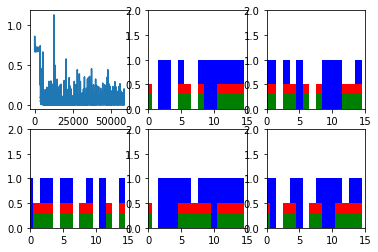

Step 200 Loss 0.000130795


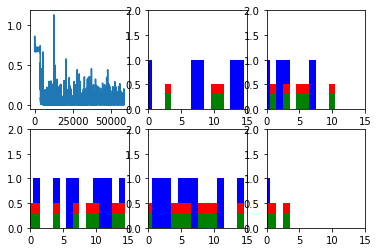

Step 300 Loss 0.000126079


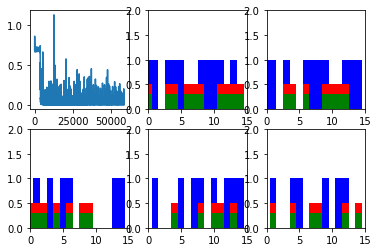

Step 400 Loss 0.000131758


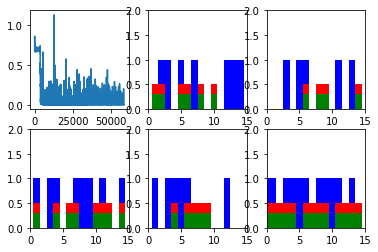

Step 500 Loss 0.000159743


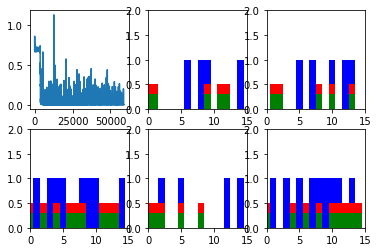

Step 600 Loss 0.000112435


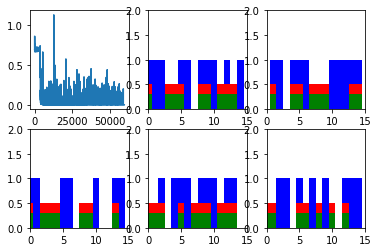

New data, epoch 89
Step 0 Loss 0.153205


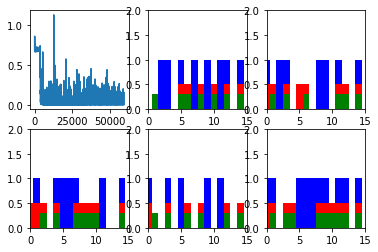

Step 100 Loss 0.000215067


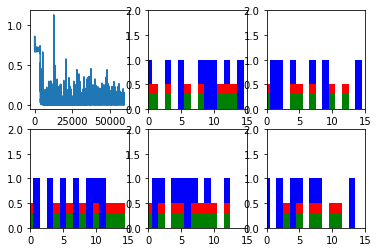

Step 200 Loss 0.000157447


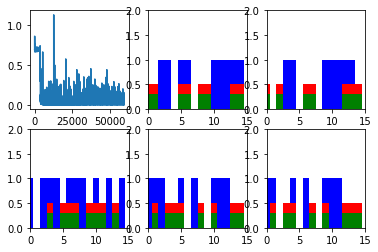

Step 300 Loss 0.000153124


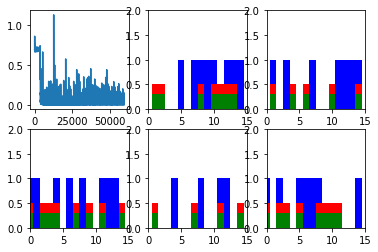

Step 400 Loss 0.000118592


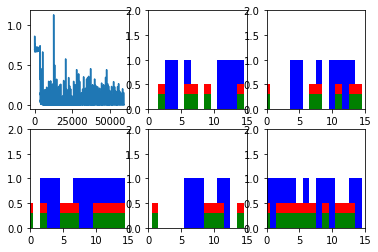

Step 500 Loss 0.000124603


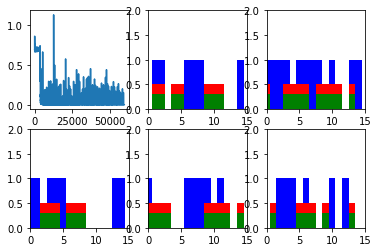

Step 600 Loss 0.000152808


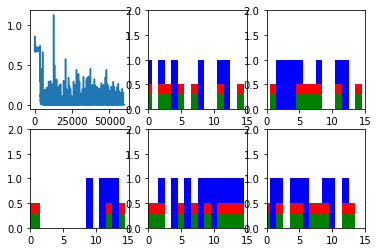

New data, epoch 90
Step 0 Loss 0.20103


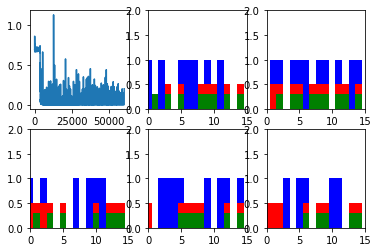

Step 100 Loss 0.000121407


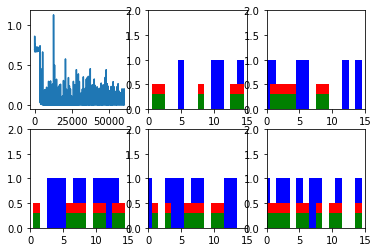

Step 200 Loss 0.00011069


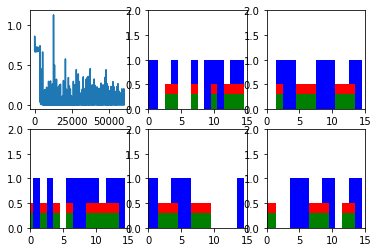

Step 300 Loss 0.000119862


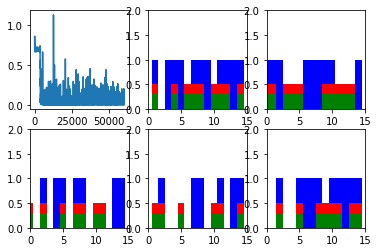

Step 400 Loss 0.00015461


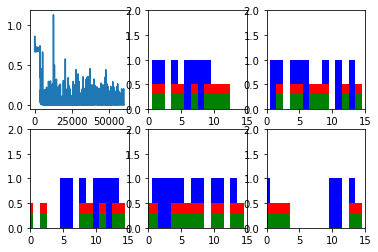

Step 500 Loss 0.000132838


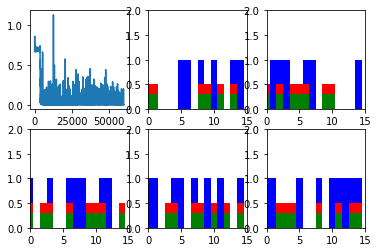

Step 600 Loss 0.000115004


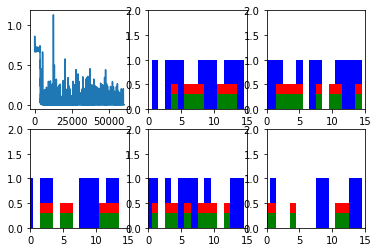

New data, epoch 91
Step 0 Loss 0.208046


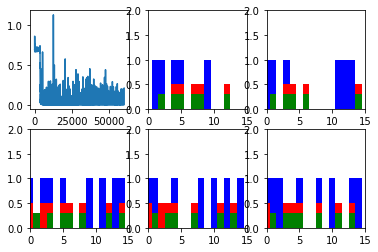

Step 100 Loss 0.000147337


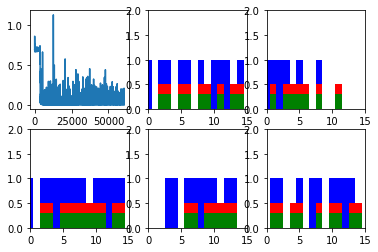

Step 200 Loss 0.000126892


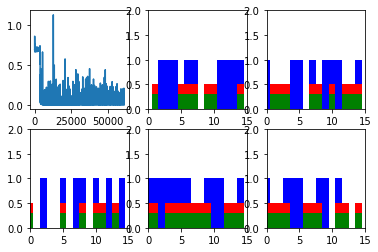

Step 300 Loss 0.000146663


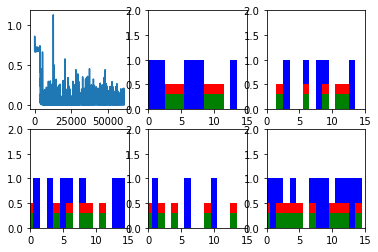

Step 400 Loss 0.000155103


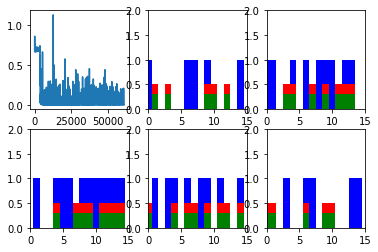

Step 500 Loss 0.000143275


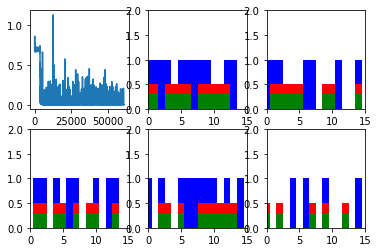

Step 600 Loss 0.000149777


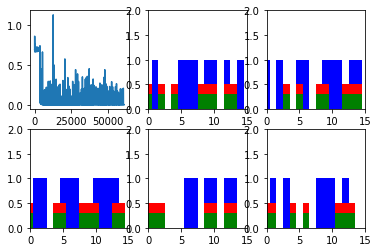

New data, epoch 92
Step 0 Loss 0.25569


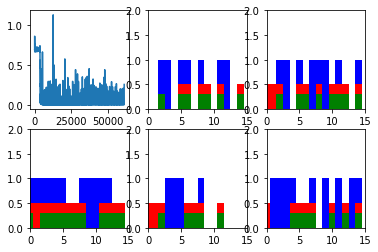

Step 100 Loss 0.000154454


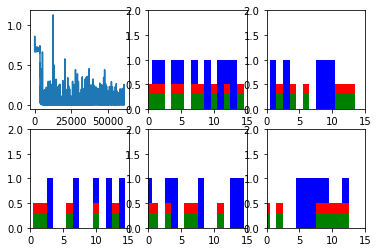

Step 200 Loss 0.000175113


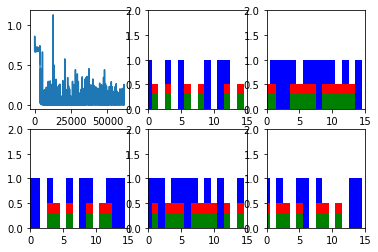

Step 300 Loss 0.000160059


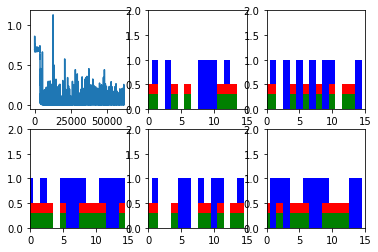

Step 400 Loss 0.00014641


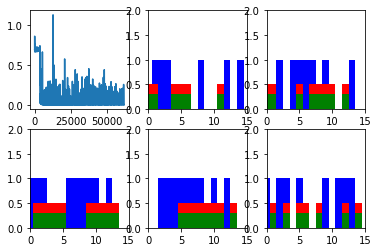

Step 500 Loss 0.000111976


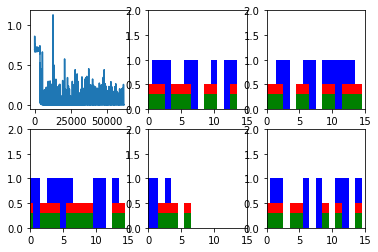

Step 600 Loss 0.000142317


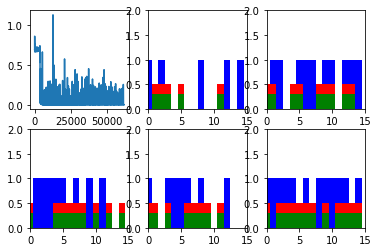

New data, epoch 93
Step 0 Loss 0.470284


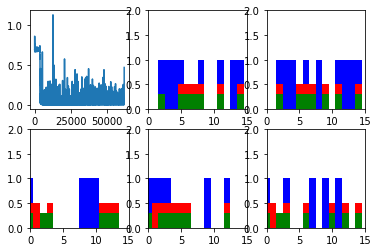

Step 100 Loss 0.000124219


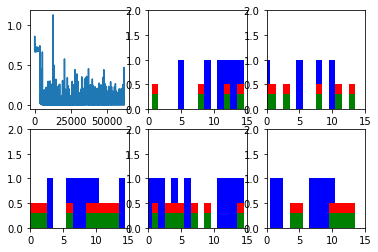

Step 200 Loss 0.000106633


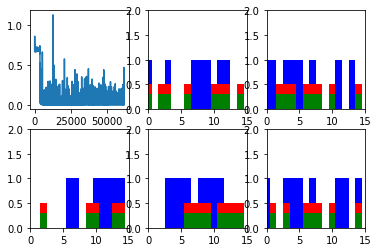

Step 300 Loss 0.000105289


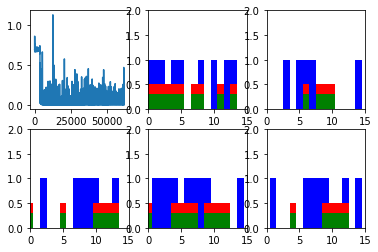

Step 400 Loss 0.000107875


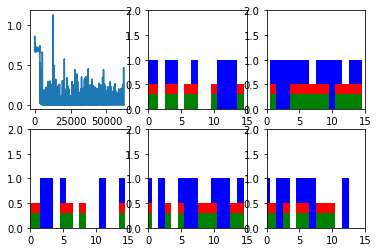

Step 500 Loss 9.41033e-05


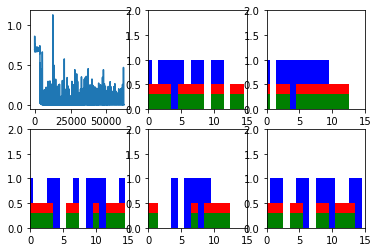

Step 600 Loss 0.000166017


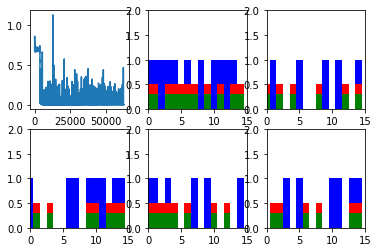

New data, epoch 94
Step 0 Loss 0.104454


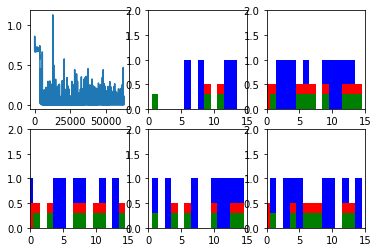

Step 100 Loss 0.000121384


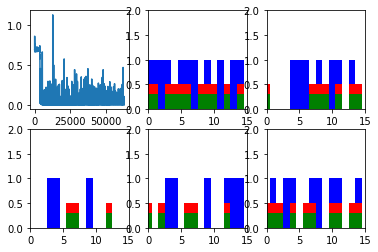

Step 200 Loss 0.000143575


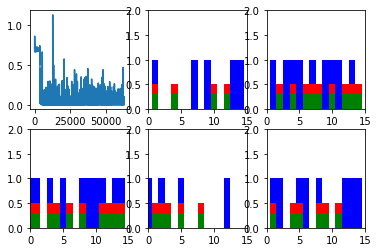

Step 300 Loss 0.000150882


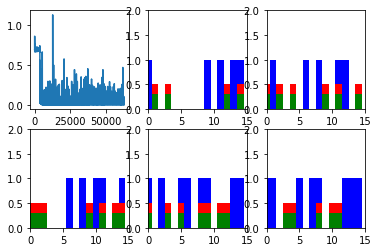

Step 400 Loss 0.000119737


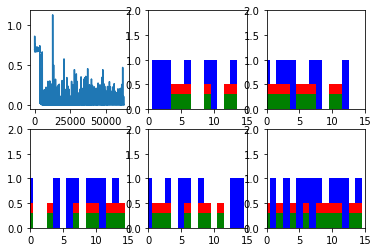

Step 500 Loss 0.000116721


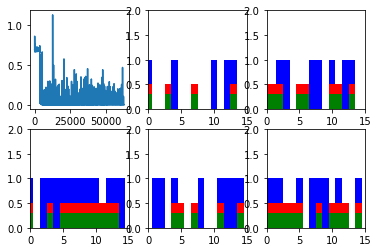

Step 600 Loss 0.000102852


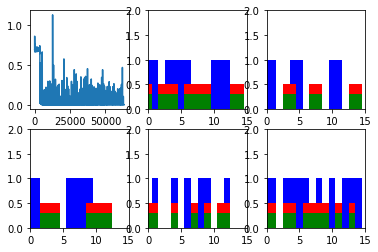

New data, epoch 95
Step 0 Loss 0.192234


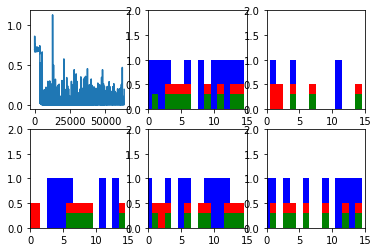

Step 100 Loss 0.000159903


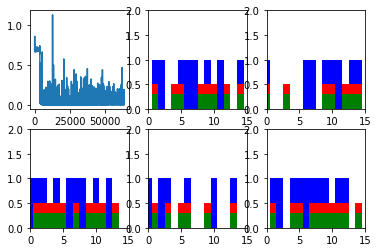

Step 200 Loss 0.000130837


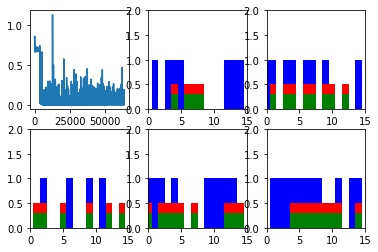

Step 300 Loss 0.000133923


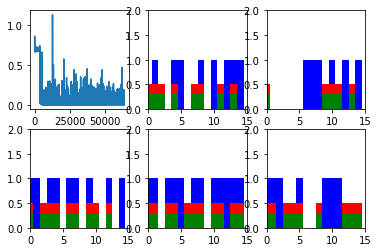

Step 400 Loss 0.00010417


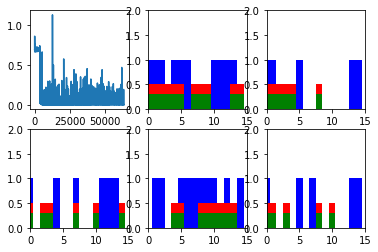

Step 500 Loss 0.000141678


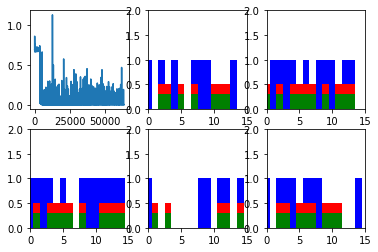

Step 600 Loss 0.000118701


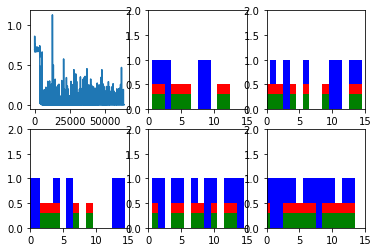

New data, epoch 96
Step 0 Loss 0.205753


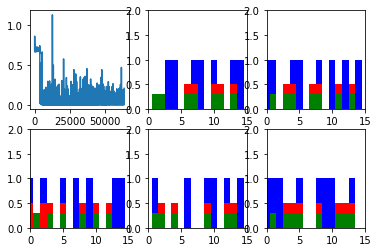

Step 100 Loss 0.000115231


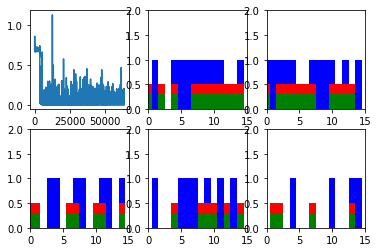

Step 200 Loss 0.000122777


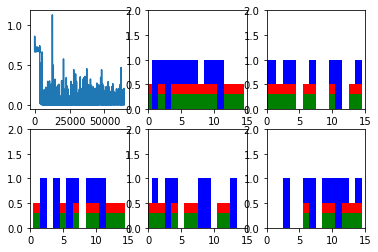

Step 300 Loss 0.000178113


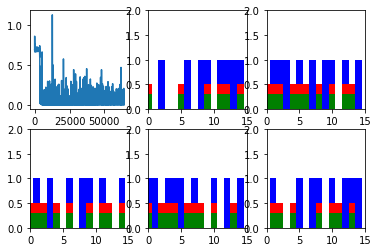

Step 400 Loss 0.000123811


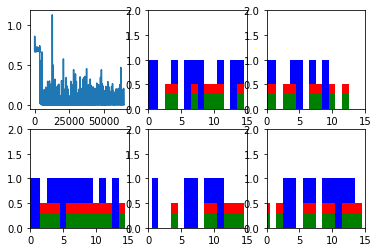

Step 500 Loss 0.000110357


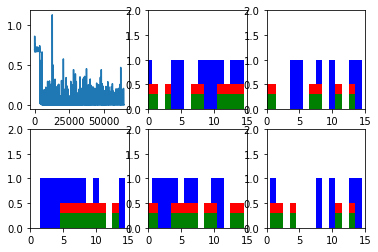

Step 600 Loss 0.000103667


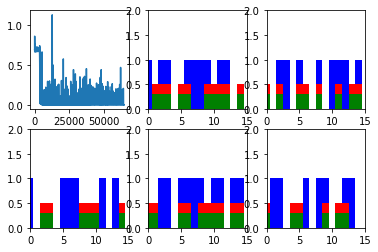

New data, epoch 97
Step 0 Loss 0.274127


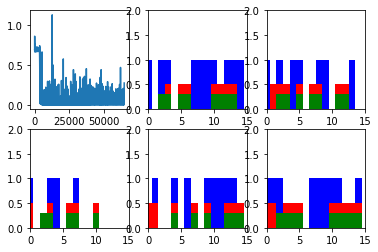

Step 100 Loss 0.000122384


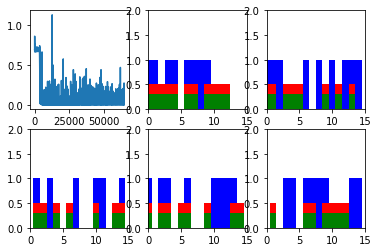

Step 200 Loss 0.000133279


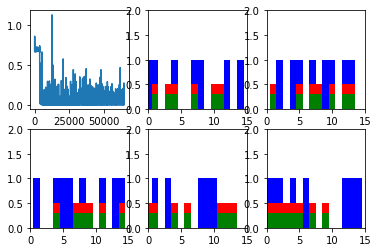

Step 300 Loss 8.19217e-05


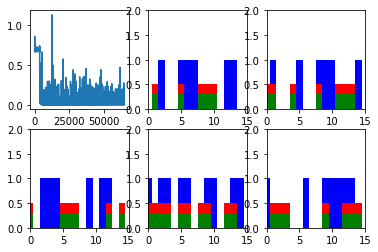

Step 400 Loss 0.000102396


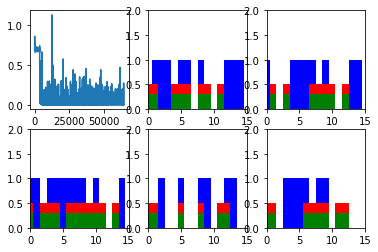

Step 500 Loss 0.000139272


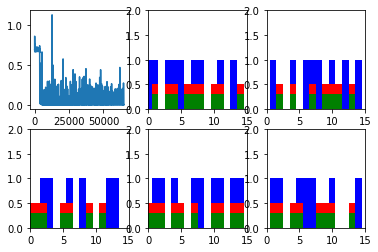

Step 600 Loss 0.000107964


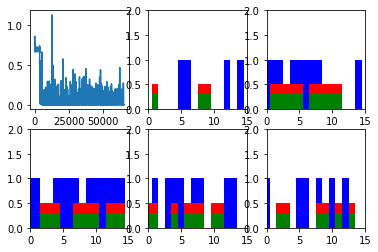

New data, epoch 98
Step 0 Loss 0.147989


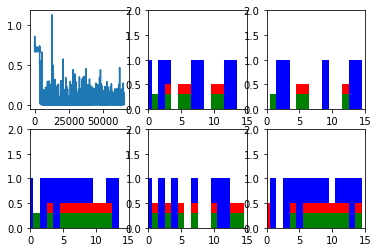

Step 100 Loss 0.000119131


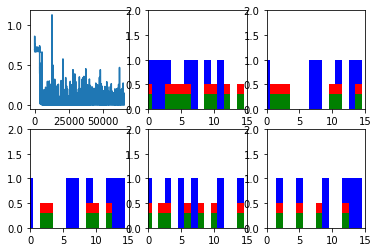

Step 200 Loss 0.000118673


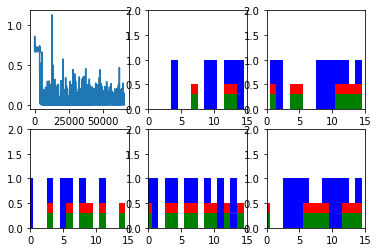

Step 300 Loss 0.000116029


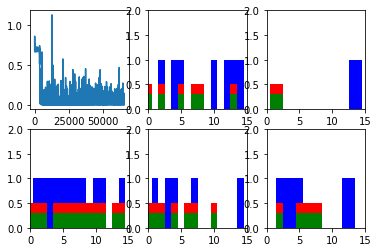

Step 400 Loss 0.000125156


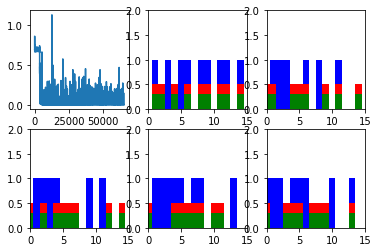

Step 500 Loss 0.000124183


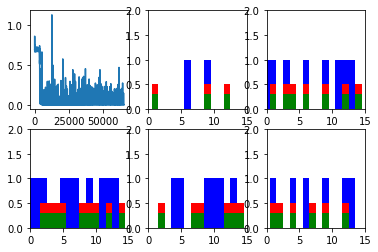

Step 600 Loss 0.000105113


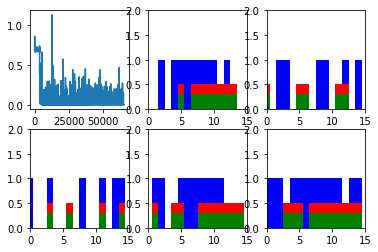

New data, epoch 99
Step 0 Loss 0.28372


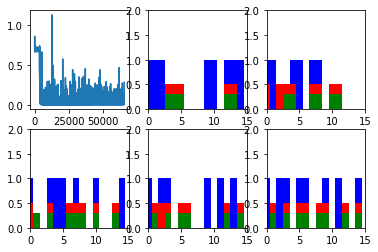

Step 100 Loss 0.000125016


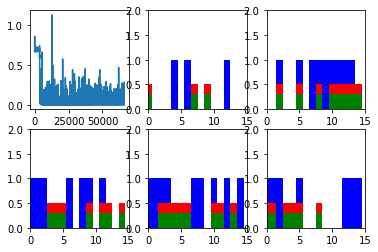

Step 200 Loss 0.000113747


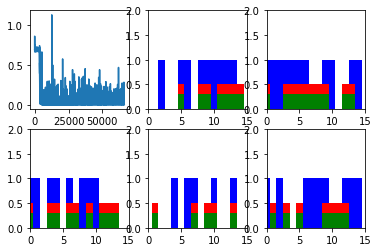

Step 300 Loss 0.000113886


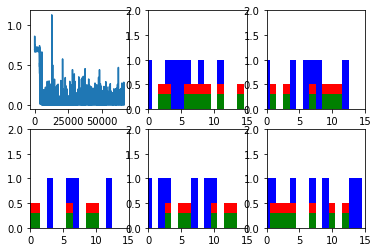

Step 400 Loss 9.1775e-05


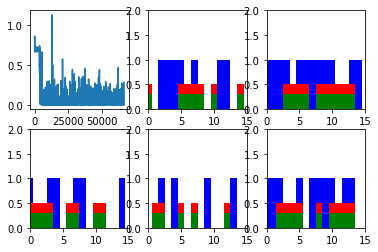

Step 500 Loss 0.000104306


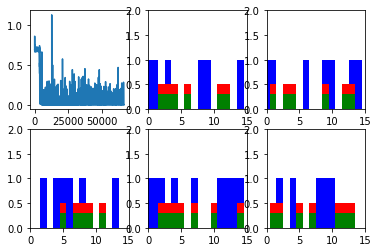

Step 600 Loss 0.000110607


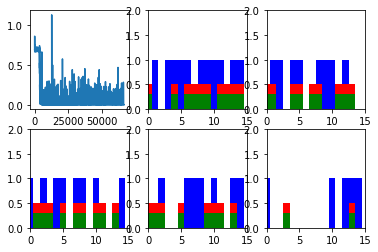

In [14]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()